In [1]:
import sys 
import os 
import glob
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.gridspec as gridspec
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from pylab import *
from matplotlib.ticker import NullFormatter, MultipleLocator, FormatStrFormatter, FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from gridData import Grid 
from io import StringIO
from collections import Counter
import seaborn as sns
from scipy.stats import norm
from  scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

##Figure fonts and other params ##
##Figure fonts and other params ##
hfont = {'fontname':'Helvetica'}
mpl.rcParams['figure.dpi'] =300
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['pdf.fonttype'] = 42 
plt.rc('font', family='Helvetica')
##

def rolling_window(a, window_size):
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)




In [2]:
### BLOCK AVG --  ##

#(rm1[:,1])

def blockAverage(datastream, isplot=True, maxBlockSize=0):
 
	Nobs         = len(datastream)           # total number of observations in datastream
	minBlockSize = 1;                        # min: 1 observation/block
 
	if maxBlockSize == 0:
		maxBlockSize = int(Nobs/4);        # max: 4 blocs (otherwise can't calc variance)
  
	NumBlocks = maxBlockSize - minBlockSize   # total number of block sizes

	blockMean = np.zeros(NumBlocks)               # mean (expect to be "nearly" constant)
	blockVar  = np.zeros(NumBlocks)               # variance associated with each blockSize
	blockCtr  = 0
	
				#
				#  blockSize is # observations/block
				#  run them through all the possibilities
				#
 
	for blockSize in range(minBlockSize, maxBlockSize):

		Nblock    = int(Nobs/blockSize)               # total number of such blocks in datastream
		obsProp   = np.zeros(Nblock)                  # container for parcelling block 
        
		# Loop to chop datastream into blocks
		# and take average
		for i in range(1,Nblock+1):
			
			ibeg = (i-1) * blockSize
			iend =  ibeg + blockSize
			obsProp[i-1] = np.mean(datastream[ibeg:iend])

		blockMean[blockCtr] = np.mean(obsProp)
		blockVar[blockCtr]  = np.var(obsProp)/(Nblock - 1)
		blockCtr += 1
 
	v = np.arange(minBlockSize,maxBlockSize)
	
	if isplot:
    
		plt.figure( figsize = (12,6)) 
		plt.subplot(1,2,1)
		plt.plot(v, np.sqrt(blockVar),'-',lw=1)
		plt.xlabel('block size')
		plt.ylabel('std')

		plt.subplot(1,2,2)
		plt.errorbar(v, blockMean, np.sqrt(blockVar))
		plt.ylabel('<x>')
		plt.xlabel('block size')

		print (blockMean[-1], np.sqrt(blockVar[-1]))
        
		plt.tight_layout()
		plt.show()
		
	#return v, blockVar, blockMean

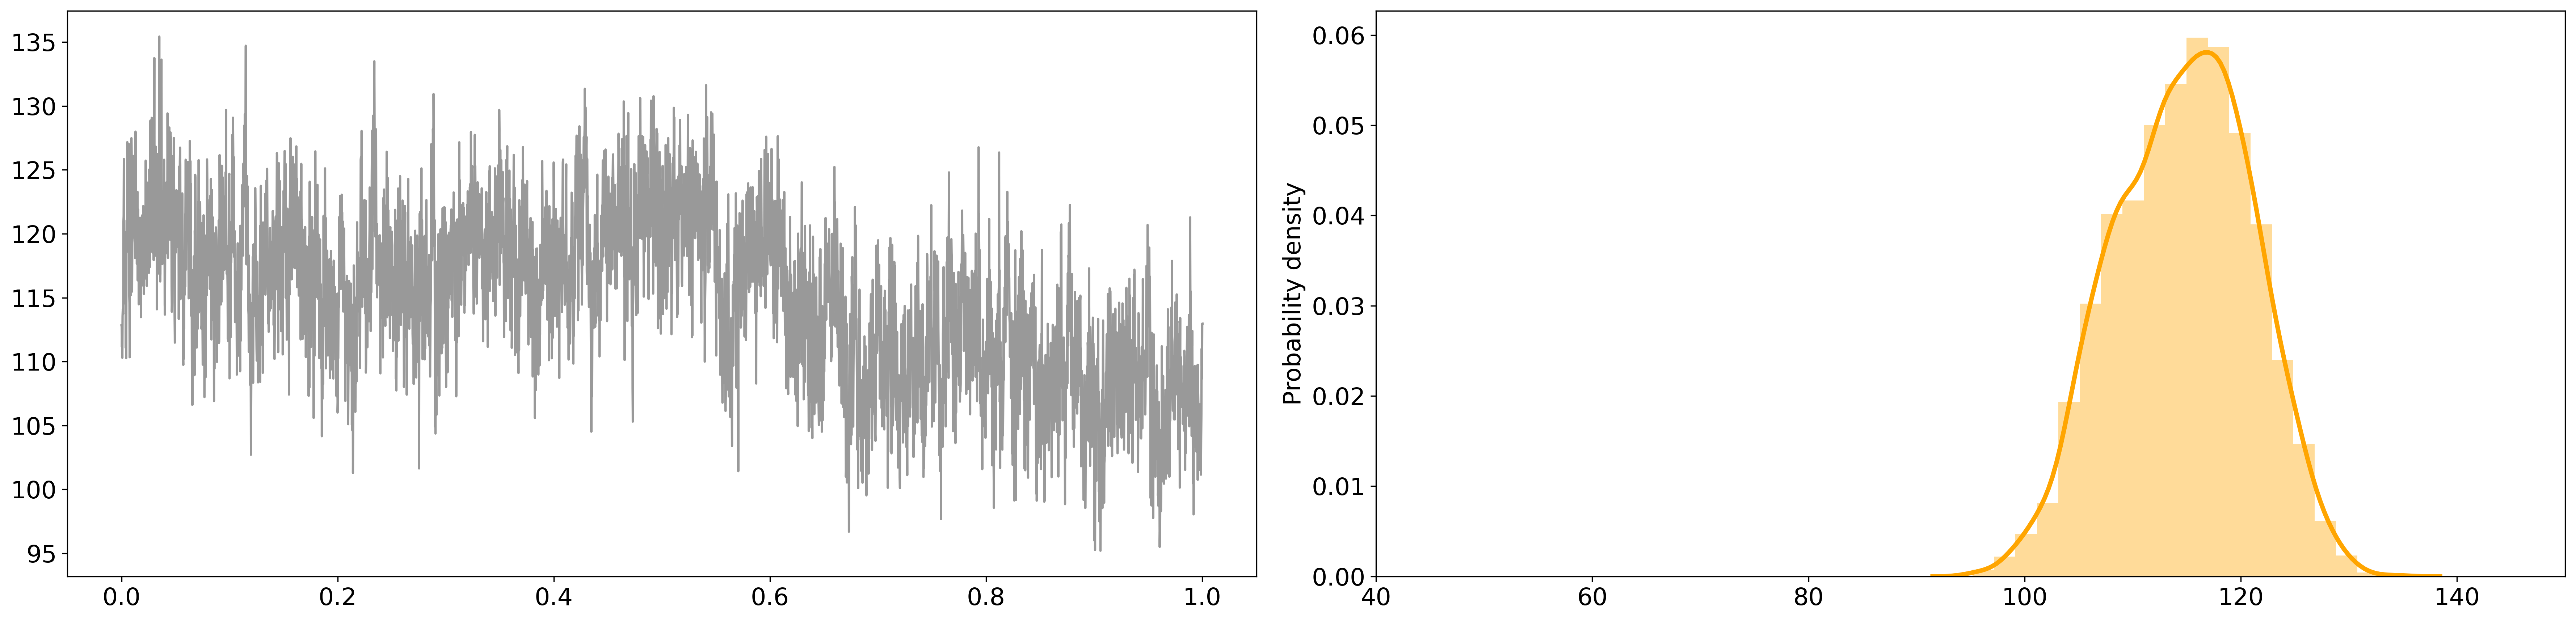

In [8]:
###r1

#files

r1C = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PCPSna_r1_TFN_TFCal_angle_1us_200ps_zalPC_nc.dat'
r1N = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PCPSna_r1_TFN_TFCal_angle_1us_200ps_zalPN_nc.dat'


# Angle
r1_angle1_v = np.genfromtxt(r1C, usecols=(1))
r1_angle1eq_v = np.genfromtxt(r1C, usecols=(1),skip_header=399)

r1_angle1_t = np.genfromtxt(r1C, usecols=(0))
r1_angle1eq_t = np.genfromtxt(r1C, usecols=(0),skip_header=399)

#r1_angle2 = np.genfromtxt(r1C, usecols=(0,2))
                         
# Projections
#r1C_px = np.genfromtxt(r1C, usecols=(0,2))
#r1C_py = np.genfromtxt(r1C, usecols=(0,3))
#r1C_pz = np.genfromtxt(r1C, usecols=(0,4)) 

#r1C_pxm = np.genfromtxt(r1C, usecols=(0,5))
#r1C_pym = np.genfromtxt(r1C, usecols=(0,6))
#r1C_pzm = np.genfromtxt(r1C, usecols=(0,7)) 
                        
#r1N_px =  np.genfromtxt(r1N, usecols=(0,2))
#r1N_py =  np.genfromtxt(r1N, usecols=(0,3))
#r1N_pz =  np.genfromtxt(r1N, usecols=(0,4)) 

#r1N_pxm = np.genfromtxt(r1N, usecols=(0,5))
#r1N_pym = np.genfromtxt(r1N, usecols=(0,6))
#r1N_pzm = np.genfromtxt(r1N, usecols=(0,7))     
                    
r1_angle1_v2 = [180-x if x < 90 else x+0 for x in r1_angle1_v ]
r1_angle1_veq2 = [180-x if x < 90 else x+0 for x in r1_angle1eq_v ]
#print (r1_angle1)
#for x in r1_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x
        
#for x in r1_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x

#Rolling averages -- time evol
#rav_r1_angle1v=np.mean(rolling_window(r1_angle1_v2, 20), 1)
#rav_r1_angle1t=np.mean(rolling_window(r1_angle1_t, 20), 1)
 
plt.figure( figsize = (24,6)) 
                        
plt.subplot(121)
plt.plot((r1_angle1_t*0.0002),(r1_angle1_v2), color='gray', alpha=0.8)
#plt.plot((rav_r1_angle1t*0.0002),(rav_r1_angle1v), color='red', alpha=1)

plt.subplot(122)
sns.distplot((r1_angle1_veq2 ), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([40, 150])
#plt.ylim([0, 1.2])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()

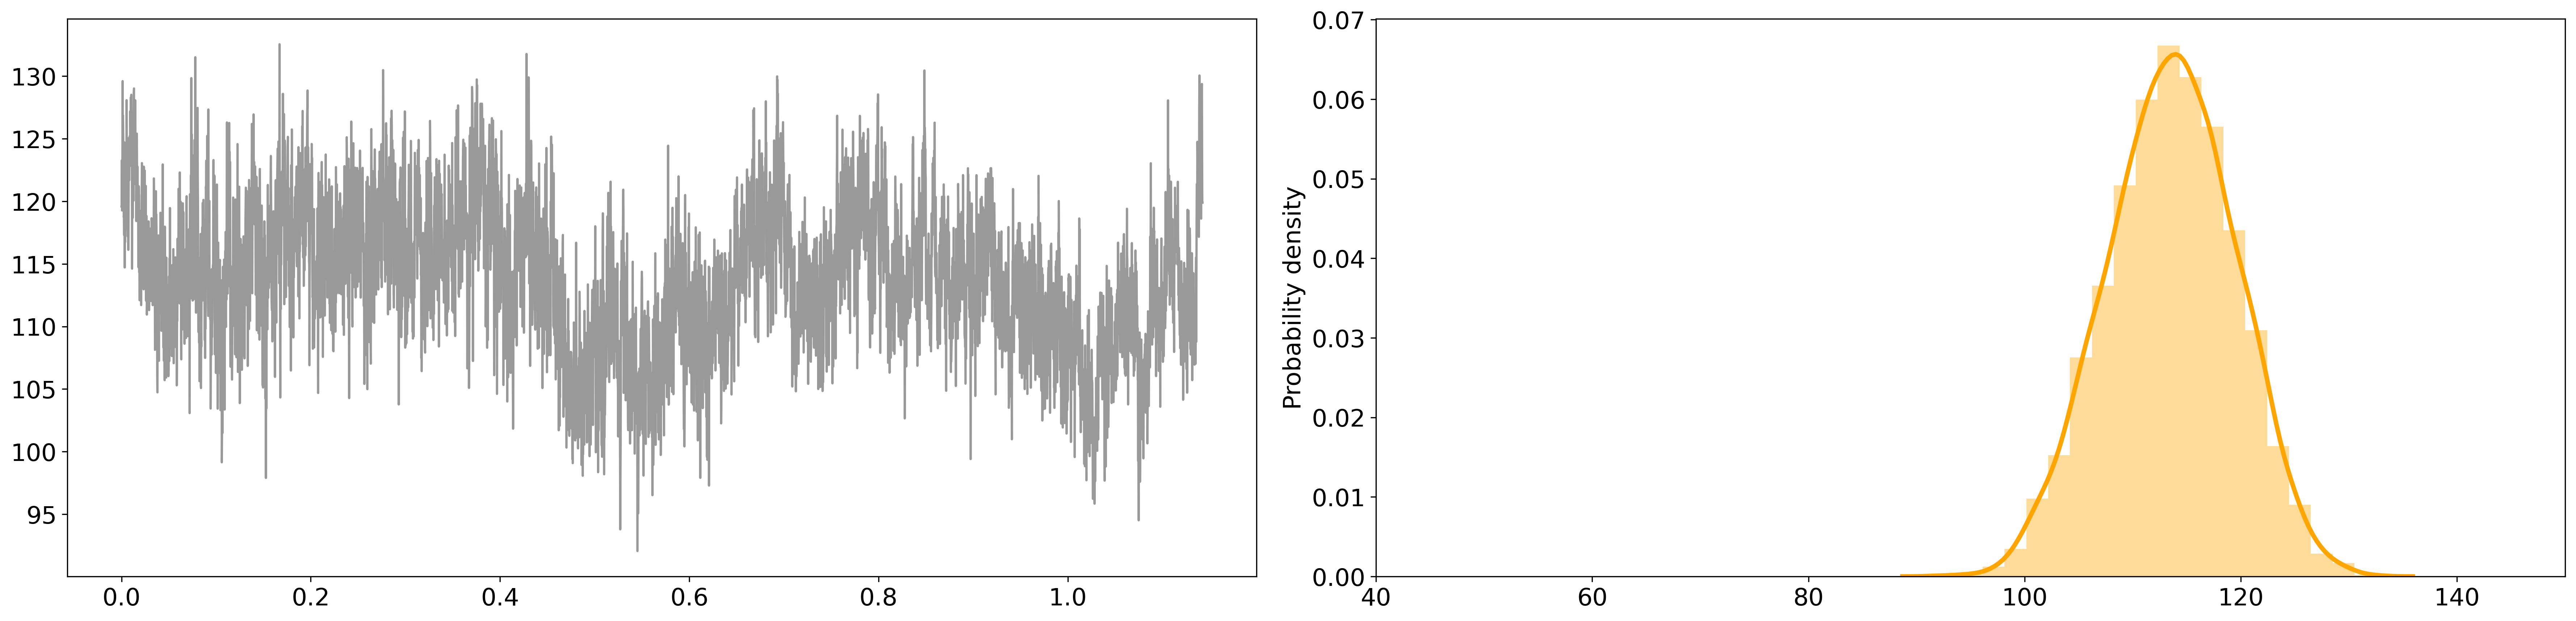

In [9]:
###r2

#files

r2C = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PCPSna_r2_TFN_TFCal_angle_1us_200ps_zalPC.dat'
r2N = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PCPSna_r2_TFN_TFCal_angle_1us_200ps_zalPN.dat'


# Angle
r2_angle1_v = np.genfromtxt(r2C, usecols=(1))
r2_angle1eq_v = np.genfromtxt(r2C, usecols=(1),skip_header=399)

r2_angle1_t = np.genfromtxt(r2C, usecols=(0))
r2_angle1eq_t = np.genfromtxt(r2C, usecols=(0),skip_header=399)

#r2_angle2 = np.genfromtxt(r2C, usecols=(0,2))
                         
# Projections
#r2C_px = np.genfromtxt(r2C, usecols=(0,2))
#r2C_py = np.genfromtxt(r2C, usecols=(0,3))
#r2C_pz = np.genfromtxt(r2C, usecols=(0,4)) 

#r2C_pxm = np.genfromtxt(r2C, usecols=(0,5))
#r2C_pym = np.genfromtxt(r2C, usecols=(0,6))
#r2C_pzm = np.genfromtxt(r2C, usecols=(0,7)) 
                        
#r2N_px =  np.genfromtxt(r2N, usecols=(0,2))
#r2N_py =  np.genfromtxt(r2N, usecols=(0,3))
#r2N_pz =  np.genfromtxt(r2N, usecols=(0,4)) 

#r2N_pxm = np.genfromtxt(r2N, usecols=(0,5))
#r2N_pym = np.genfromtxt(r2N, usecols=(0,6))
#r2N_pzm = np.genfromtxt(r2N, usecols=(0,7))     
                        
r2_angle1_v2 = [180-x if x < 90 else x+0 for x in r2_angle1_v ]
r2_angle1_veq2 = [180-x if x < 90 else x+0 for x in r2_angle1eq_v ]

#for x in r2_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x
        
#for x in r2_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x

#Rolling averages -- time evol
#rav_r2_angle1v=np.mean(rolling_window(r2_angle1_v, 20), 1)
#rav_r2_angle1t=np.mean(rolling_window(r2_angle1_t, 20), 1)
 
plt.figure( figsize = (24,6)) 
                        
plt.subplot(121)
plt.plot((r2_angle1_t*0.0002),(r2_angle1_v2), color='gray', alpha=0.8)
#plt.plot((rav_r2_angle1t*0.0002),(rav_r2_angle1v), color='red', alpha=1)

plt.subplot(122)
sns.distplot((r2_angle1_veq2), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([40, 150])
#plt.ylim([0, 1.2])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()

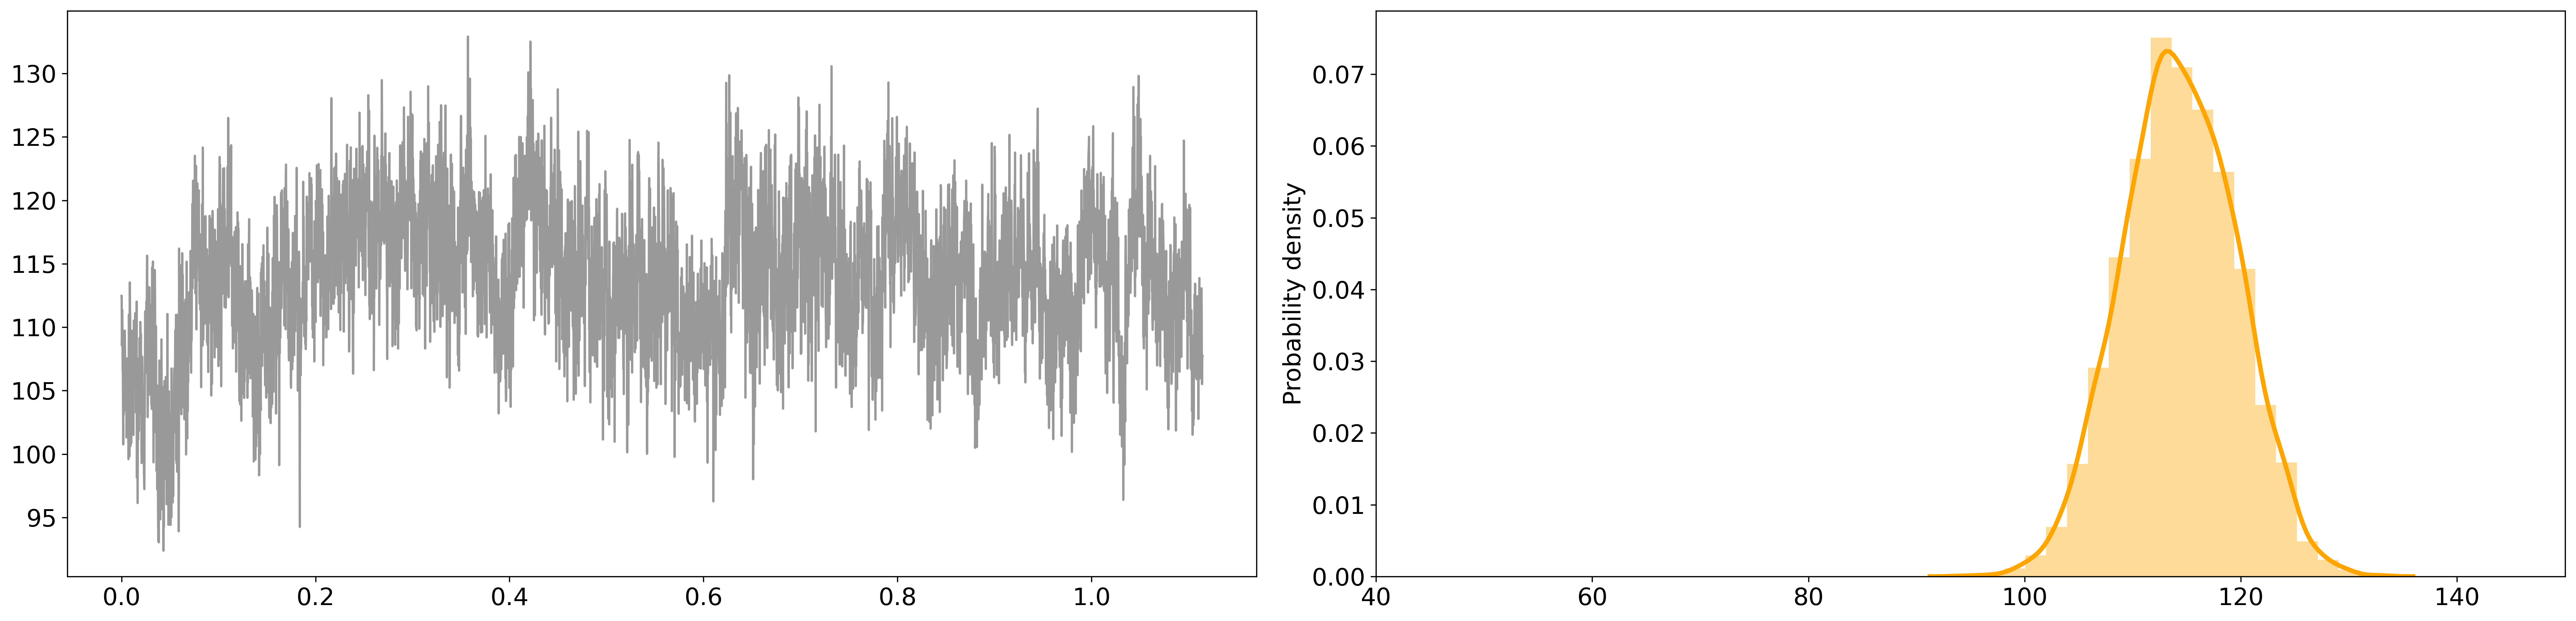

In [10]:
###r3

#files

r3C = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PCPSna_r3_TFN_TFCal_angle_1us_200ps_zalPC.dat'
r3N = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PCPSna_r3_TFN_TFCal_angle_1us_200ps_zalPN.dat'


# Angle
r3_angle1_v = np.genfromtxt(r3C, usecols=(1))
r3_angle1eq_v = np.genfromtxt(r3C, usecols=(1),skip_header=399)

r3_angle1_t = np.genfromtxt(r3C, usecols=(0))
r3_angle1eq_t = np.genfromtxt(r3C, usecols=(0),skip_header=399)

#r3_angle2 = np.genfromtxt(r3C, usecols=(0,2))
                         
# Projections
#r3C_px = np.genfromtxt(r3C, usecols=(0,2))
#r3C_py = np.genfromtxt(r3C, usecols=(0,3))
#r3C_pz = np.genfromtxt(r3C, usecols=(0,4)) 

#r3C_pxm = np.genfromtxt(r3C, usecols=(0,5))
#r3C_pym = np.genfromtxt(r3C, usecols=(0,6))
#r3C_pzm = np.genfromtxt(r3C, usecols=(0,7)) 
                        
#r3N_px =  np.genfromtxt(r3N, usecols=(0,2))
#r3N_py =  np.genfromtxt(r3N, usecols=(0,3))
#r3N_pz =  np.genfromtxt(r3N, usecols=(0,4)) 

#r3N_pxm = np.genfromtxt(r3N, usecols=(0,5))
#r3N_pym = np.genfromtxt(r3N, usecols=(0,6))
#r3N_pzm = np.genfromtxt(r3N, usecols=(0,7))     
                        
r3_angle1_v2 = [180-x if x < 90 else x+0 for x in r3_angle1_v ]
r3_angle1_veq2 = [180-x if x < 90 else x+0 for x in r3_angle1eq_v ]

#for x in r3_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x
        
#for x in r3_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x

#Rolling averages -- time evol
#rav_r3_angle1v=np.mean(rolling_window(r3_angle1_v, 20), 1)
#rav_r3_angle1t=np.mean(rolling_window(r3_angle1_t, 20), 1)
 
plt.figure( figsize = (24,6)) 
                        
plt.subplot(121)
plt.plot((r3_angle1_t*0.0002),(r3_angle1_v2), color='gray', alpha=0.8)
#plt.plot((rav_r3_angle1t*0.0002),(rav_r3_angle1v), color='red', alpha=1)

plt.subplot(122)
sns.distplot((r3_angle1_veq2), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([40, 150])
#plt.ylim([0, 0.07])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()

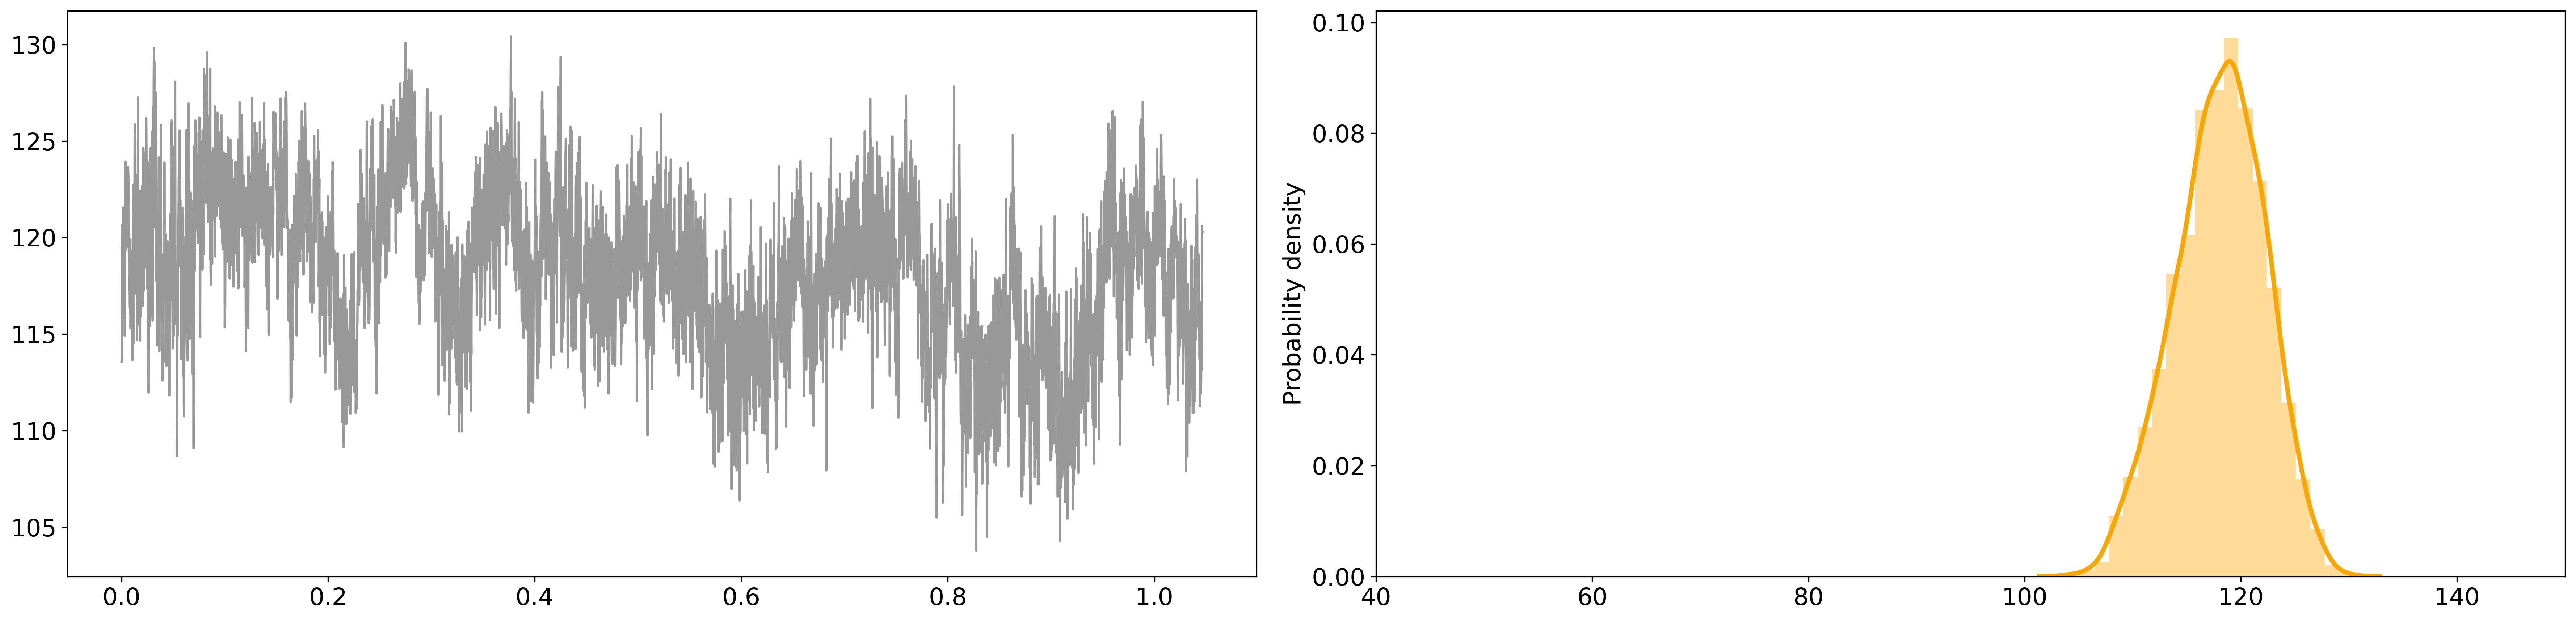

In [11]:
## TF-F7 pcps


#files

tff7_C = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/TFF7_PCPS_TFN_TFCal_angle_1us_200ps_zalPCnc.dat'
tff7_N = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/TFF7_PCPS_TFN_TFCal_angle_1us_200ps_zalPNnc.dat'


# Angle
tff7_angle1_v = np.genfromtxt(tff7_C, usecols=(1))
tff7_angle1eq_v = np.genfromtxt(tff7_C, usecols=(1),skip_header=399)

tff7_angle1_t = np.genfromtxt(tff7_C, usecols=(0))
tff7_angle1eq_t = np.genfromtxt(tff7_C, usecols=(0),skip_header=399)

#tff7__angle2 = np.genfromtxt(tff7_C, usecols=(0,2))
                         
# Projections
#tff7_C_px = np.genfromtxt(tff7_C, usecols=(0,2))
#tff7_C_py = np.genfromtxt(tff7_C, usecols=(0,3))
#tff7_C_pz = np.genfromtxt(tff7_C, usecols=(0,4)) 

#tff7_C_pxm = np.genfromtxt(tff7_C, usecols=(0,5))
#tff7_C_pym = np.genfromtxt(tff7_C, usecols=(0,6))
#tff7_C_pzm = np.genfromtxt(tff7_C, usecols=(0,7)) 
                        
#tff7_N_px =  np.genfromtxt(tff7_N, usecols=(0,2))
#tff7_N_py =  np.genfromtxt(tff7_N, usecols=(0,3))
#tff7_N_pz =  np.genfromtxt(tff7_N, usecols=(0,4)) 

#tff7_N_pxm = np.genfromtxt(tff7_N, usecols=(0,5))
#tff7_N_pym = np.genfromtxt(tff7_N, usecols=(0,6))
#tff7_N_pzm = np.genfromtxt(tff7_N, usecols=(0,7))     
                        
tff7_angle1_v2 = [180-x if x < 90 else x+0 for x in tff7_angle1_v ]
tff7_angle1_veq2 = [180-x if x < 90 else x+0 for x in tff7_angle1eq_v ]

#for x in tff7__angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x
        
#for x in tff7__angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x

#Rolling averages -- time evol
#rav_tff7__angle1v=np.mean(rolling_window(tff7__angle1_v, 20), 1)
#rav_tff7__angle1t=np.mean(rolling_window(tff7__angle1_t, 20), 1)
 
plt.figure( figsize = (24,6)) 
                        
plt.subplot(121)
plt.plot((tff7_angle1_t*0.0002),(tff7_angle1_v2), color='gray', alpha=0.8)
#plt.plot((rav_tff7__angle1t*0.0002),(rav_tff7__angle1v), color='red', alpha=1)

plt.subplot(122)
sns.distplot((tff7_angle1_veq2), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([40, 150])
#plt.ylim([0, 0.07])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()


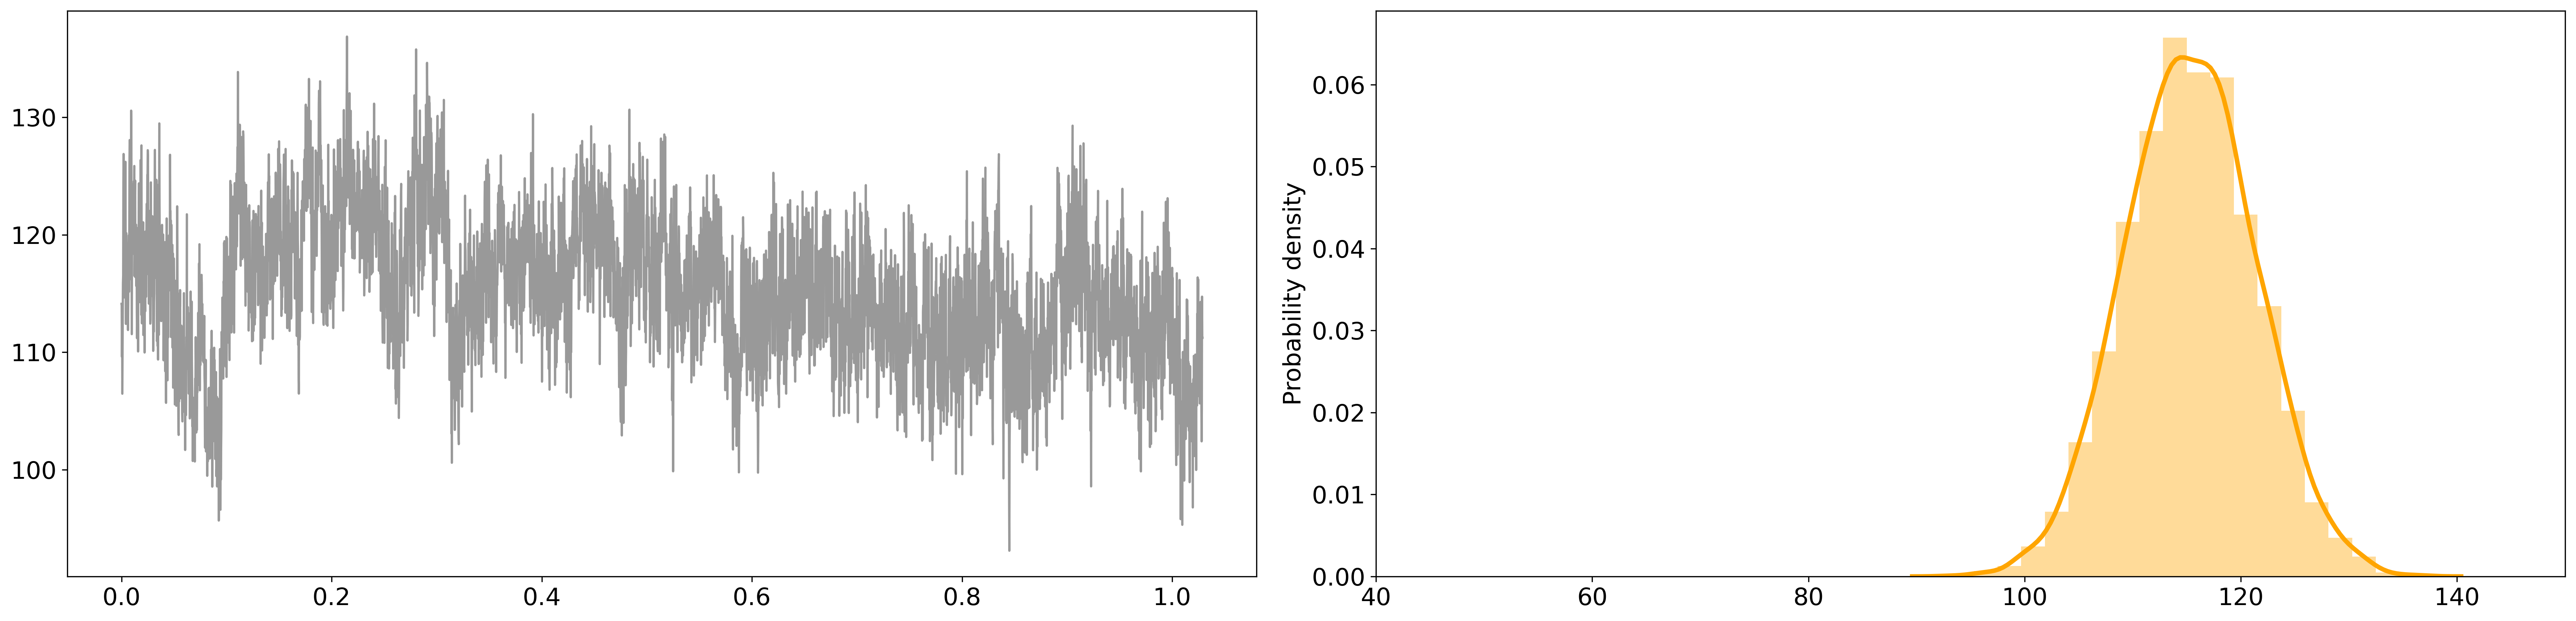

In [5]:
## CL PC

#files

clpcC = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PC_TFN_TFCal_angle_1us_200ps_zalPC_nc.dat'
clpcN = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/CL_PC_TFN_TFCal_angle_1us_200ps_zalPN_nc.dat'

# Angle
clpc_angle1_v = np.genfromtxt(clpcC, usecols=(1))
clpc_angle1eq_v = np.genfromtxt(clpcC, usecols=(1),skip_header=399)

clpc_angle1_t = np.genfromtxt(clpcC, usecols=(0))
clpc_angle1eq_t = np.genfromtxt(clpcC, usecols=(0),skip_header=399)

#clpc_angle2 = np.genfromtxt(clpcC, usecols=(0,2))
                         
# Projections
#clpcC_px = np.genfromtxt(clpcC, usecols=(0,2))
#clpcC_py = np.genfromtxt(clpcC, usecols=(0,3))
#clpcC_pz = np.genfromtxt(clpcC, usecols=(0,4)) 

#clpcC_pxm = np.genfromtxt(clpcC, usecols=(0,5))
#clpcC_pym = np.genfromtxt(clpcC, usecols=(0,6))
#clpcC_pzm = np.genfromtxt(clpcC, usecols=(0,7)) 
                        
#clpcN_px =  np.genfromtxt(clpcN, usecols=(0,2))
#clpcN_py =  np.genfromtxt(clpcN, usecols=(0,3))
#clpcN_pz =  np.genfromtxt(clpcN, usecols=(0,4)) 

#clpcN_pxm = np.genfromtxt(clpcN, usecols=(0,5))
#clpcN_pym = np.genfromtxt(clpcN, usecols=(0,6))
#clpcN_pzm = np.genfromtxt(clpcN, usecols=(0,7))     
                        
clpc_angle1_v2 = [180-x if x < 90 else x+0 for x in clpc_angle1_v ]
clpc_angle1_veq2 = [180-x if x < 90 else x+0 for x in clpc_angle1eq_v ]

#for x in clpc_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x
        
#for x in clpc_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x

#Rolling averages -- time evol
#rav_clpc_angle1v=np.mean(rolling_window(clpc_angle1_v, 20), 1)
#rav_clpc_angle1t=np.mean(rolling_window(clpc_angle1_t, 20), 1)
 
plt.figure( figsize = (24,6)) 
                        
plt.subplot(121)
plt.plot((clpc_angle1_t*0.0002),(clpc_angle1_v2), color='gray', alpha=0.8)
#plt.plot((rav_clpc_angle1t*0.0002),(rav_clpc_angle1v), color='red', alpha=1)

plt.subplot(122)
sns.distplot((clpc_angle1_veq2), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([40, 150])
#plt.ylim([0, 0.07])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()

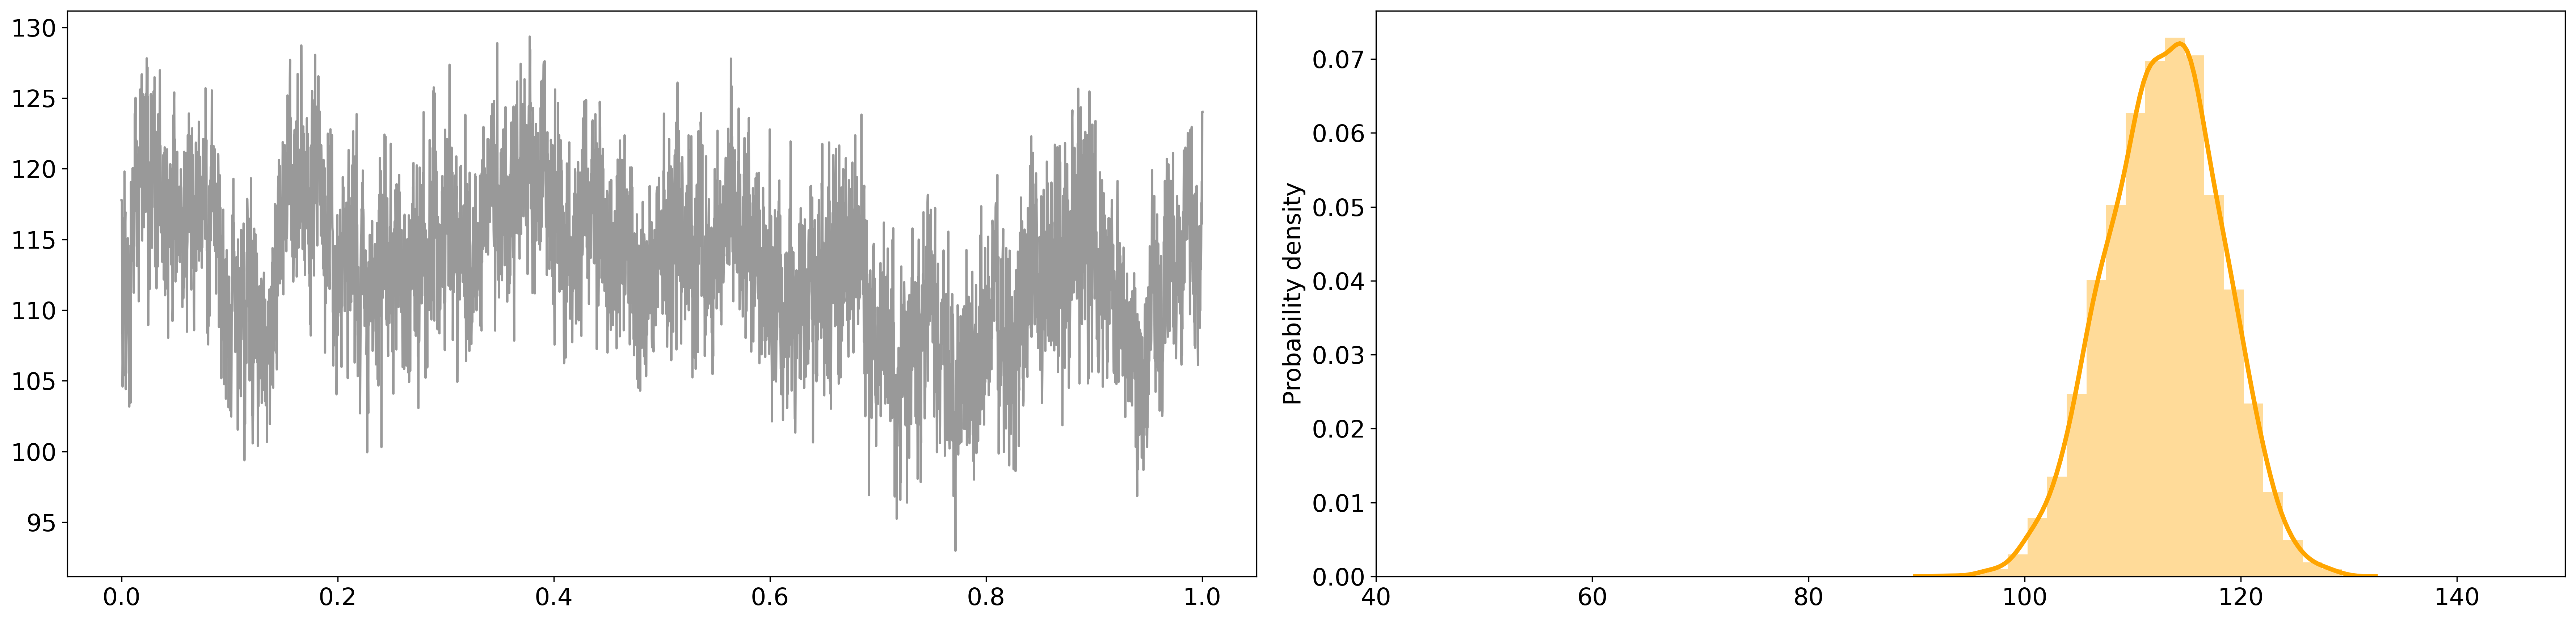

In [4]:
## NC PCPS

#files

ncpcpsC = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/NC_PCPS_TFN_TFCal_angle_1us_200ps_zalPC_nc.dat'
ncpcpsN = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/NC_PCPS_TFN_TFCal_angle_1us_200ps_zalPN_nc.dat'

# Angle
ncpcps_angle1_v = np.genfromtxt(ncpcpsC, usecols=(1))
ncpcps_angle1eq_v = np.genfromtxt(ncpcpsC, usecols=(1),skip_header=399)

ncpcps_angle1_t = np.genfromtxt(ncpcpsC, usecols=(0))
ncpcps_angle1eq_t = np.genfromtxt(ncpcpsC, usecols=(0),skip_header=399)

#ncpcps_angle2 = np.genfromtxt(ncpcpsC, usecols=(0,2))
                         
# Projections
#ncpcpsC_px = np.genfromtxt(ncpcpsC, usecols=(0,2))
#ncpcpsC_py = np.genfromtxt(ncpcpsC, usecols=(0,3))
#ncpcpsC_pz = np.genfromtxt(ncpcpsC, usecols=(0,4)) 

#ncpcpsC_pxm = np.genfromtxt(ncpcpsC, usecols=(0,5))
#ncpcpsC_pym = np.genfromtxt(ncpcpsC, usecols=(0,6))
#ncpcpsC_pzm = np.genfromtxt(ncpcpsC, usecols=(0,7)) 
                        
#ncpcpsN_px =  np.genfromtxt(ncpcpsN, usecols=(0,2))
#ncpcpsN_py =  np.genfromtxt(ncpcpsN, usecols=(0,3))
#ncpcpsN_pz =  np.genfromtxt(ncpcpsN, usecols=(0,4)) 

#ncpcpsN_pxm = np.genfromtxt(ncpcpsN, usecols=(0,5))
#ncpcpsN_pym = np.genfromtxt(ncpcpsN, usecols=(0,6))
#ncpcpsN_pzm = np.genfromtxt(ncpcpsN, usecols=(0,7))     
                        
ncpcps_angle1_v2 = [180-x if x < 90 else x+0 for x in ncpcps_angle1_v ]
ncpcps_angle1_veq2 = [180-x if x < 90 else x+0 for x in ncpcps_angle1eq_v ]

#for x in ncpcps_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x
        
#for x in ncpcps_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x

#Rolling averages -- time evol
#rav_ncpcps_angle1v=np.mean(rolling_window(ncpcps_angle1_v, 20), 1)
#rav_ncpcps_angle1t=np.mean(rolling_window(ncpcps_angle1_t, 20), 1)
 
plt.figure( figsize = (24,6)) 
                        
plt.subplot(121)
plt.plot((ncpcps_angle1_t*0.0002),(ncpcps_angle1_v2), color='gray', alpha=0.8)
#plt.plot((rav_ncpcps_angle1t*0.0002),(rav_ncpcps_angle1v), color='red', alpha=1)

plt.subplot(122)
sns.distplot((ncpcps_angle1_veq2), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([40, 150])
#plt.ylim([0, 0.07])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


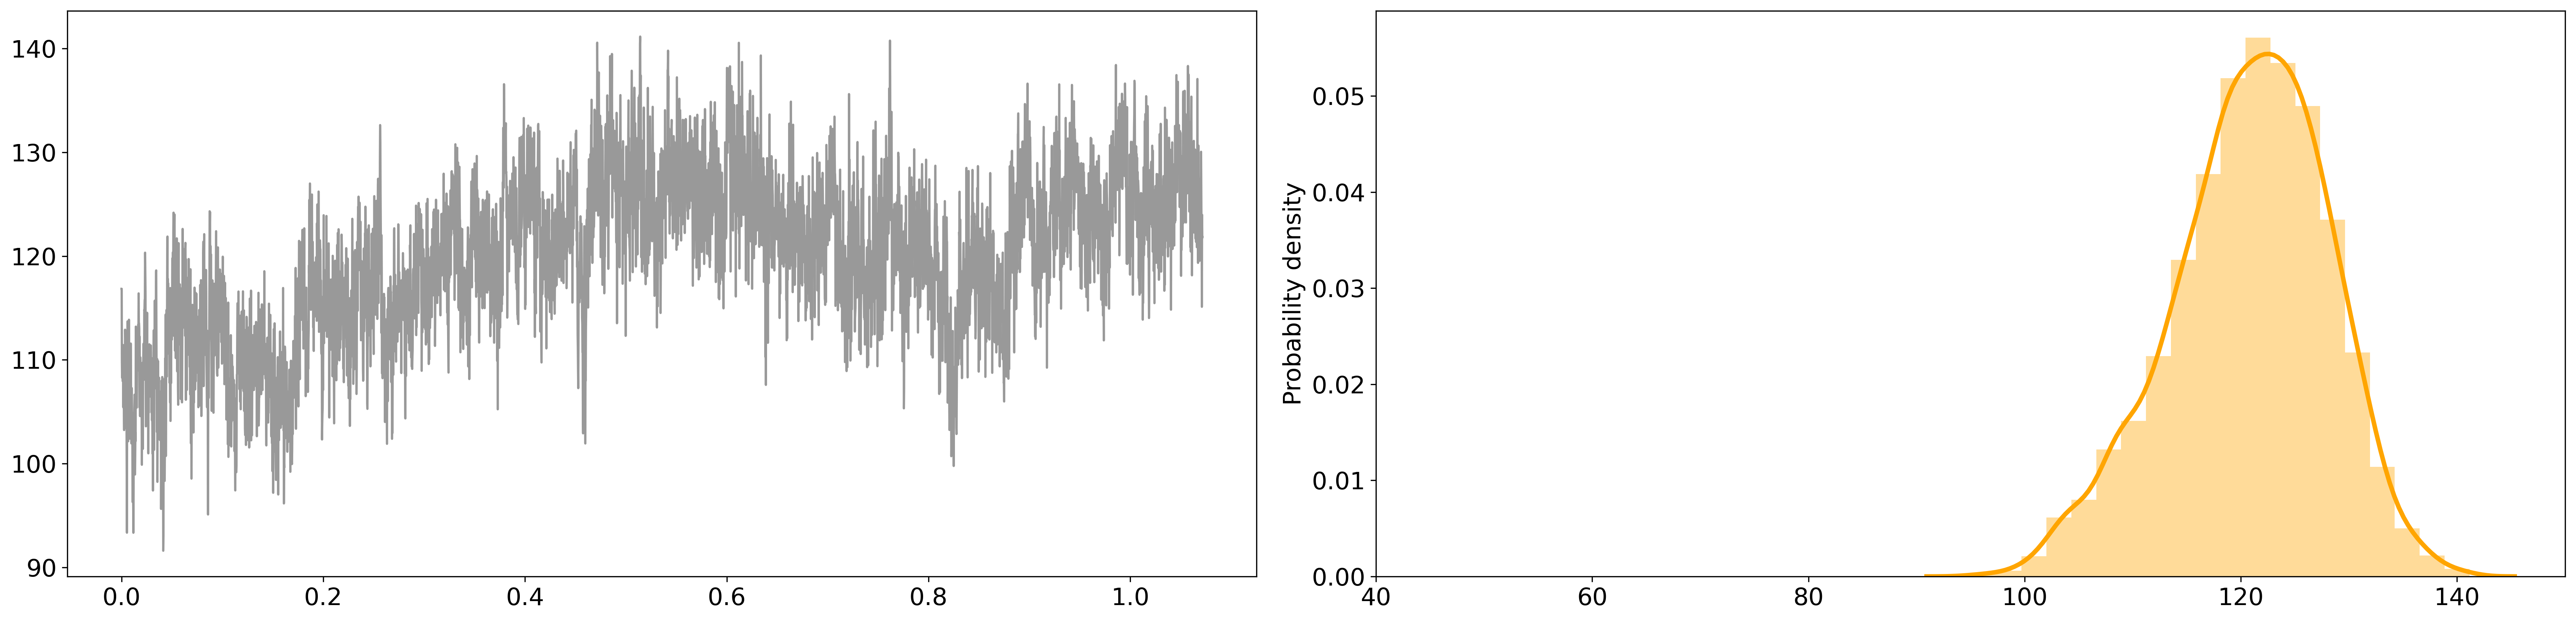

In [3]:
## NC PC

#files

ncpcC = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/NC_PC_TFN_TFCal_angle_1us_200ps_zalPC_nc.dat'
ncpcN = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TFN_TFC_test/NC_PC_TFN_TFCal_angle_1us_200ps_zalPN_nc.dat'

# Angle
ncpc_angle1_v = np.genfromtxt(ncpcC, usecols=(1))
ncpc_angle1eq_v = np.genfromtxt(ncpcC, usecols=(1),skip_header=399)

ncpc_angle1_t = np.genfromtxt(ncpcC, usecols=(0))
ncpc_angle1eq_t = np.genfromtxt(ncpcC, usecols=(0),skip_header=399)

#ncpc_angle2 = np.genfromtxt(ncpcC, usecols=(0,2))
                         
# Projections
#ncpcC_px = np.genfromtxt(ncpcC, usecols=(0,2))
#ncpcC_py = np.genfromtxt(ncpcC, usecols=(0,3))
#ncpcC_pz = np.genfromtxt(ncpcC, usecols=(0,4)) 

#ncpcC_pxm = np.genfromtxt(ncpcC, usecols=(0,5))
#ncpcC_pym = np.genfromtxt(ncpcC, usecols=(0,6))
#ncpcC_pzm = np.genfromtxt(ncpcC, usecols=(0,7)) 
                        
#ncpcN_px =  np.genfromtxt(ncpcN, usecols=(0,2))
#ncpcN_py =  np.genfromtxt(ncpcN, usecols=(0,3))
#ncpcN_pz =  np.genfromtxt(ncpcN, usecols=(0,4)) 

#ncpcN_pxm = np.genfromtxt(ncpcN, usecols=(0,5))
#ncpcN_pym = np.genfromtxt(ncpcN, usecols=(0,6))
#ncpcN_pzm = np.genfromtxt(ncpcN, usecols=(0,7))     
                        
ncpc_angle1_v2 = [180-x if x < 90 else x+0 for x in ncpc_angle1_v ]
ncpc_angle1_veq2 = [180-x if x < 90 else x+0 for x in ncpc_angle1eq_v ]

#for x in ncpc_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x
        
#for x in ncpc_angle1eq_v:
#    if x < 90: 
#        180+x
#    else:
#        x=x

#Rolling averages -- time evol
#rav_ncpc_angle1v=np.mean(rolling_window(ncpc_angle1_v, 20), 1)
#rav_ncpc_angle1t=np.mean(rolling_window(ncpc_angle1_t, 20), 1)
 
plt.figure( figsize = (24,6)) 
                        
plt.subplot(121)
plt.plot((ncpc_angle1_t*0.0002),(ncpc_angle1_v2), color='gray', alpha=0.8)
#plt.plot((rav_ncpc_angle1t*0.0002),(rav_ncpc_angle1v), color='red', alpha=1)

plt.subplot(122)
sns.distplot((ncpc_angle1_veq2), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([40, 150])
#plt.ylim([0, 0.07])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()

CLpcps_R1
115.31158538920768 1.6017736939575464


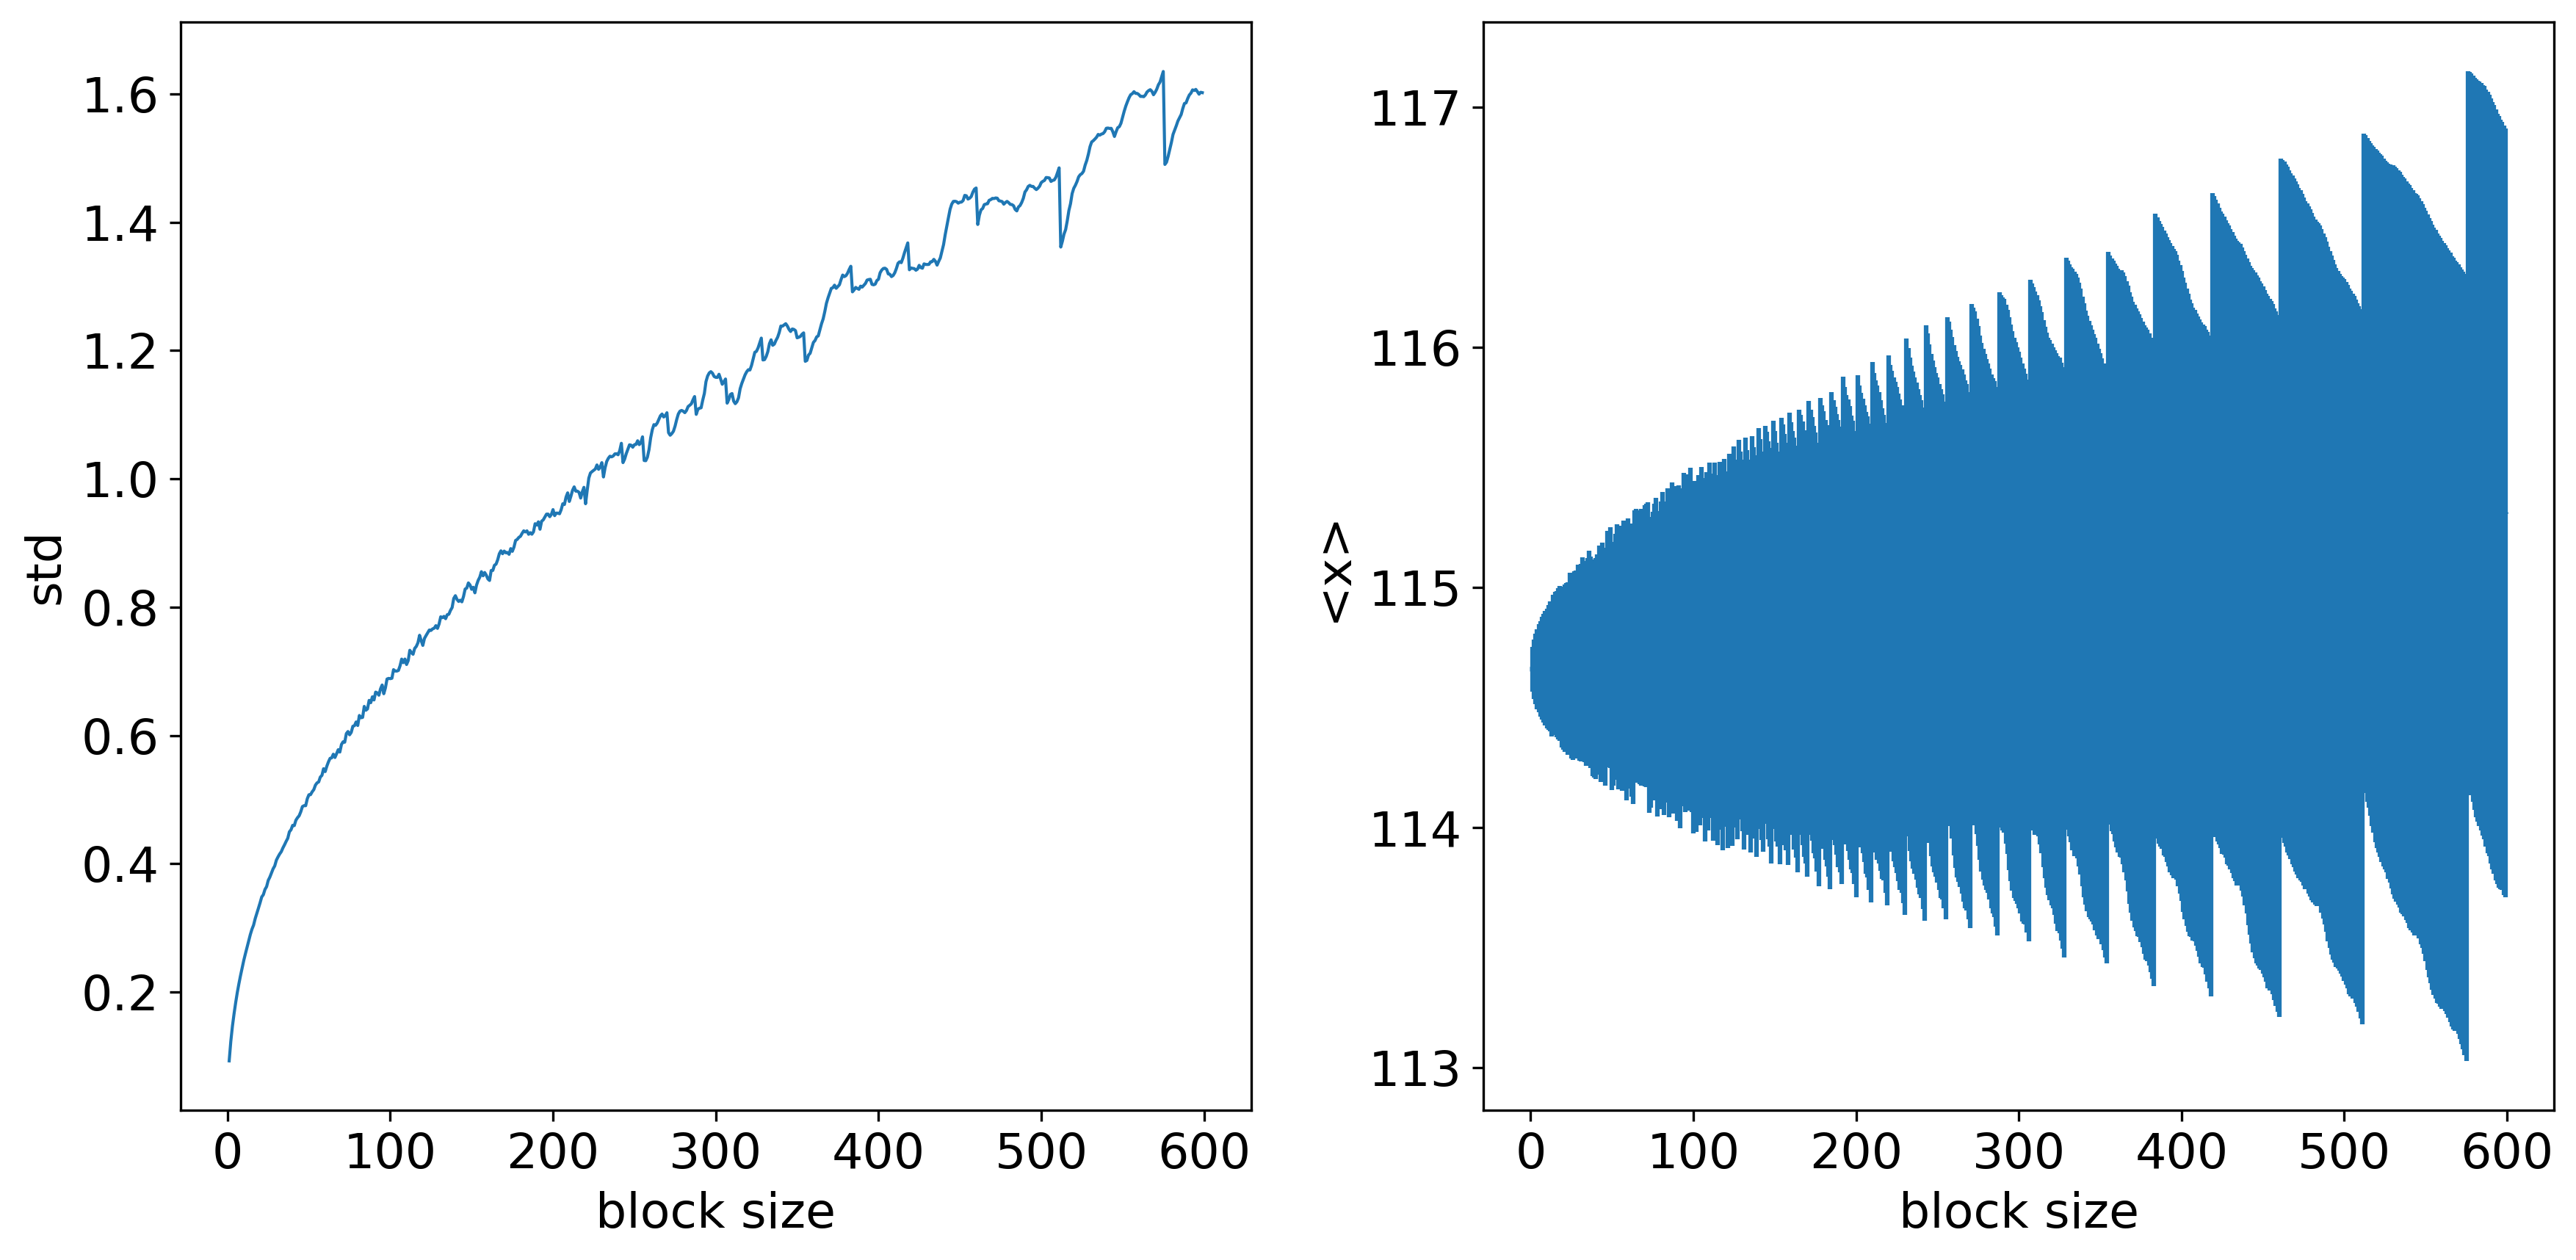

CLpcps_R2
113.732791609765 1.1997655406947925


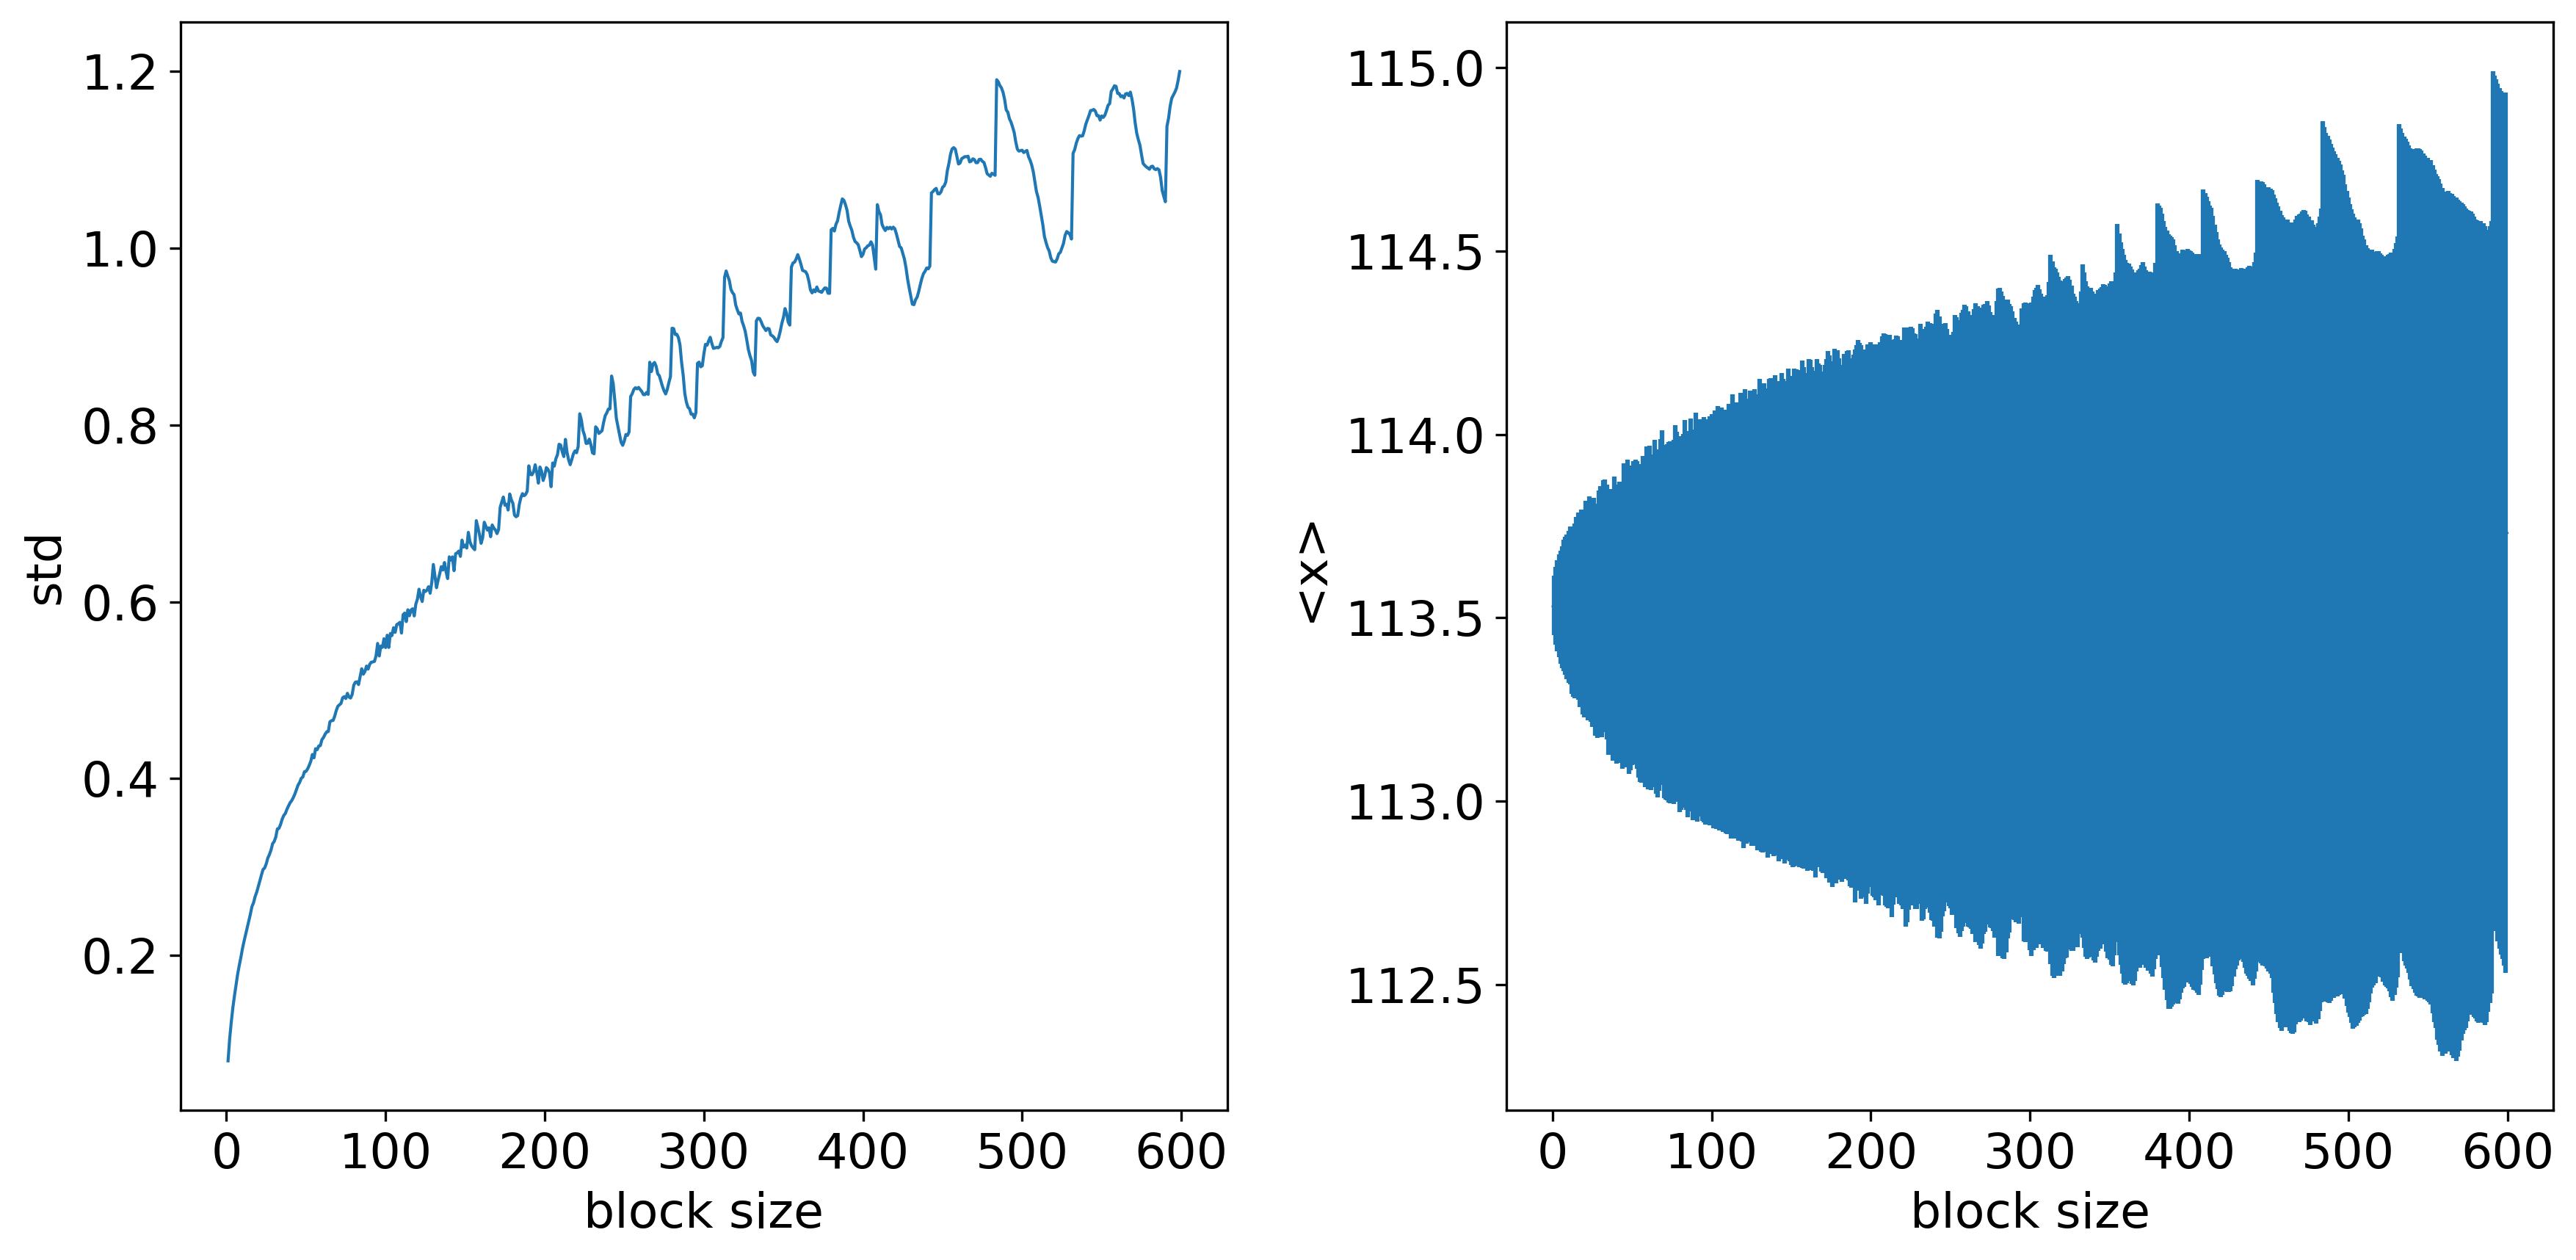

CLpcps R3
114.42367161199567 0.673823090197649


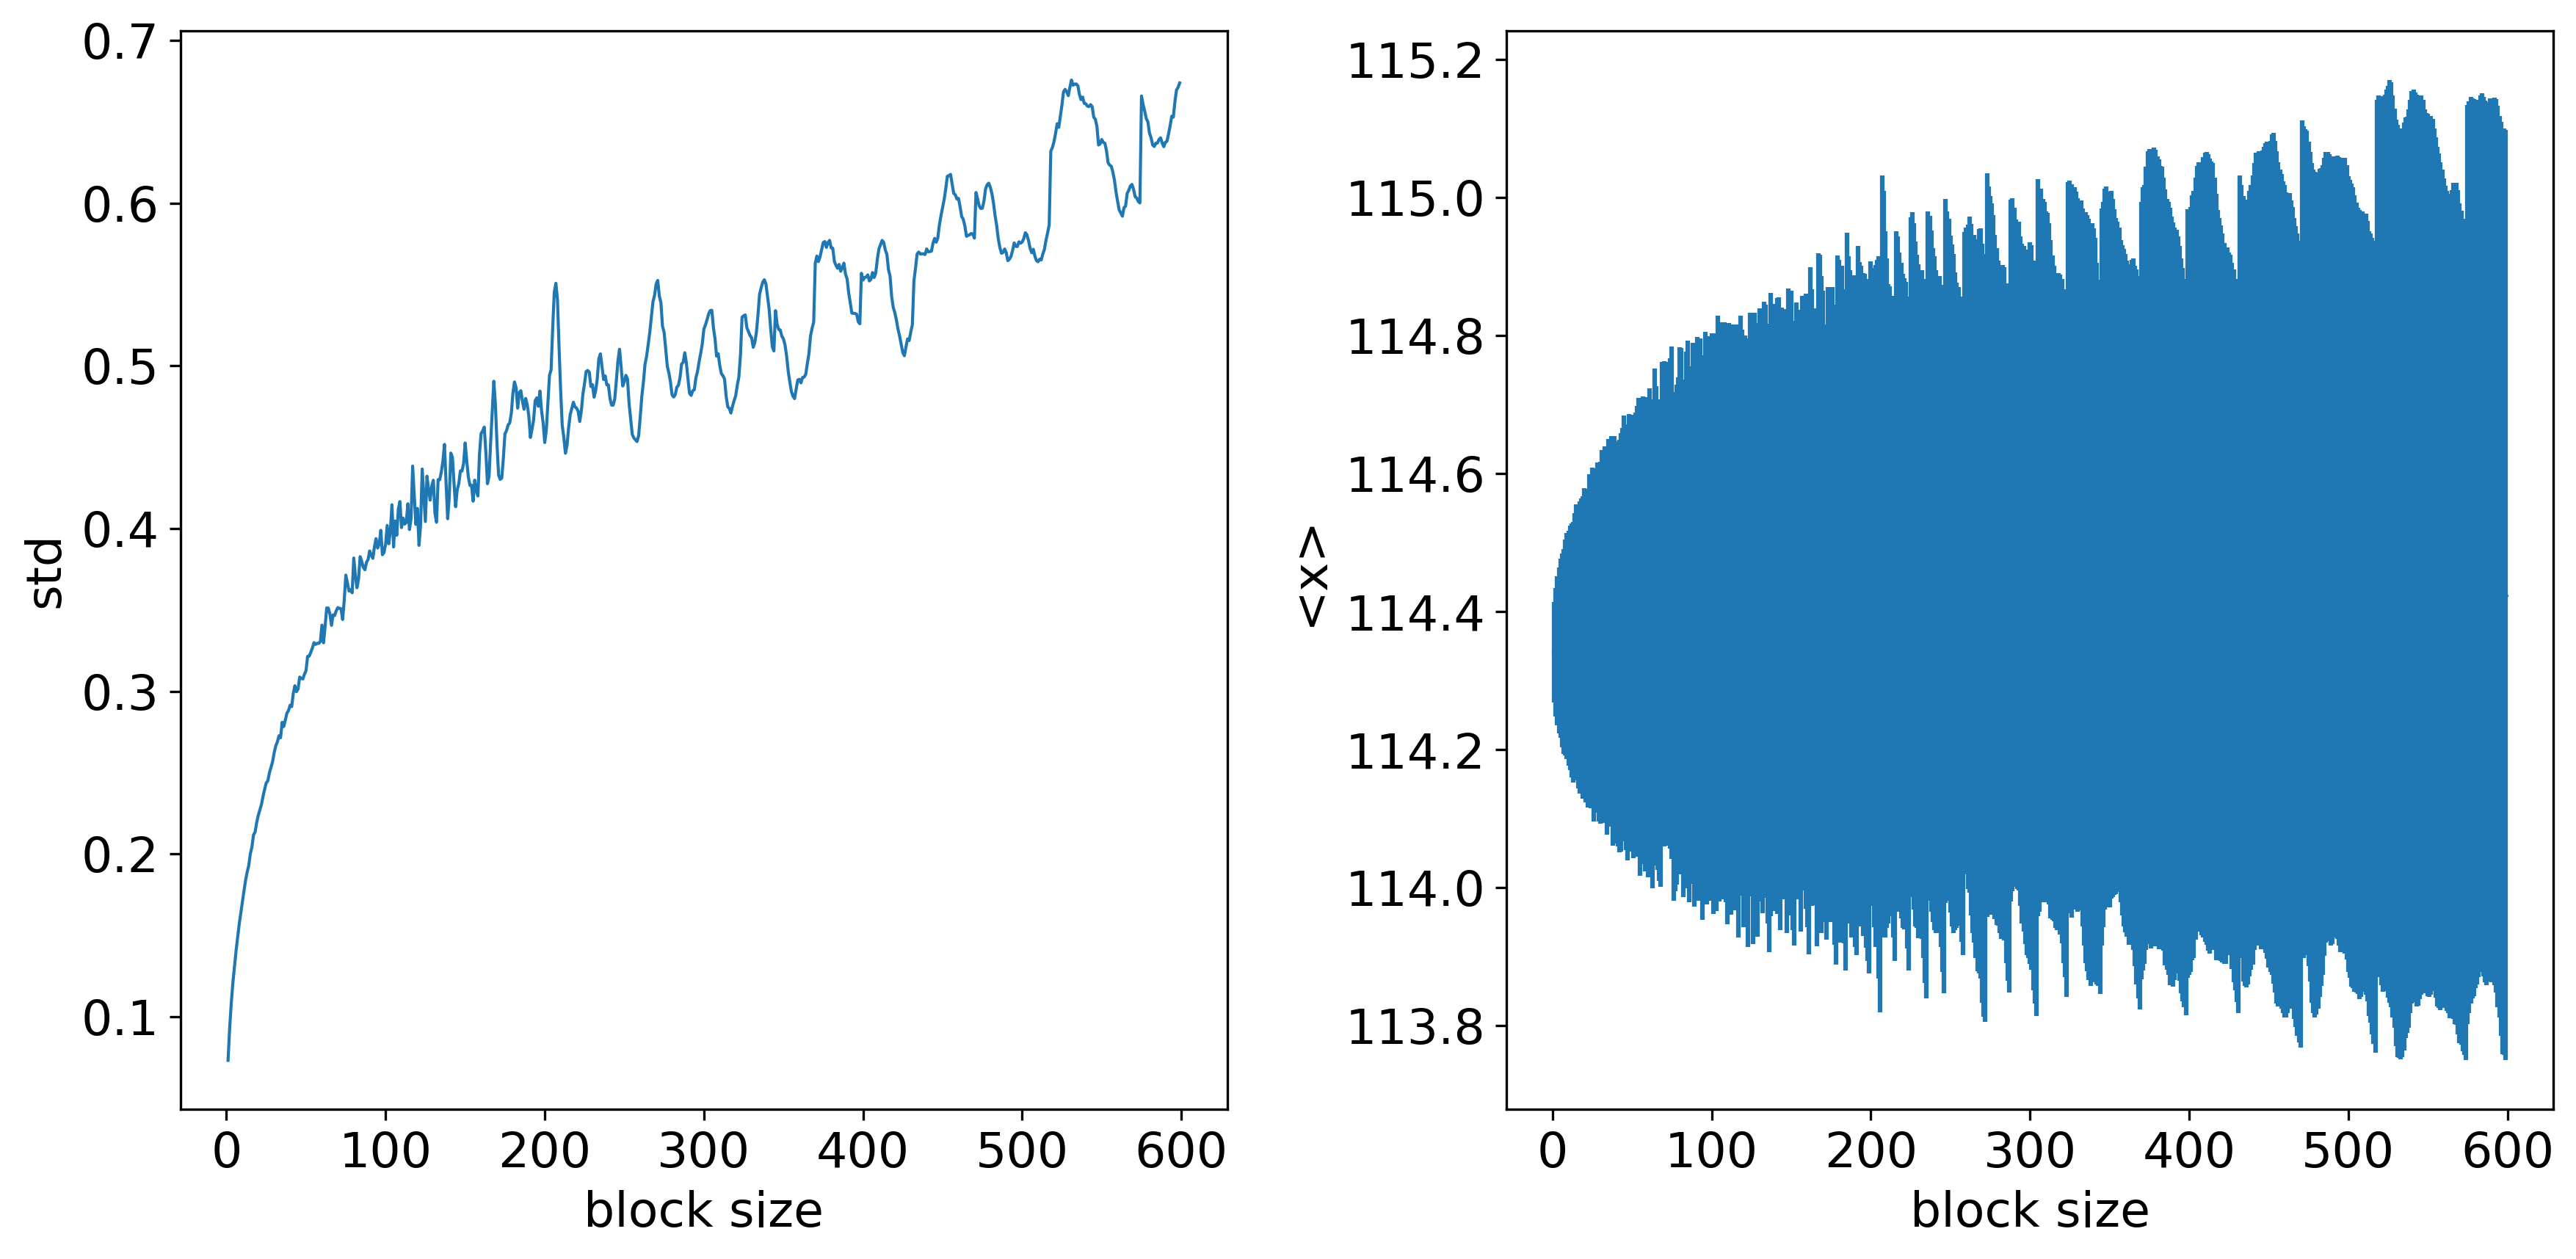

CLpc
115.87028009292585 1.0848440235960342


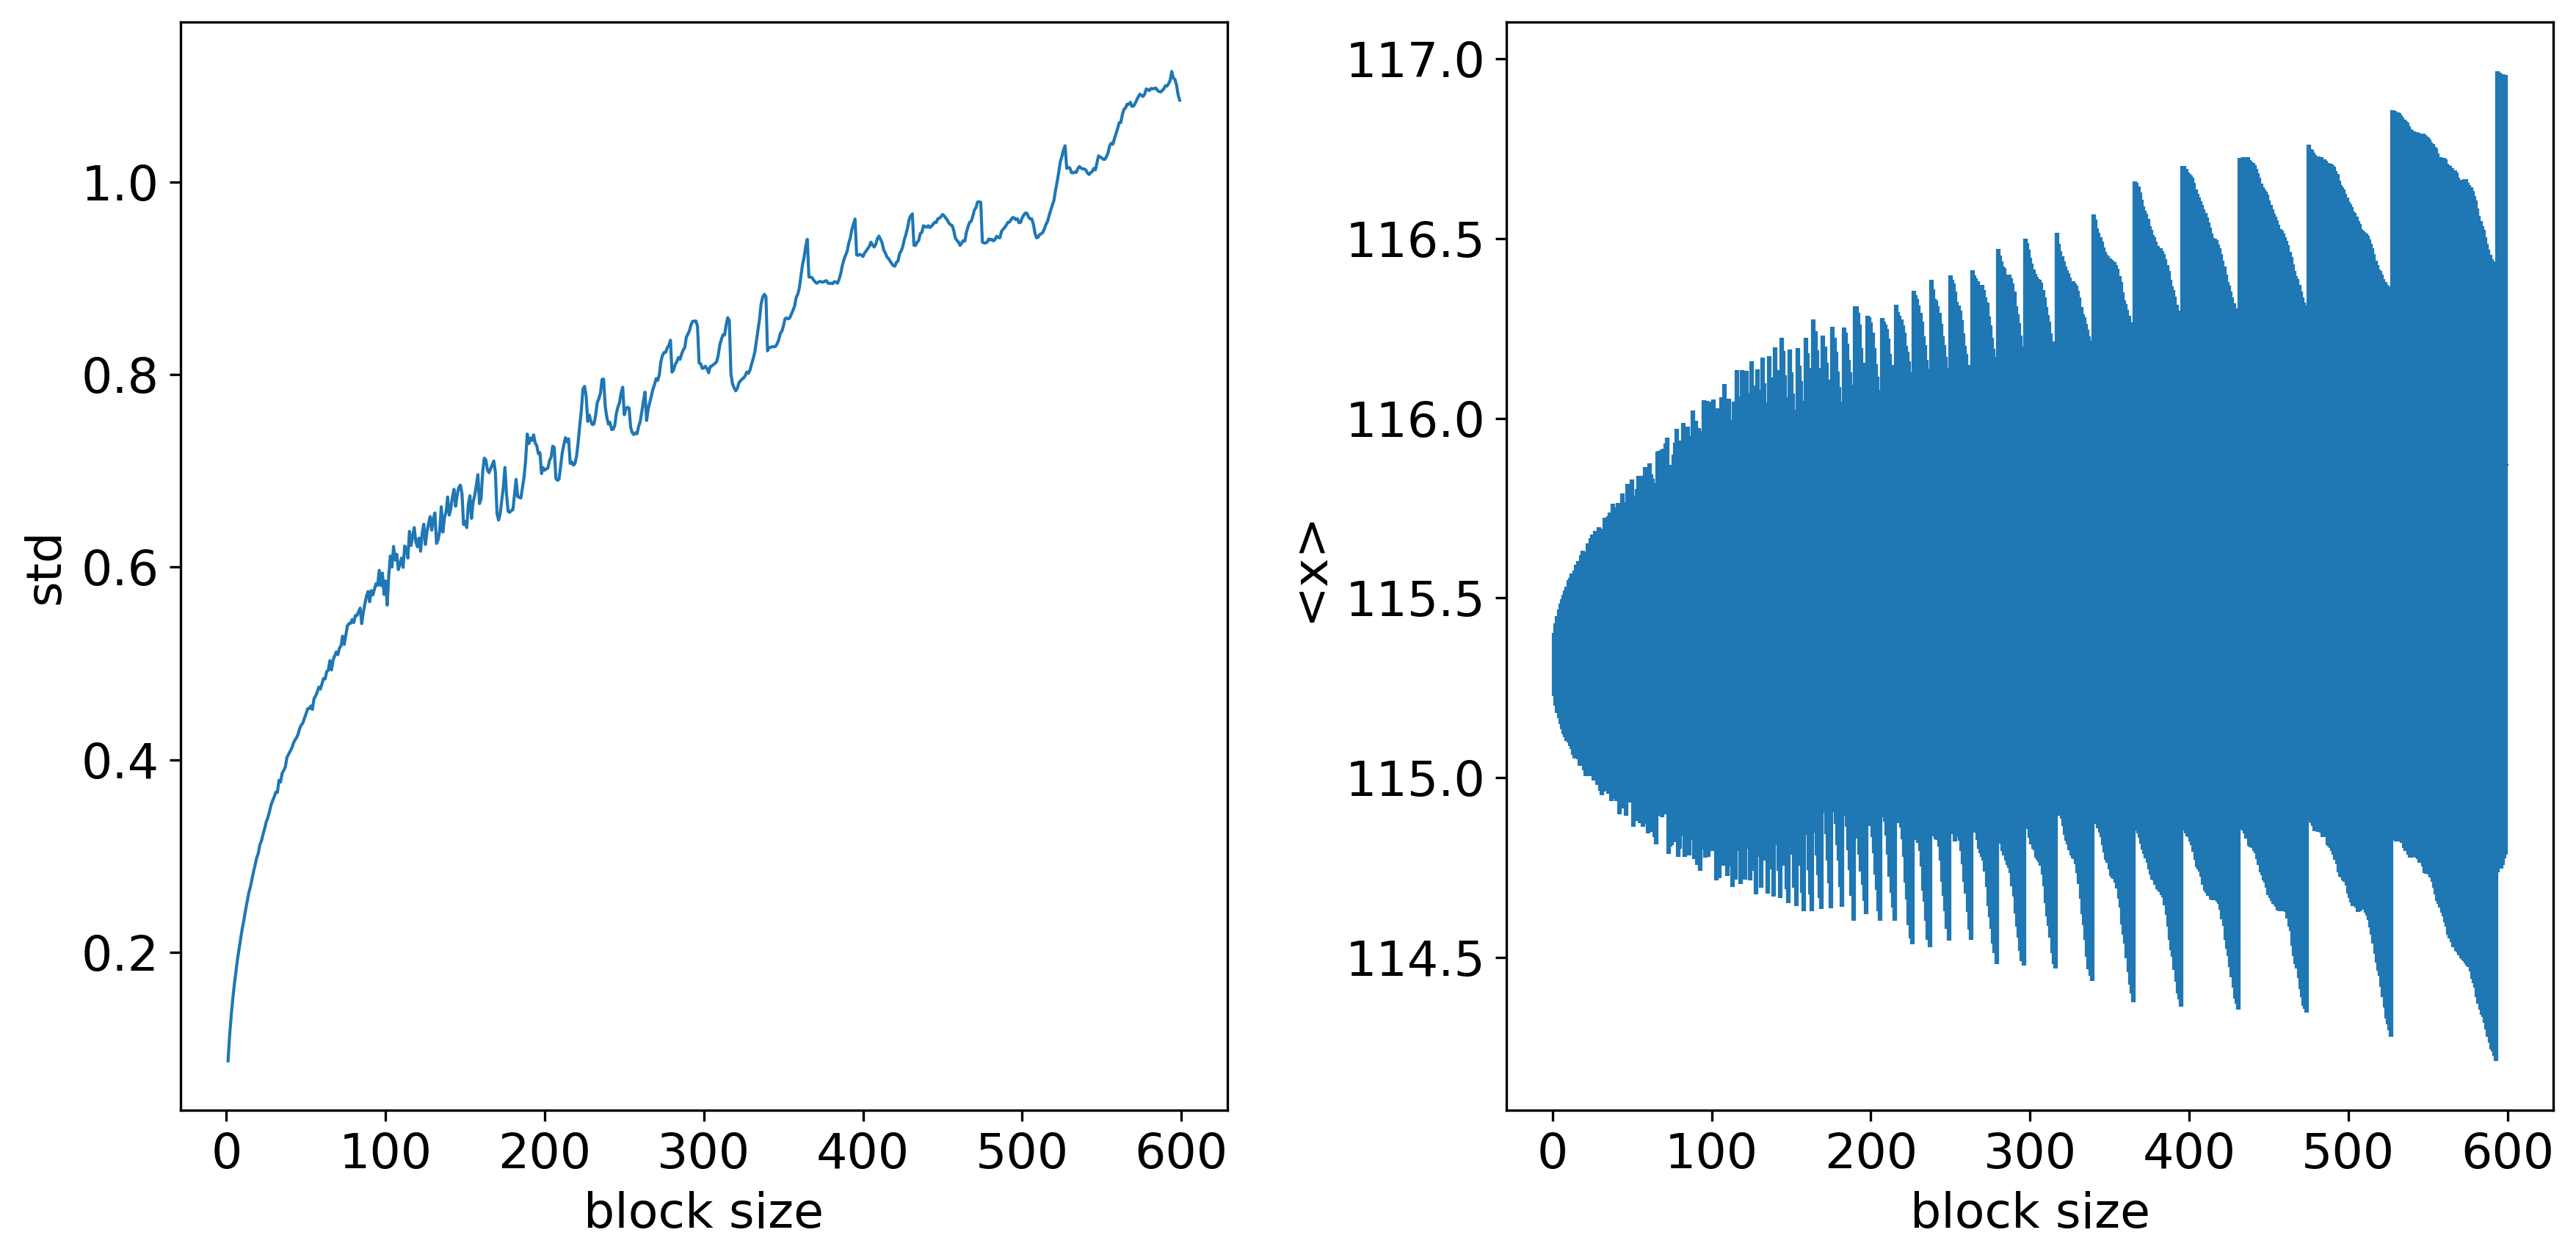

NCpc
120.52895230686545 1.8335981144029756


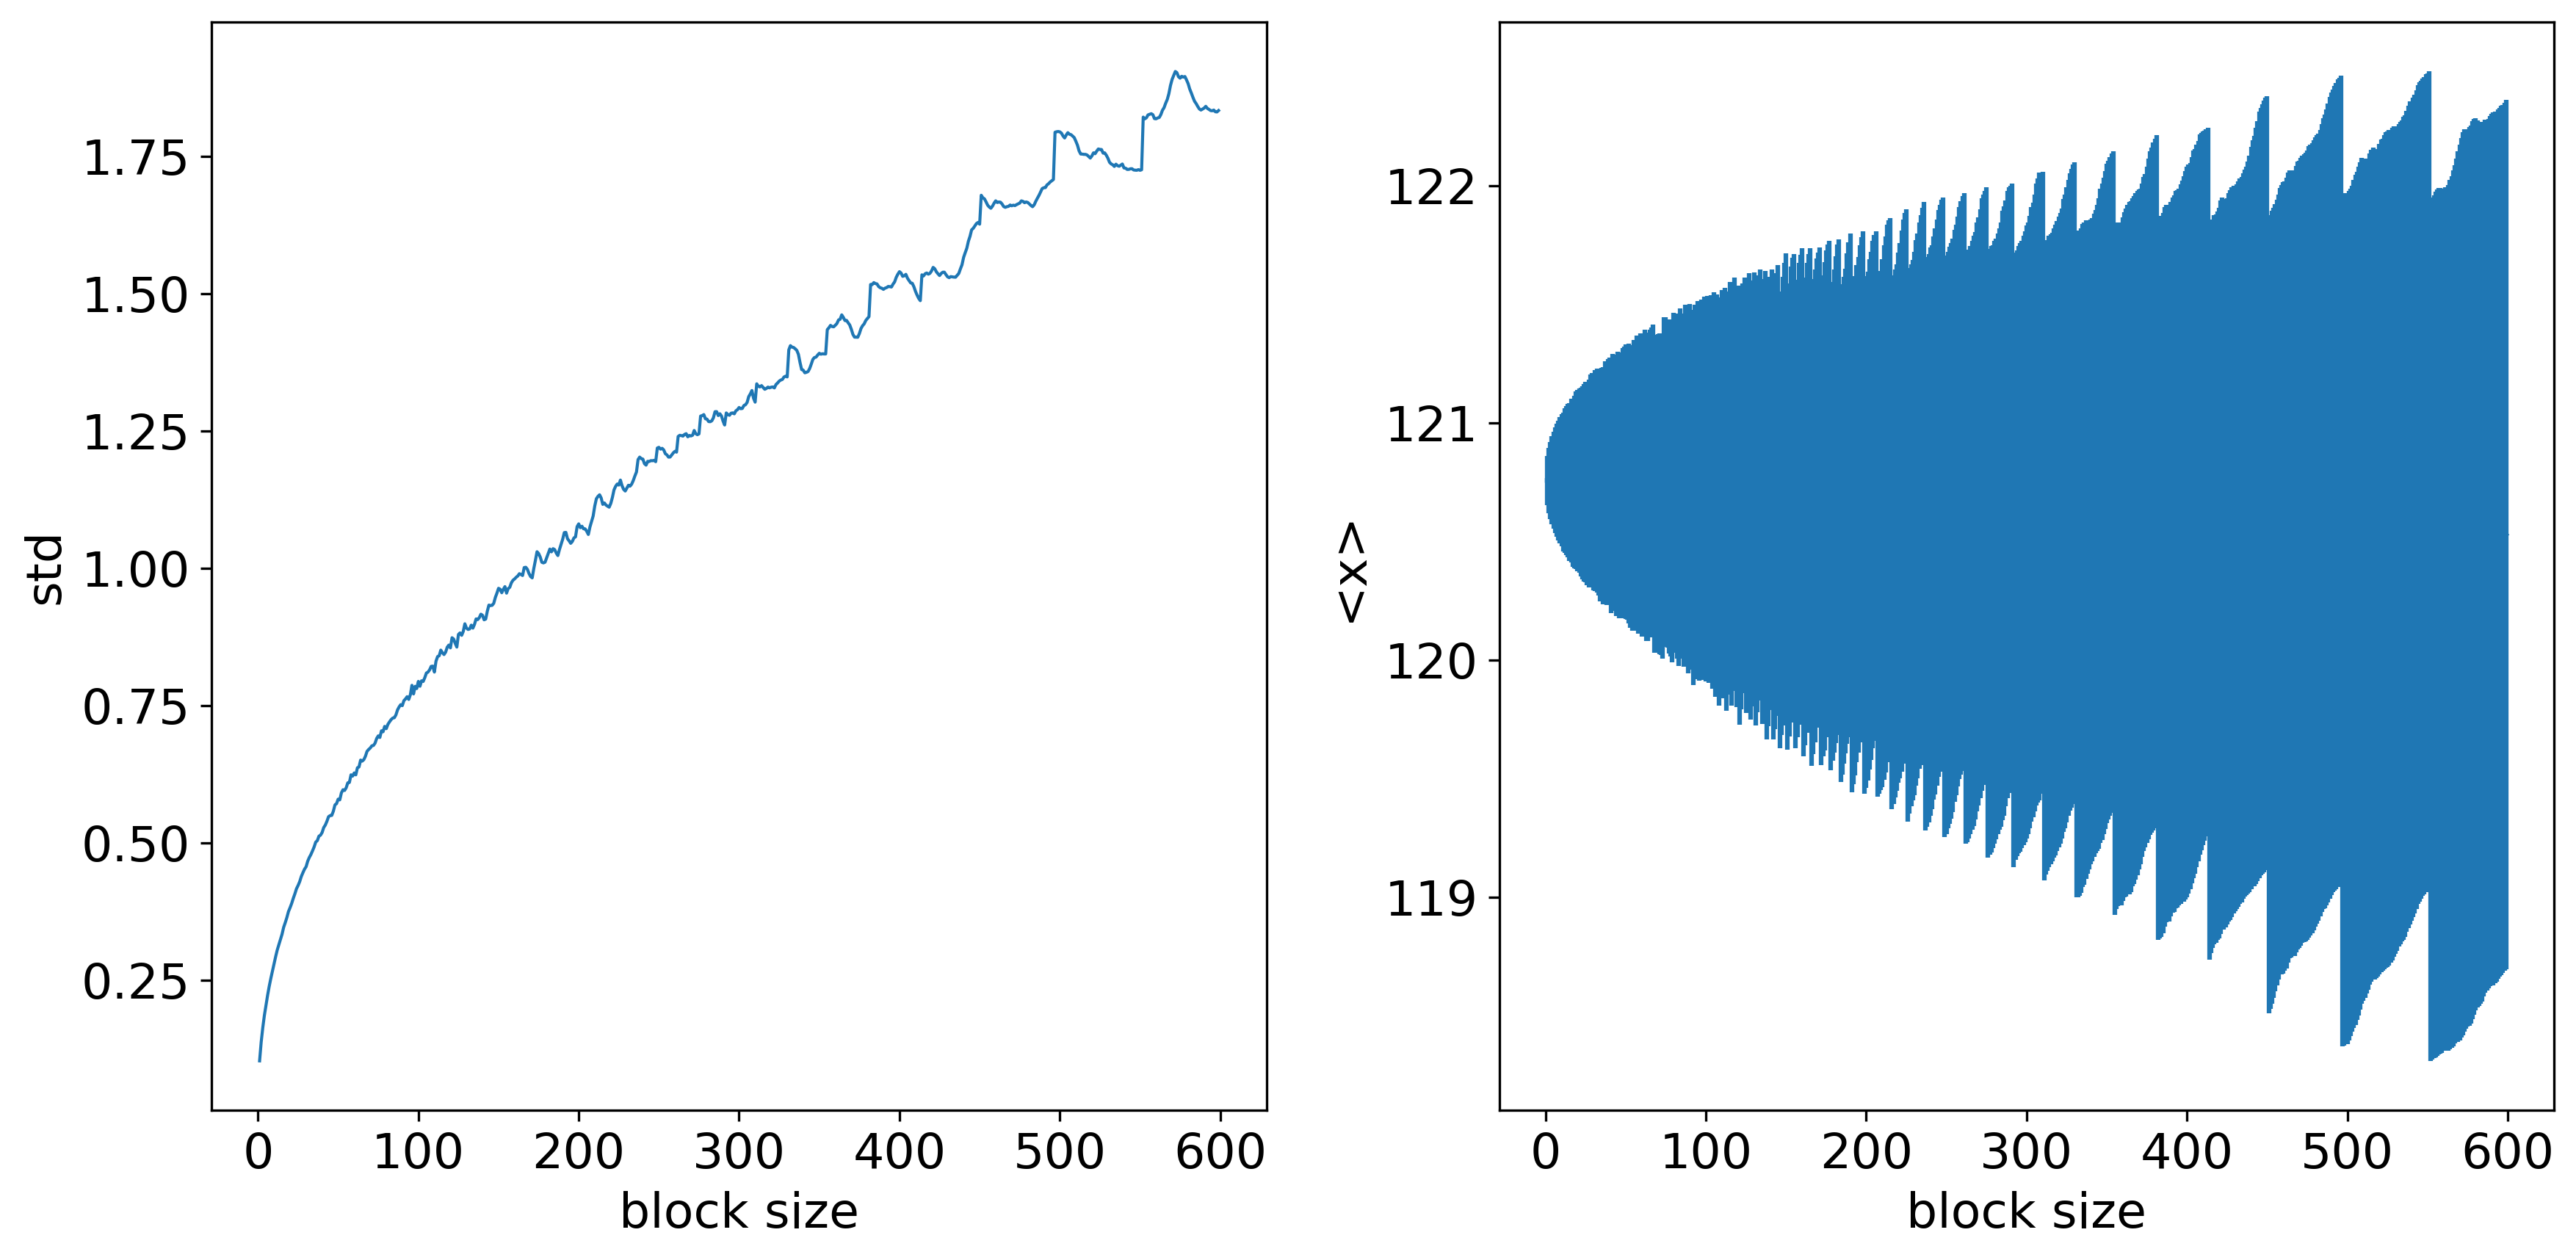

NCpcps
113.05077342250983 1.0923638958865867


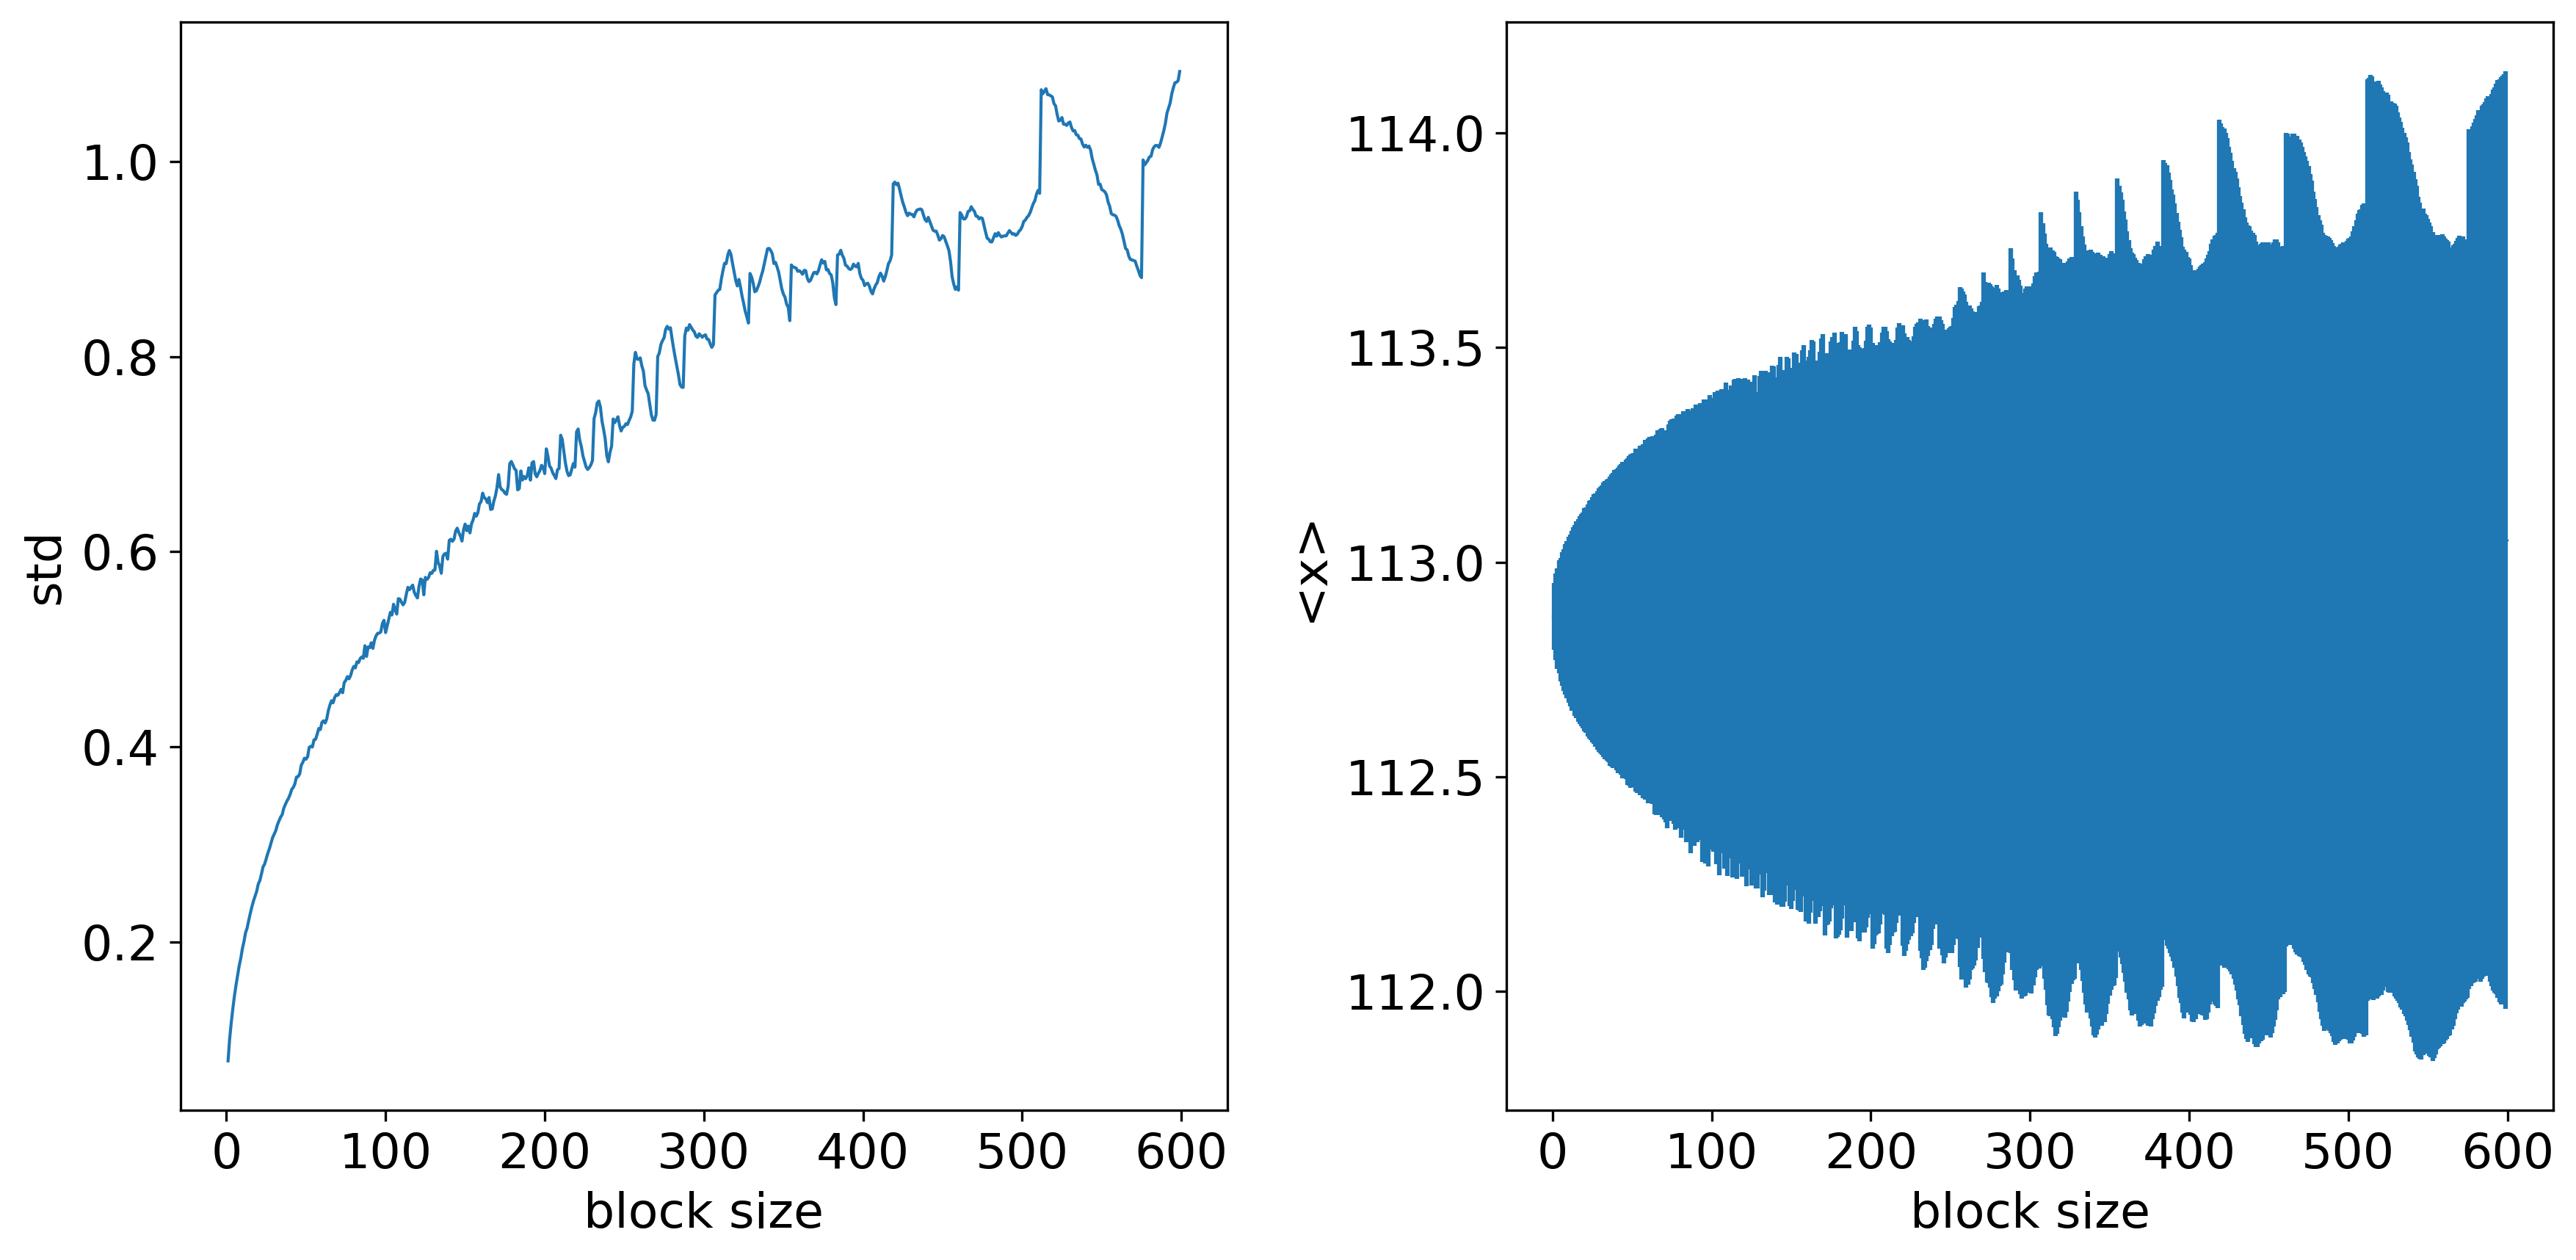

TFF7pcps
118.05280077086661 0.8848325368425162


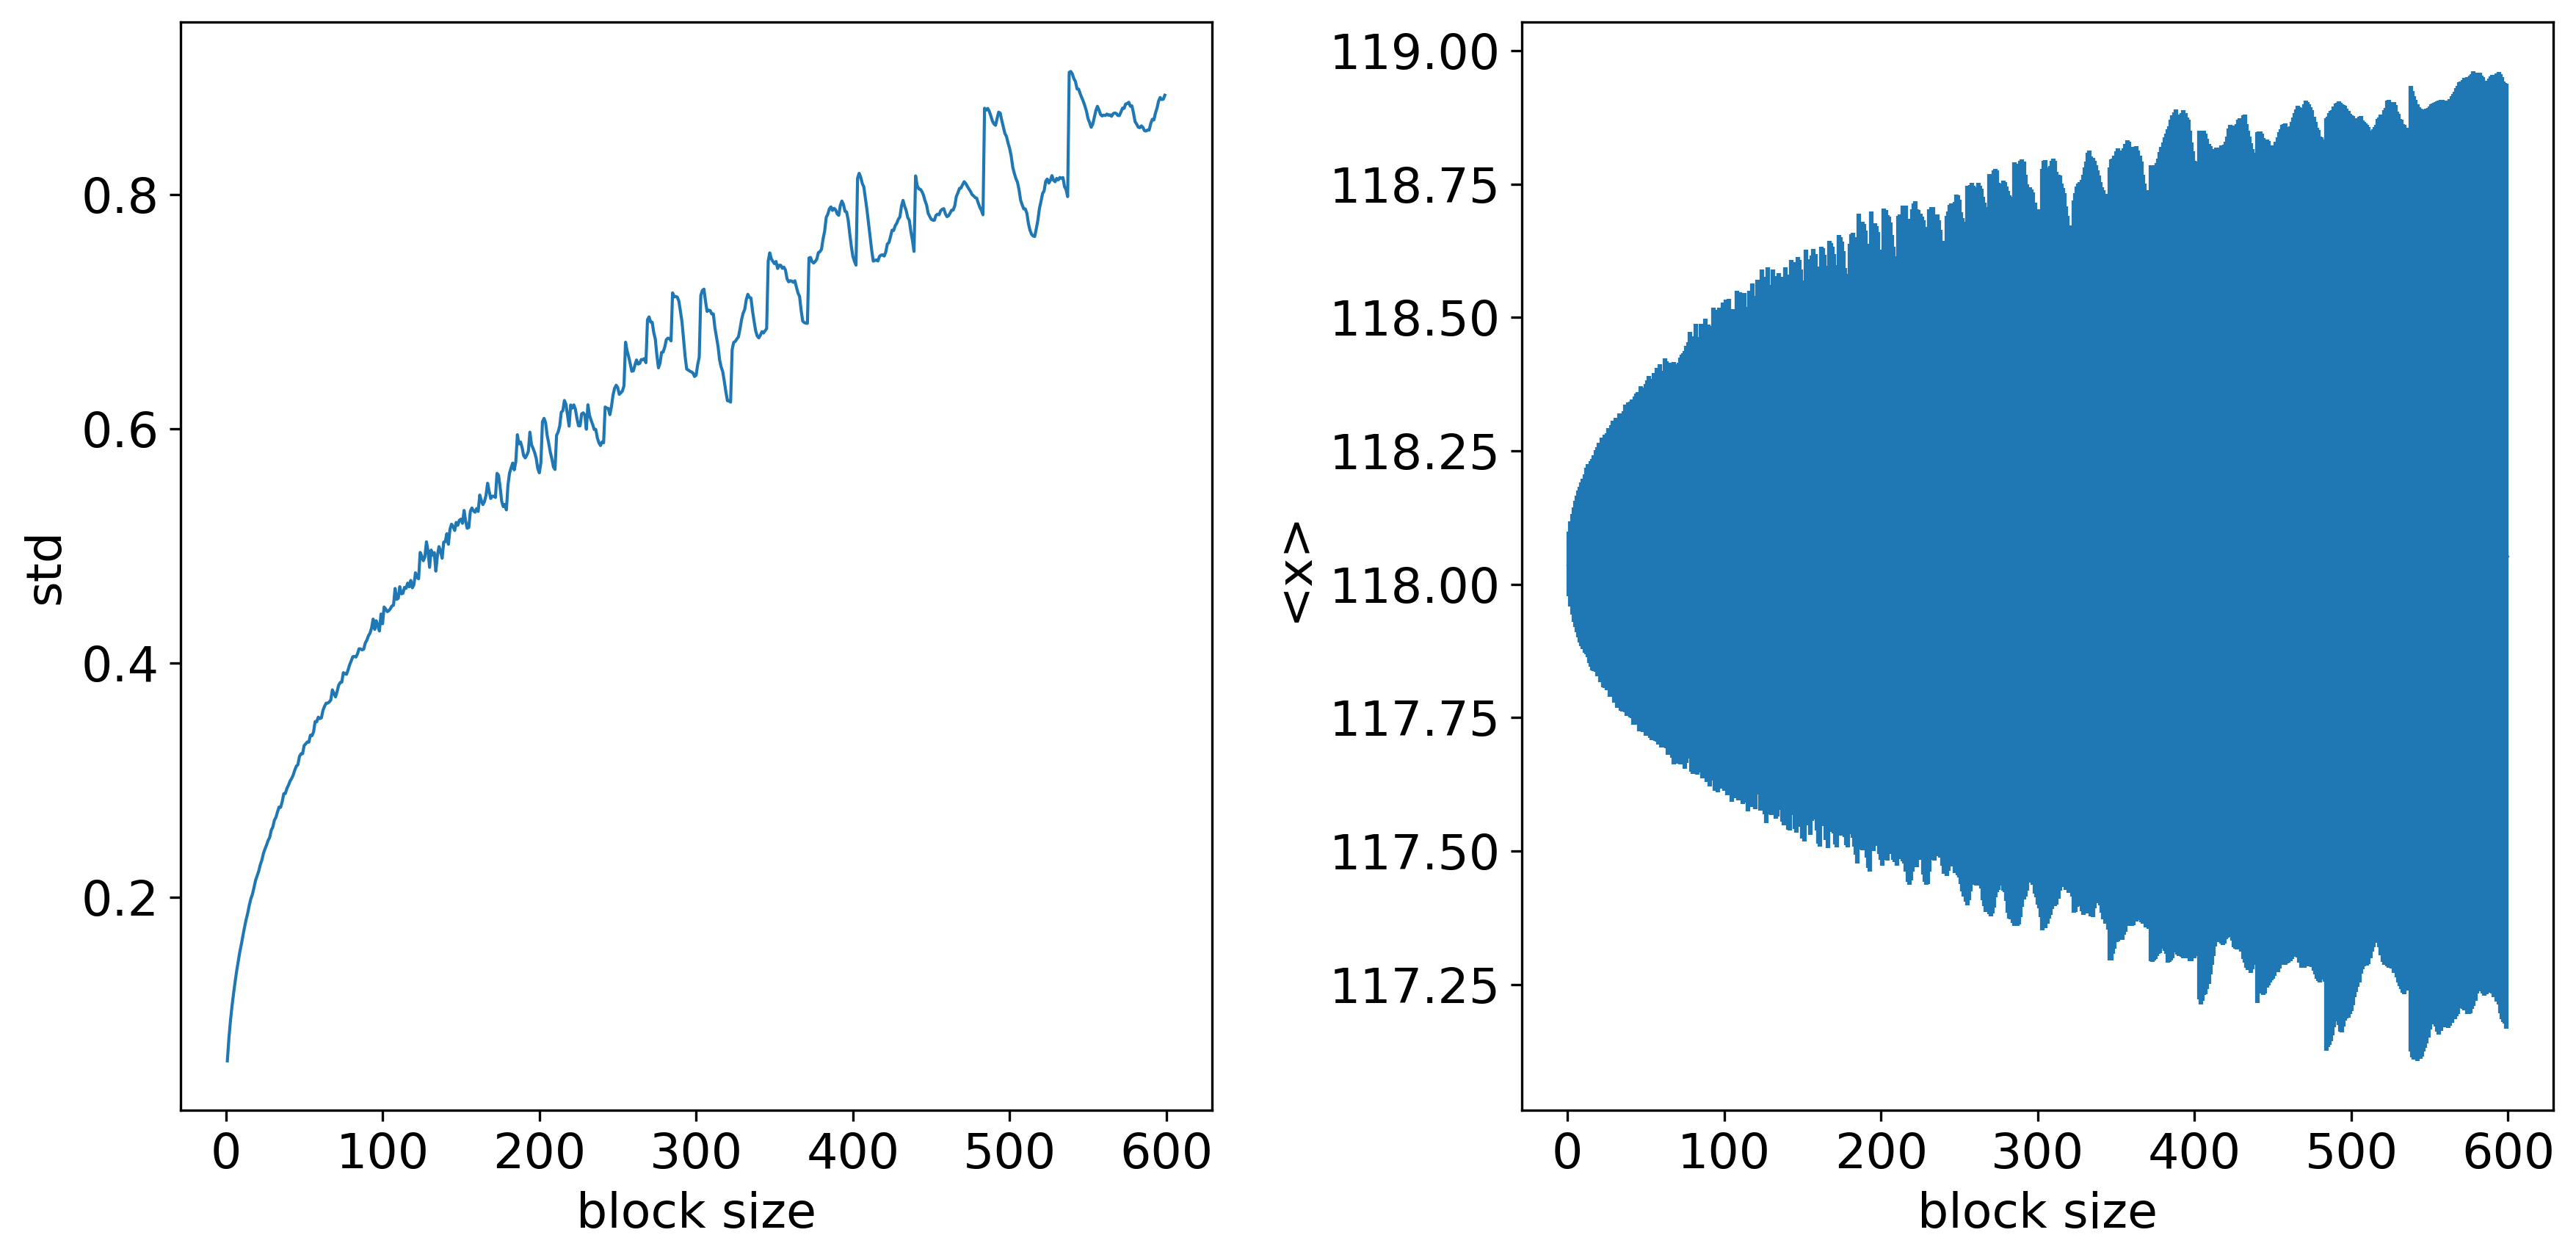

In [12]:
print ('CLpcps_R1')
blockAverage(r1_angle1_veq2,maxBlockSize=600)
print ('CLpcps_R2')
blockAverage(r2_angle1_veq2,maxBlockSize=600)
print ('CLpcps R3')
blockAverage(r3_angle1_veq2,maxBlockSize=600)
print ('CLpc')
blockAverage(clpc_angle1_veq2,maxBlockSize=600)
print ('NCpc')
blockAverage(ncpc_angle1_veq2,maxBlockSize=600)
print ('NCpcps')
blockAverage(ncpcps_angle1_veq2,maxBlockSize=600)
print ('TFF7pcps')
blockAverage(tff7_angle1_veq2,maxBlockSize=600)


In [ ]:
plt.figure( figsize = (8,8)) 
                        
plt.subplot(111)
sns.distplot((r1_angle1_veq2), bins=20,    hist = False, kde = True, kde_kws = {'linewidth': 1.5}, color='C1',label='CL_pcps_r1')
sns.distplot((r2_angle1_veq2), bins=20,    hist = False, kde = True, kde_kws = {'linewidth': 1.5}, color='C2',label='CL_pcps_r2')
sns.distplot((r3_angle1_veq2), bins=20,    hist = False, kde = True, kde_kws = {'linewidth': 1.5}, color='C3',label='CL_pcps_r3')
sns.distplot((tff7_angle1_veq2), bins=20,  hist = False, kde = True, kde_kws = {'linewidth': 1.5}, color='C4',label='TFF7_pcps')
sns.distplot((clpc_angle1_veq2), bins=20,  hist = False, kde = True, kde_kws = {'linewidth': 1.5}, color='C5',label='CL_pc')
sns.distplot((ncpc_angle1_veq2), bins=20,  hist = False, kde = True, kde_kws = {'linewidth': 1.5}, color='C6',label='NC_pc')
sns.distplot((ncpcps_angle1_veq2), bins=20,hist = False, kde = True, kde_kws = {'linewidth': 1.5}, color='C7',label='NC_pcps')

plt.legend(loc='best', frameon = False)
#plt.xlabel('F7 AS - memb dist. (Å)')
plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
plt.xlim([80, 160])
#plt.ylim([0, 0.07])
plt.show()



### TMD tilt

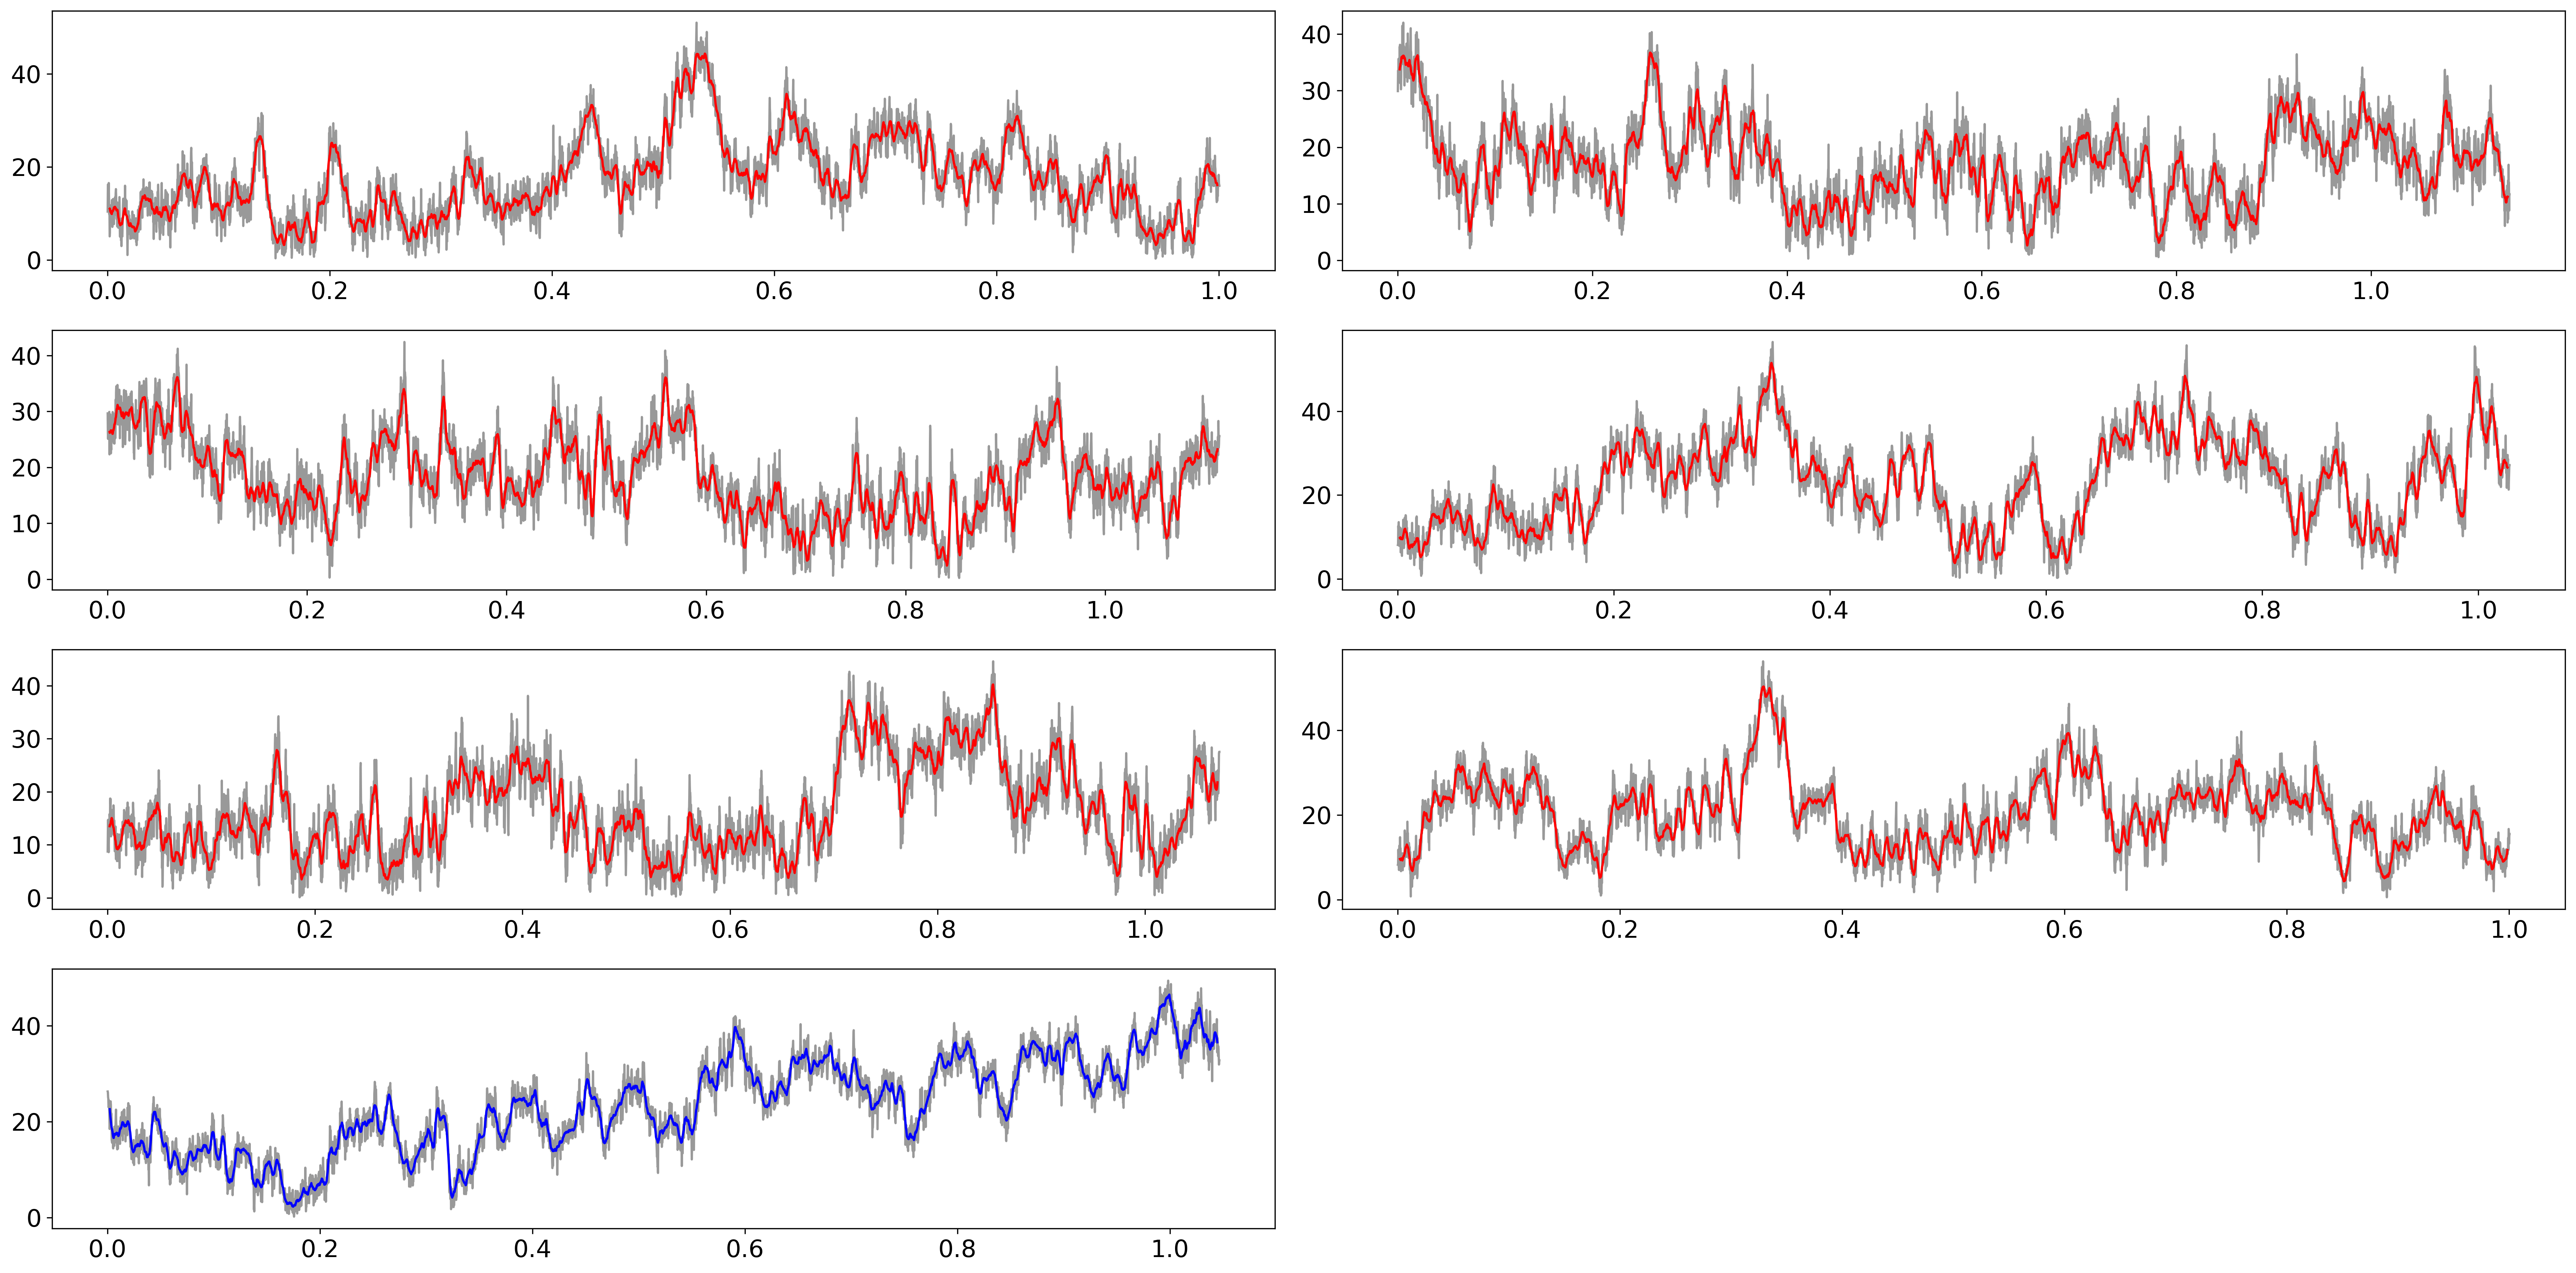

In [37]:
#files

clpcpsr1 = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TMDtilt/CL_PCPS_r1_TMDtilt_200ps.dat'
clpcpsr2 = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TMDtilt/CL_PCPS_r2_TMDtilt_200ps.dat'
clpcpsr3 = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TMDtilt/CL_PCPS_r3_TMDtilt_200ps.dat'
clpc     = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TMDtilt/CL_PC_TMDtilt_200ps.dat'
ncpcps   = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TMDtilt/NC_PCPS_TMDtilt_200ps.dat'
ncpc     = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TMDtilt/NC_PC_TMDtilt_200ps.dat'
tff7pcps = '/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/forMS/angle/TMDtilt/TFF7_PCPS_r1_TMDtilt_200ps.dat'

# Angle
r1_tilt = np.genfromtxt(clpcpsr1, usecols=(0,2))
r1_tilteq = np.genfromtxt(clpcpsr1, usecols=(0,2),skip_header=399)

r2_tilt = np.genfromtxt(clpcpsr2, usecols=(0,2))
r2_tilteq = np.genfromtxt(clpcpsr2, usecols=(0,2),skip_header=399)

r3_tilt = np.genfromtxt(clpcpsr3, usecols=(0,2))
r3_tilteq = np.genfromtxt(clpcpsr3, usecols=(0,2),skip_header=399)

clpc_tilt = np.genfromtxt(clpc, usecols=(0,2))
clpcp_tilteq = np.genfromtxt(clpc, usecols=(0,2),skip_header=399)

ncpc_tilt = np.genfromtxt(ncpc, usecols=(0,2))
ncpc_tilteq = np.genfromtxt(ncpc, usecols=(0,2),skip_header=399)

ncpcps_tilt = np.genfromtxt(ncpcps, usecols=(0,2))
ncpcps_tilteq = np.genfromtxt(ncpcps, usecols=(0,2),skip_header=399)

tff7_tilt = np.genfromtxt(tff7pcps, usecols=(0,2))
tff7_tilteq = np.genfromtxt(tff7pcps, usecols=(0,2),skip_header=399)



#Rolling averages -- time evol
rav_r1_tilt=np.mean(rolling_window(r1_tilt, 20), 1)
rav_r2_tilt=np.mean(rolling_window(r2_tilt, 20), 1)
rav_r3_tilt=np.mean(rolling_window(r3_tilt, 20), 1)

rav_clpc_tilt   = np.mean(rolling_window(clpc_tilt, 20), 1)
rav_ncpc_tilt   = np.mean(rolling_window(ncpc_tilt, 20), 1)
rav_ncpcps_tilt = np.mean(rolling_window(ncpcps_tilt, 20), 1)

rav_tff7_tilt=np.mean(rolling_window(tff7_tilt, 20), 1)
 
plt.figure( figsize = (24,12))
                        
plt.subplot(421)
plt.plot((r1_tilt[:,0]*0.0002),(r1_tilt[:,1]), color='gray', alpha=0.8)
plt.plot((rav_r1_tilt[:,0]*0.0002),(rav_r1_tilt[:,1]), color='red', alpha=1)

plt.subplot(422)
plt.plot((r2_tilt[:,0]*0.0002),(r2_tilt[:,1]), color='gray', alpha=0.8)
plt.plot((rav_r2_tilt[:,0]*0.0002),(rav_r2_tilt[:,1]), color='red', alpha=1)

plt.subplot(423)
plt.plot((r3_tilt[:,0]*0.0002),(r3_tilt[:,1]), color='gray', alpha=0.8)
plt.plot((rav_r3_tilt[:,0]*0.0002),(rav_r3_tilt[:,1]), color='red', alpha=1)

plt.subplot(424)
plt.plot((clpc_tilt[:,0]*0.0002),(clpc_tilt[:,1]), color='gray', alpha=0.8)
plt.plot((rav_clpc_tilt[:,0]*0.0002),(rav_clpc_tilt[:,1]), color='red', alpha=1)

plt.subplot(425)
plt.plot((ncpc_tilt[:,0]*0.0002),(ncpc_tilt[:,1]), color='gray', alpha=0.8)
plt.plot((rav_ncpc_tilt[:,0]*0.0002),(rav_ncpc_tilt[:,1]), color='red', alpha=1)

plt.subplot(426)
plt.plot((ncpcps_tilt[:,0]*0.0002),(ncpcps_tilt[:,1]), color='gray', alpha=0.8)
plt.plot((rav_ncpcps_tilt[:,0]*0.0002),(rav_ncpcps_tilt[:,1]), color='red', alpha=1)

plt.subplot(427)
plt.plot((tff7_tilt[:,0]*0.0002),(tff7_tilt[:,1]), color='gray', alpha=0.8)
plt.plot((rav_tff7_tilt[:,0]*0.0002),(rav_tff7_tilt[:,1]), color='blue', alpha=1)


#plt.subplot(122)
#sns.distplot((r1_tilteq[:,1]), bins=20, hist = True, kde = True, kde_kws = {'linewidth': 3}, color='orange')
#plt.xlabel('F7 AS - memb dist. (Å)')
#plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
#plt.xlim([40, 150])
#plt.ylim([0, 0.07])

plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()



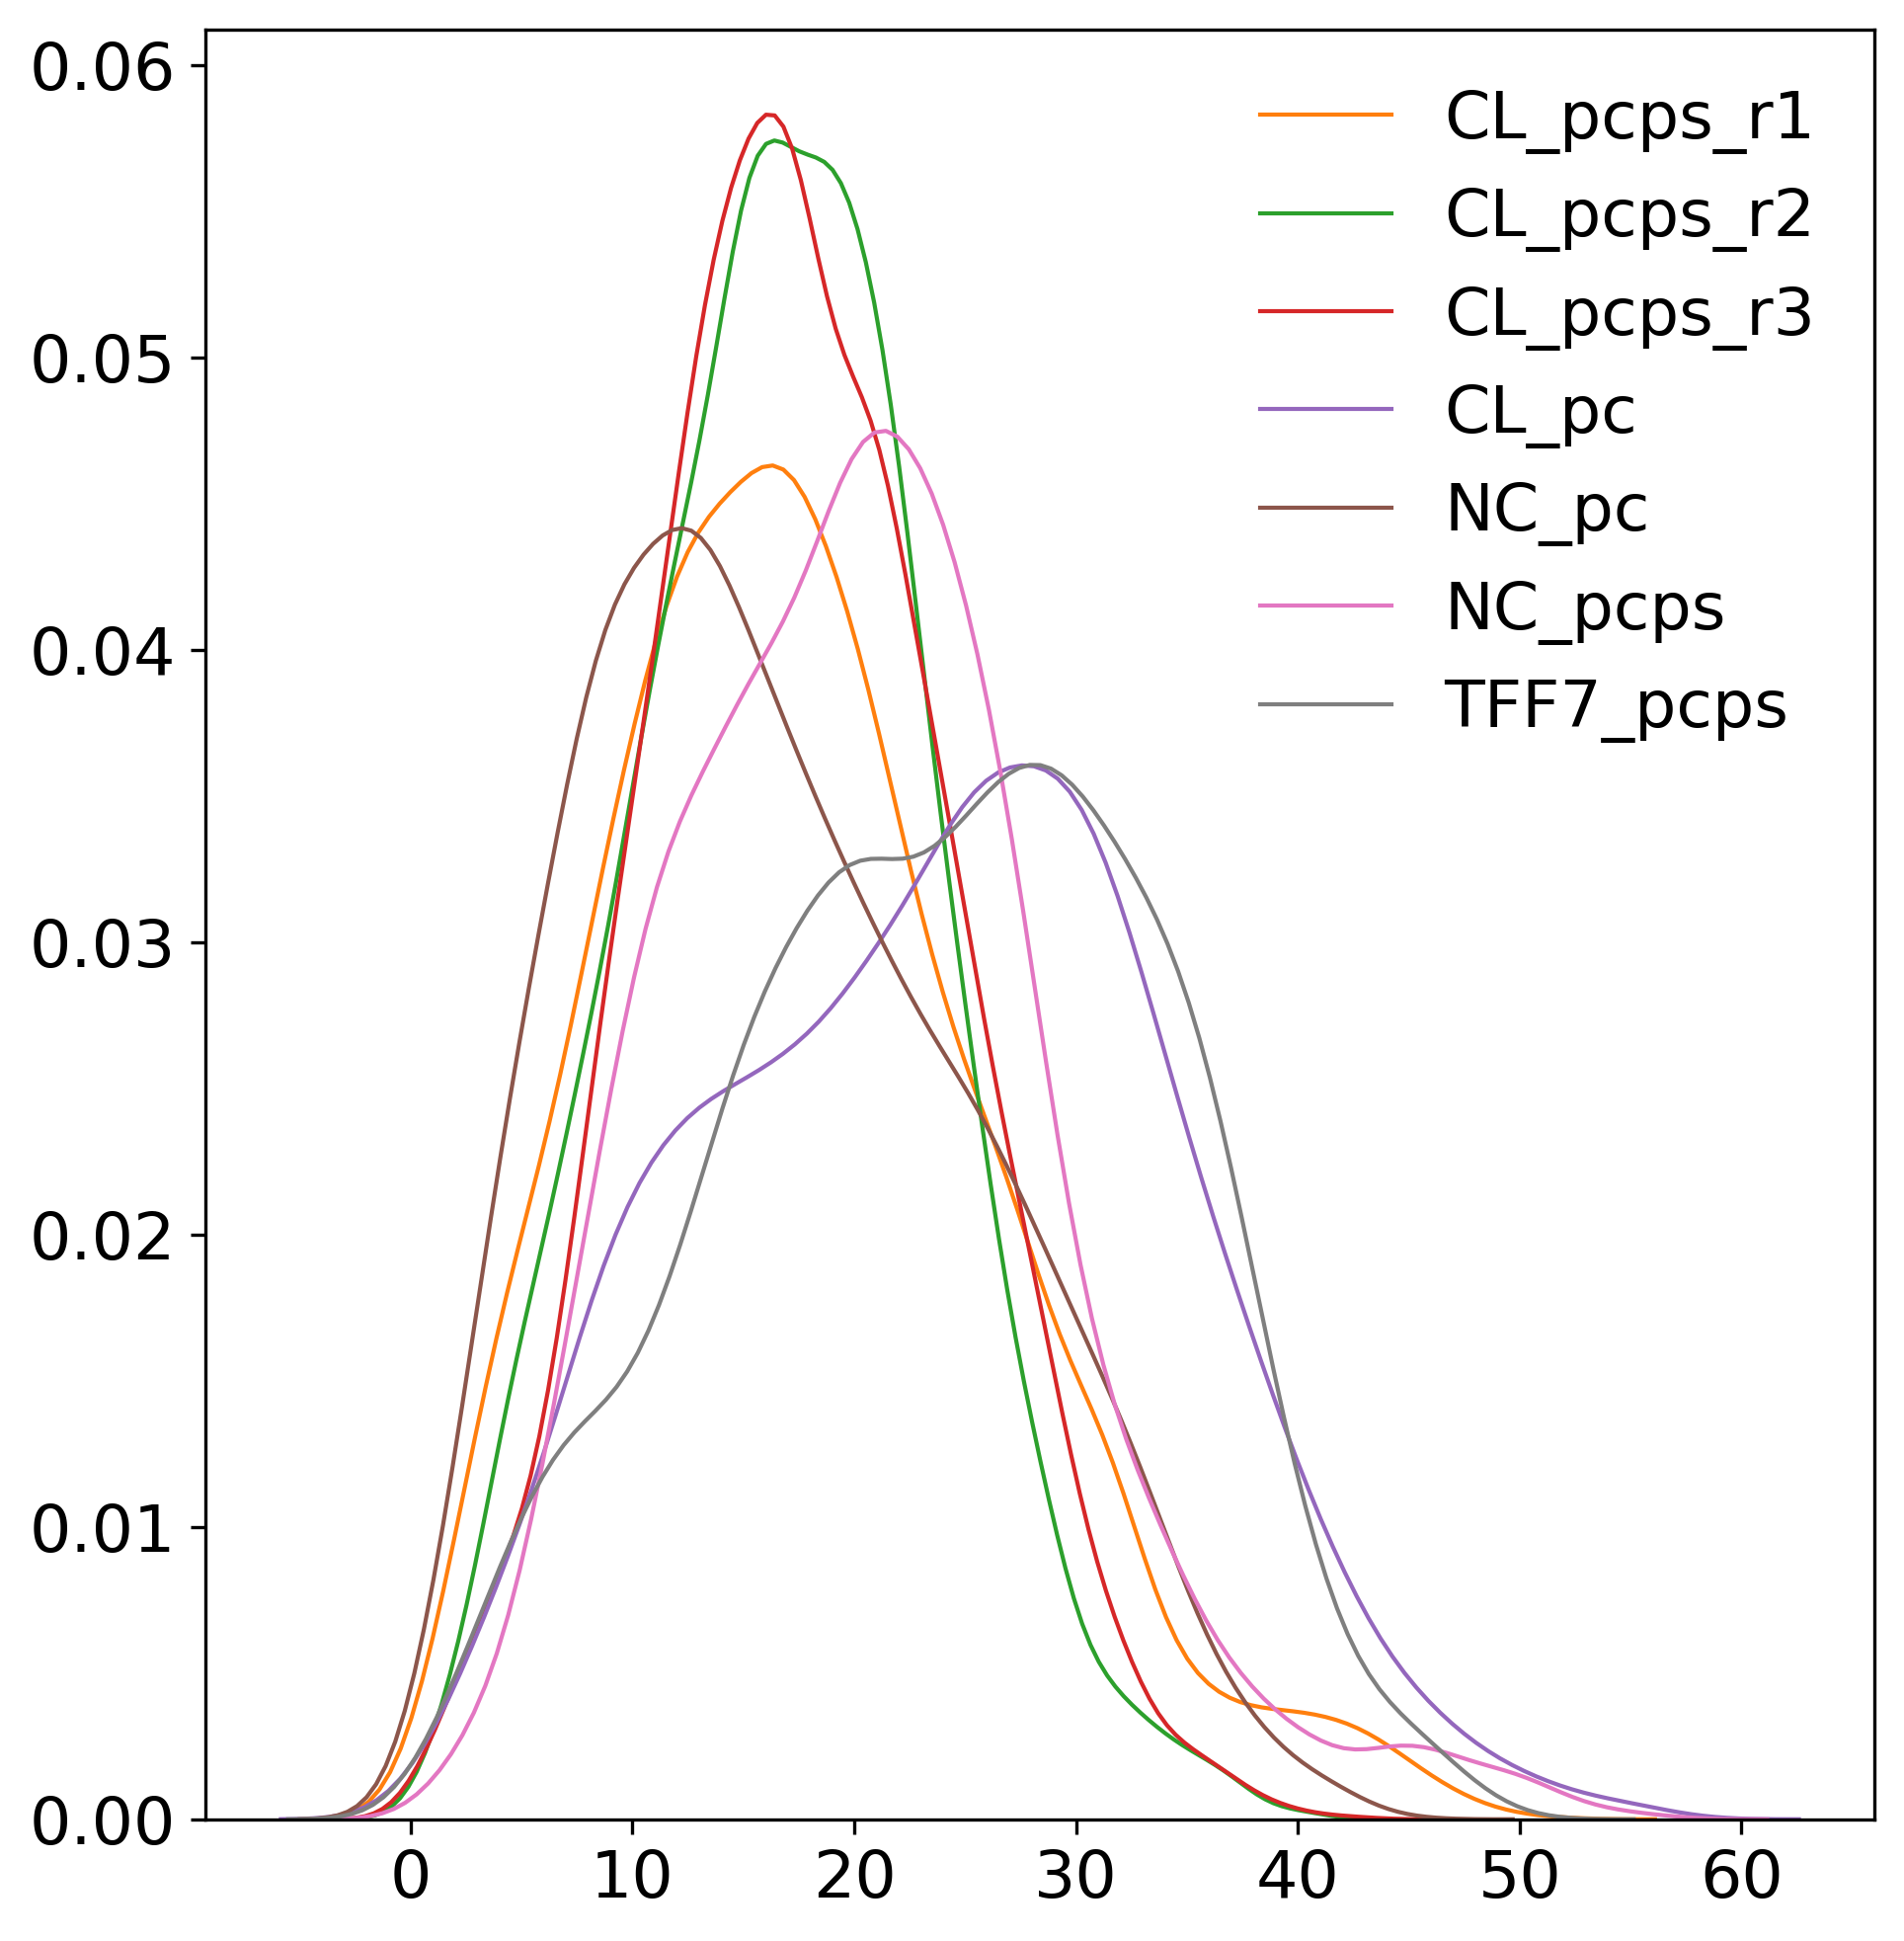

In [47]:
plt.figure( figsize = (16,8))

plt.subplot(122)
sns.distplot((r1_tilteq[:,1]), bins=20,    hist = False, kde = True, kde_kws = {'linewidth': 1}    , color='C1',label='CL_pcps_r1')
sns.distplot((r2_tilteq[:,1]), bins=20,    hist = False, kde = True, kde_kws = {'linewidth': 1}    , color='C2',label='CL_pcps_r2')
sns.distplot((r3_tilteq[:,1]), bins=20,    hist = False, kde = True, kde_kws = {'linewidth': 1}    , color='C3',label='CL_pcps_r3')
sns.distplot((clpcp_tilteq[:,1]), bins=20, hist = False, kde = True, kde_kws = {'linewidth': 1} , color='C4',label='CL_pc')
sns.distplot((ncpc_tilteq[:,1]), bins=20,  hist = False, kde = True, kde_kws = {'linewidth': 1}  , color='C5',label='NC_pc')
sns.distplot((ncpcps_tilteq[:,1]), bins=20,hist = False, kde = True, kde_kws = {'linewidth': 1}, color='C6',label='NC_pcps')
sns.distplot((tff7_tilteq[:,1]), bins=20,  hist = False, kde = True, kde_kws = {'linewidth': 1}  , color='C7',label='TFF7_pcps')

plt.legend(loc='best', frameon = False)
#plt.xlabel('F7 AS - memb dist. (Å)')
#plt.ylabel('Probability density')
#plt.title('FVIIa-TF - PCPS (0.5 µs)')
#plt.xlim([40, 150])
#plt.ylim([0, 0.07])
#plt.tight_layout()  
#plt.savefig("/media/4TB_HDD/raul/projects/synergy/TF_EC_TMD/AA/w_SSbs/results/figs/FVIIac_TFcl1us_angles_Oct2020.pdf", dpi=300)
plt.show()

CLpcps_R1
18.53759675771097 2.817602159465058


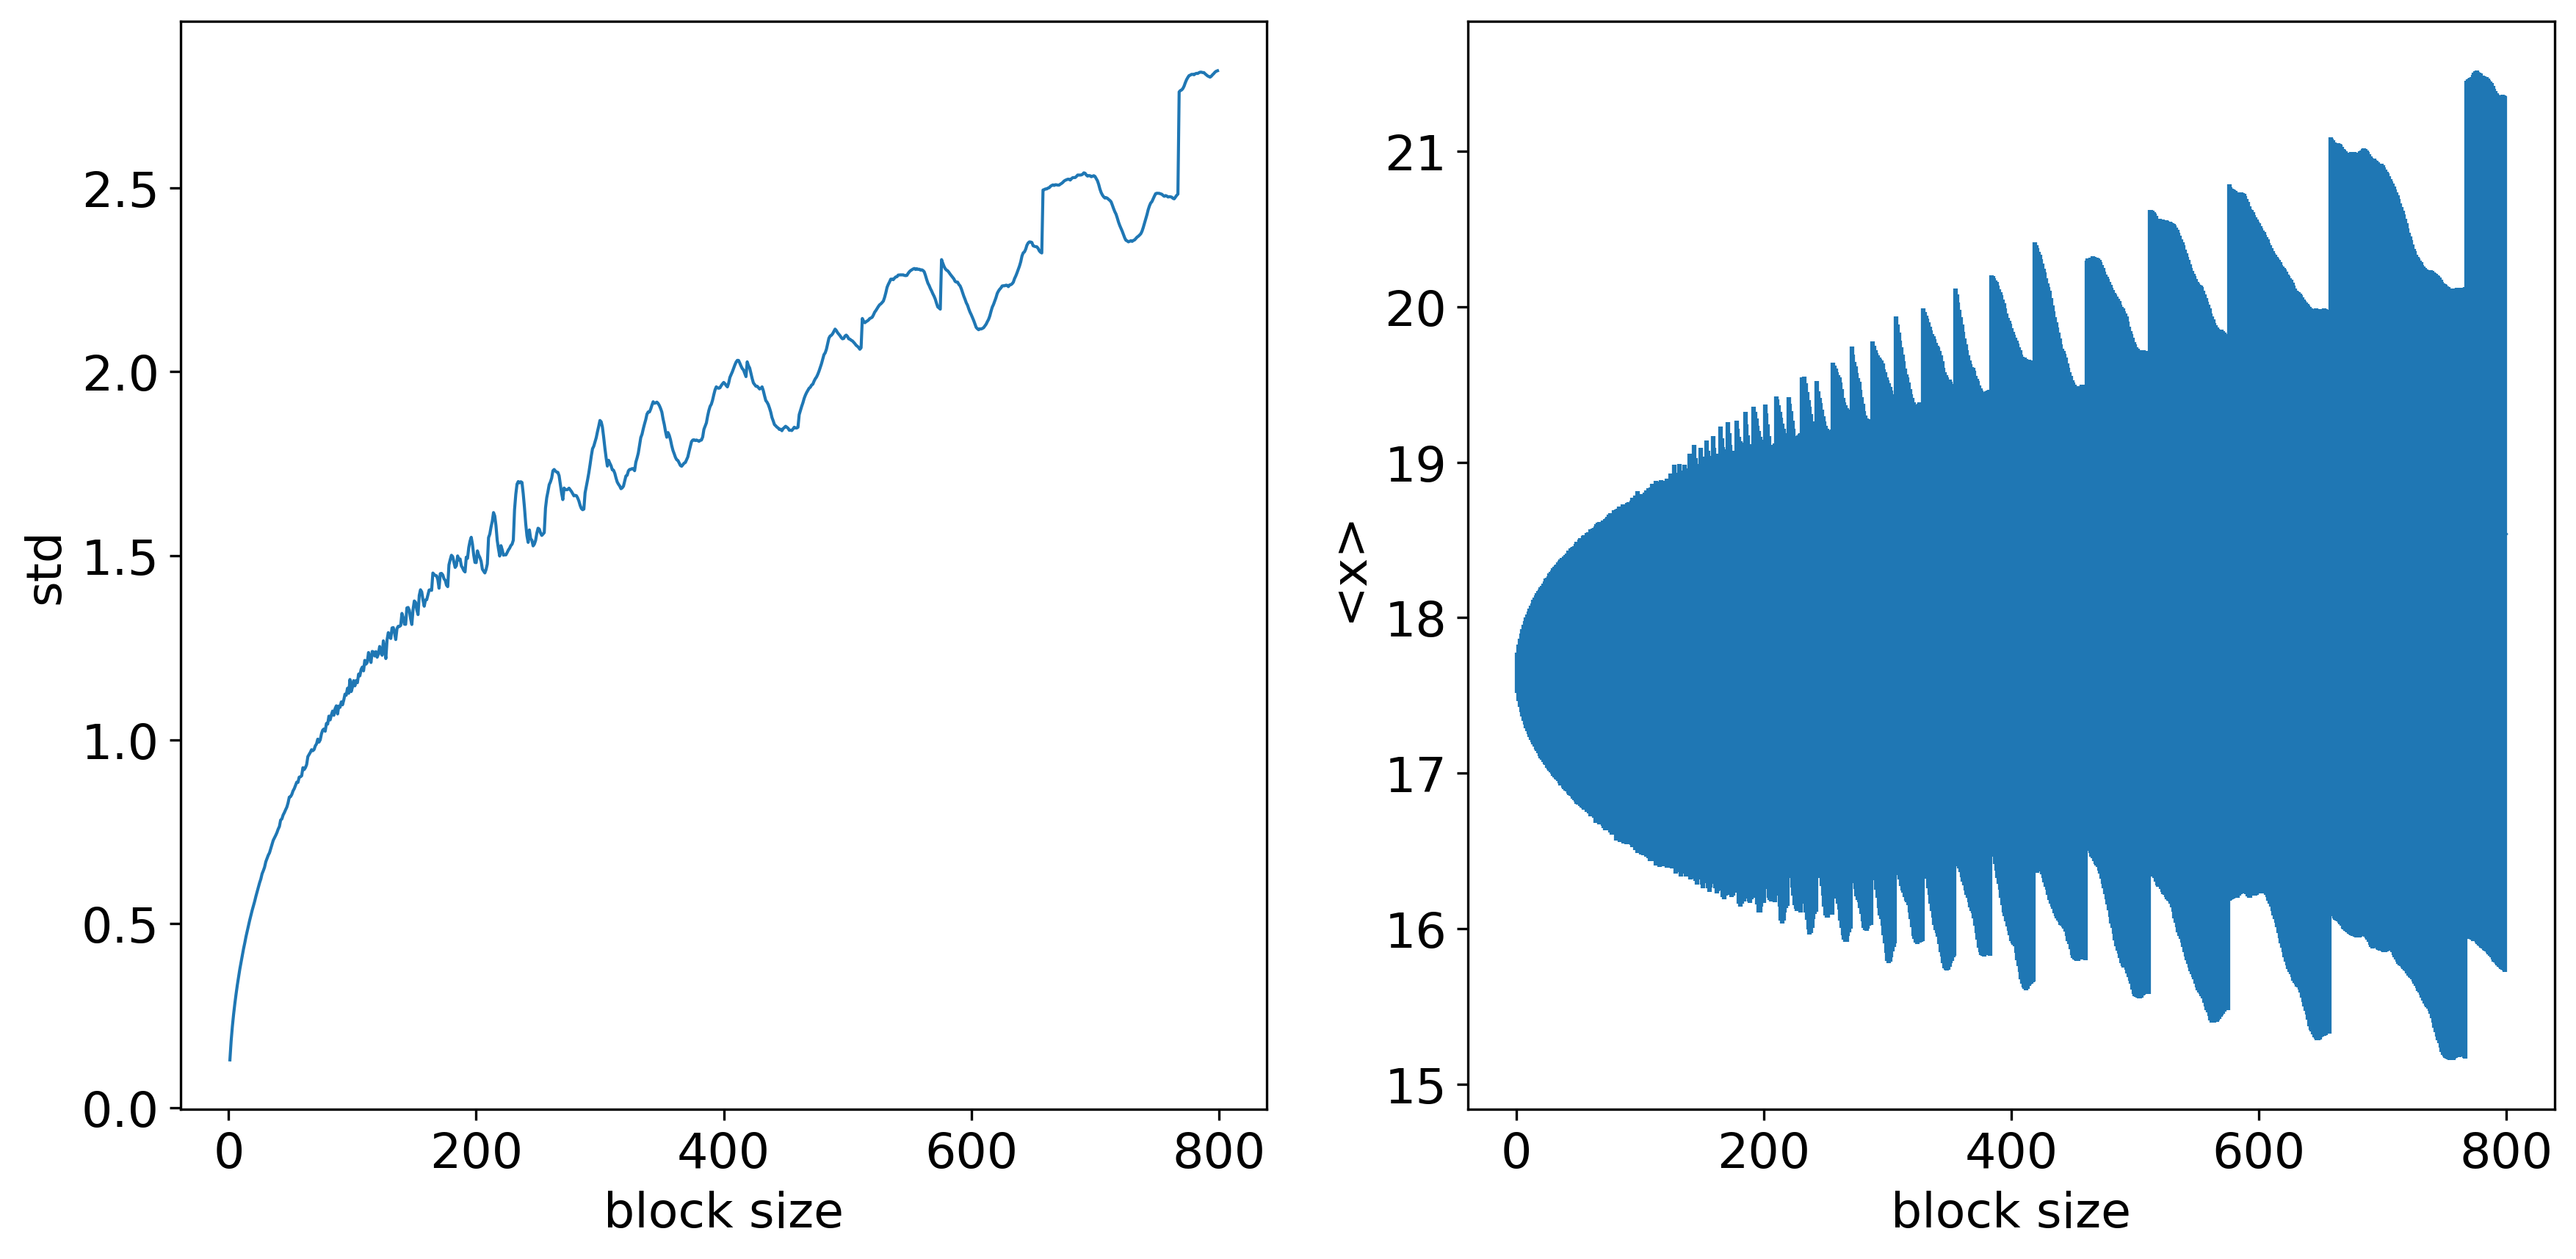

CLpcps_R2
16.701887764066647 1.775880924946668


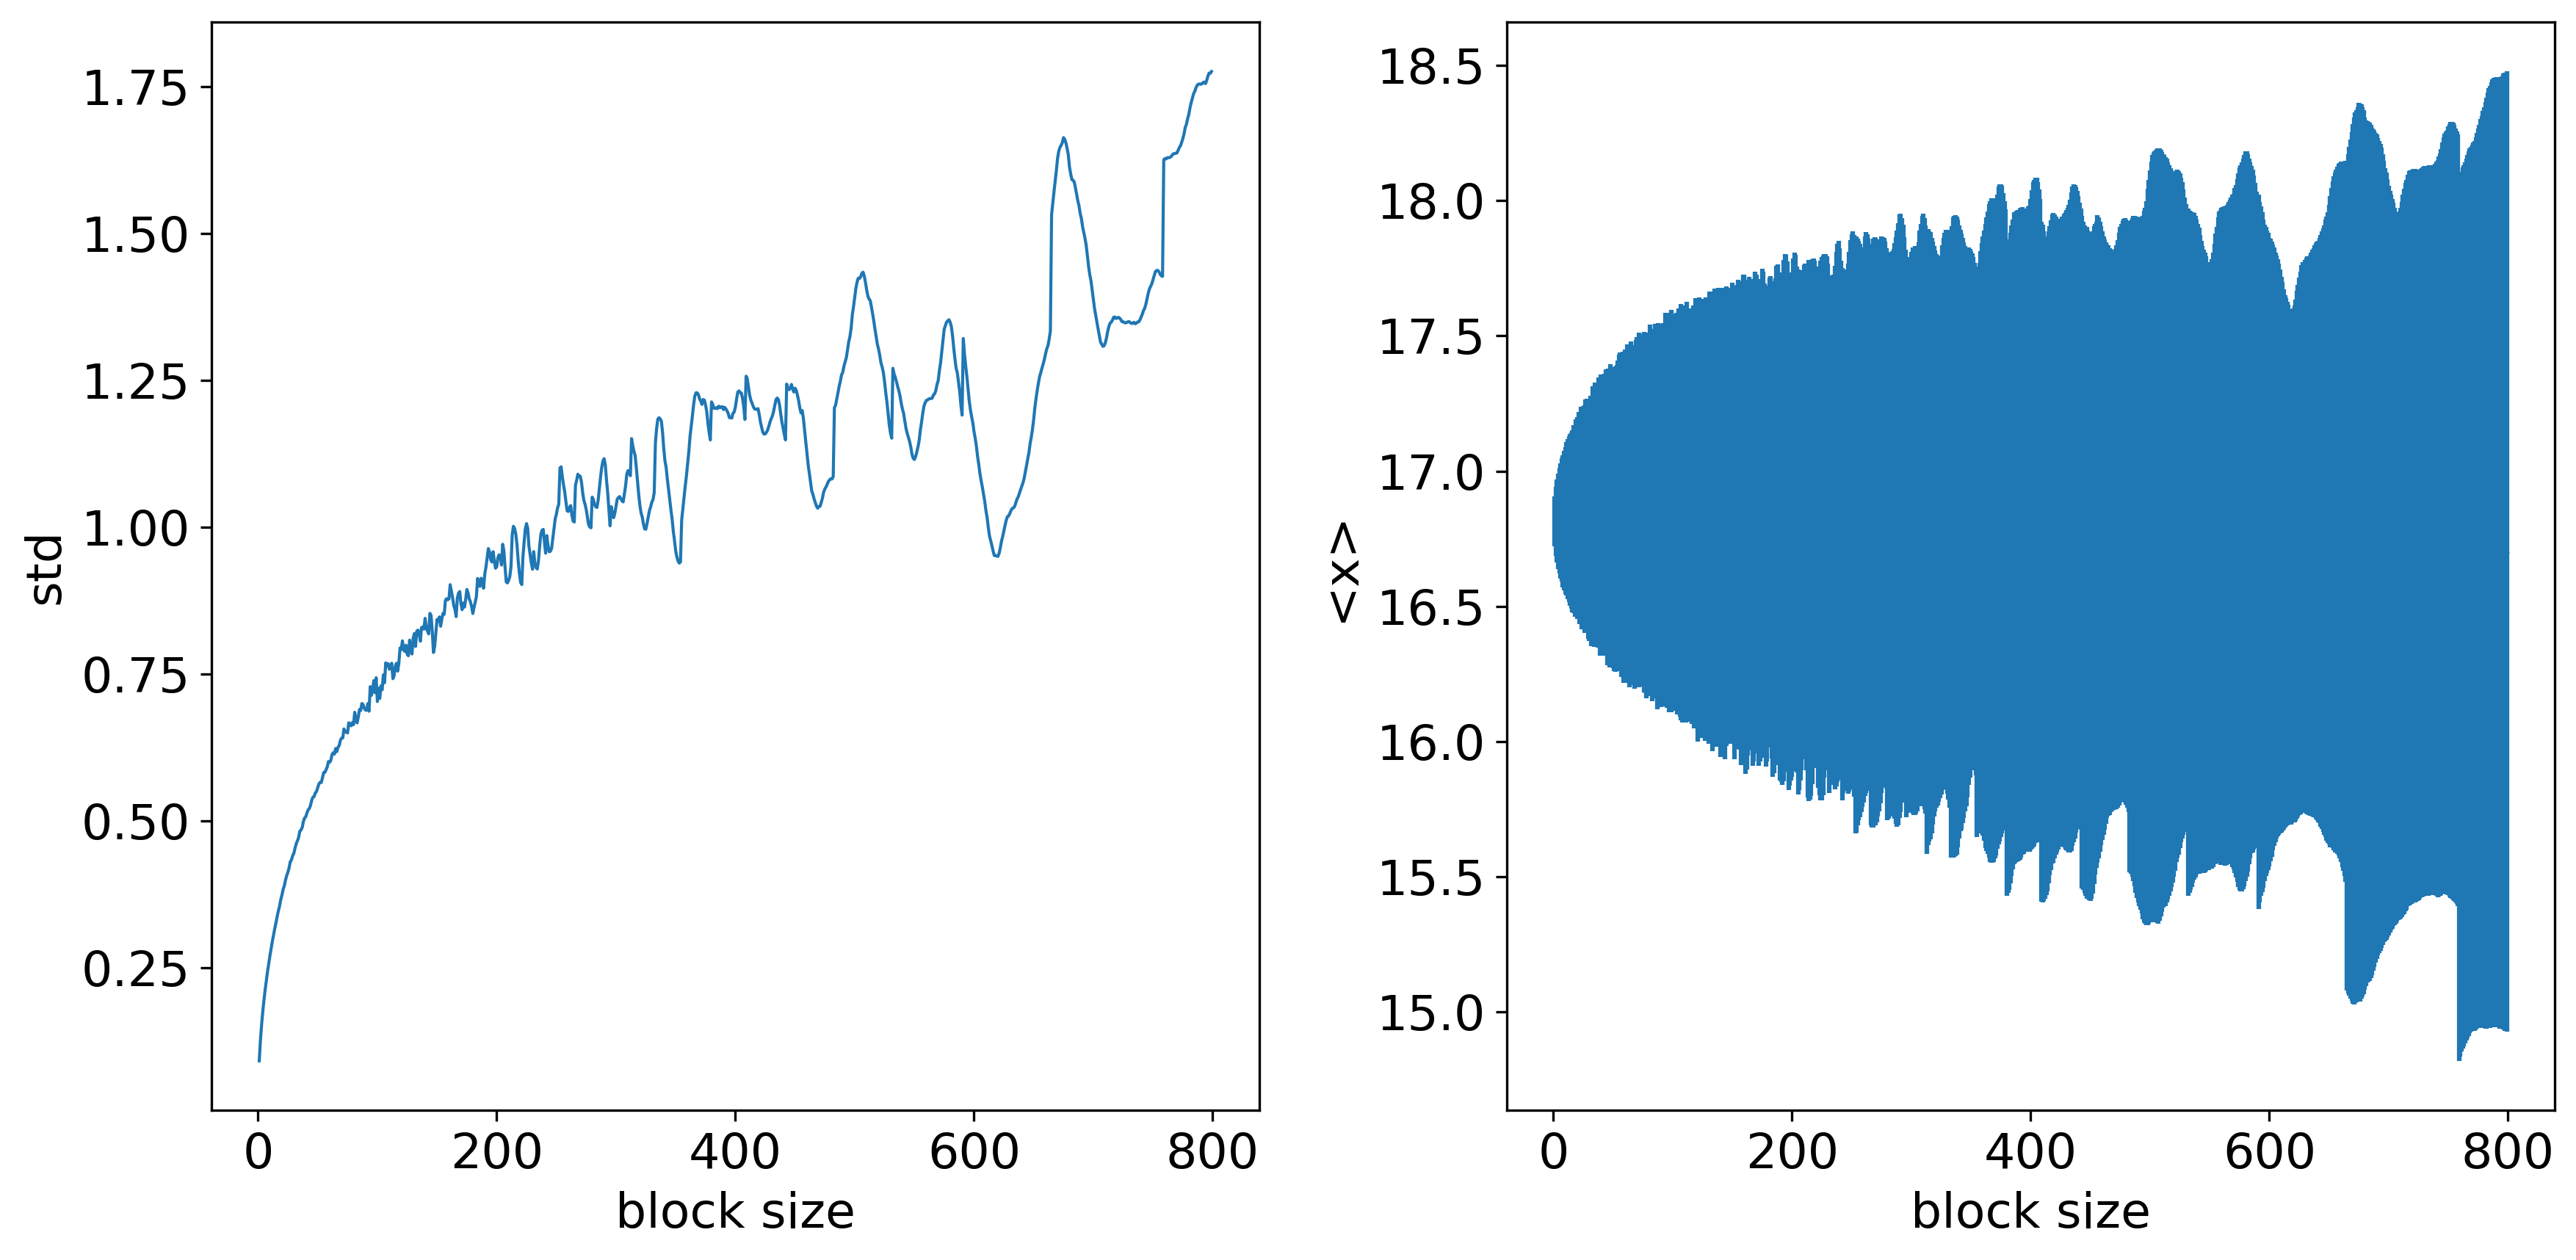

CLpcps R3
17.363856370133167 1.450167119762877


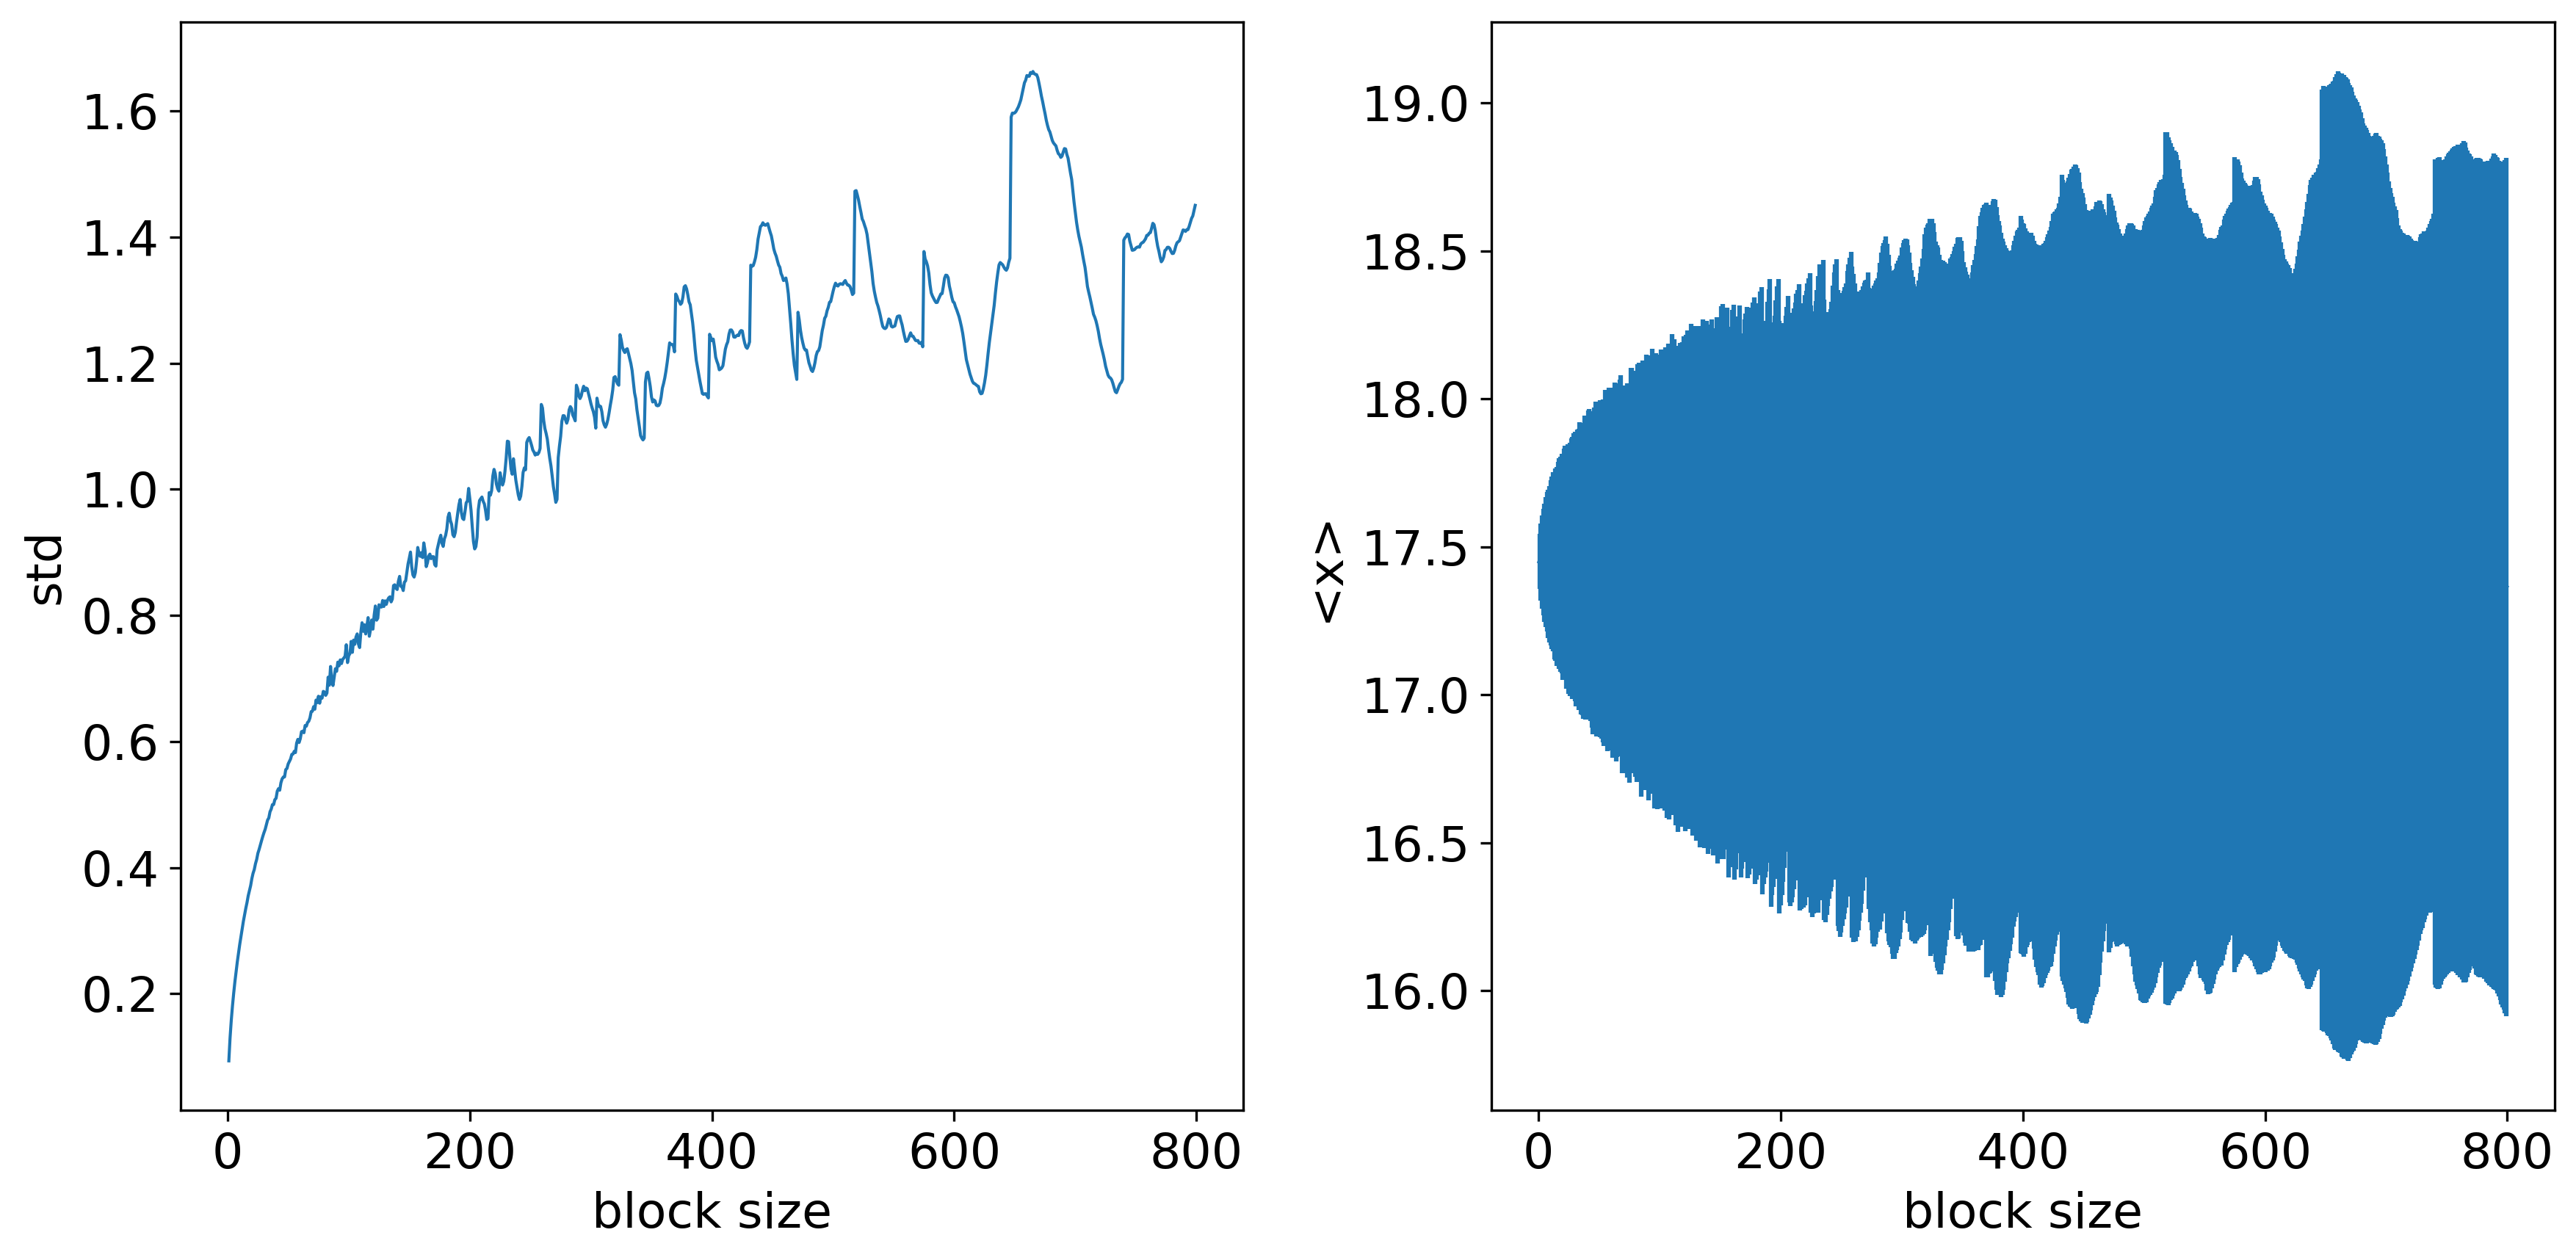

CLpc
24.11871337105216 2.451767174355197


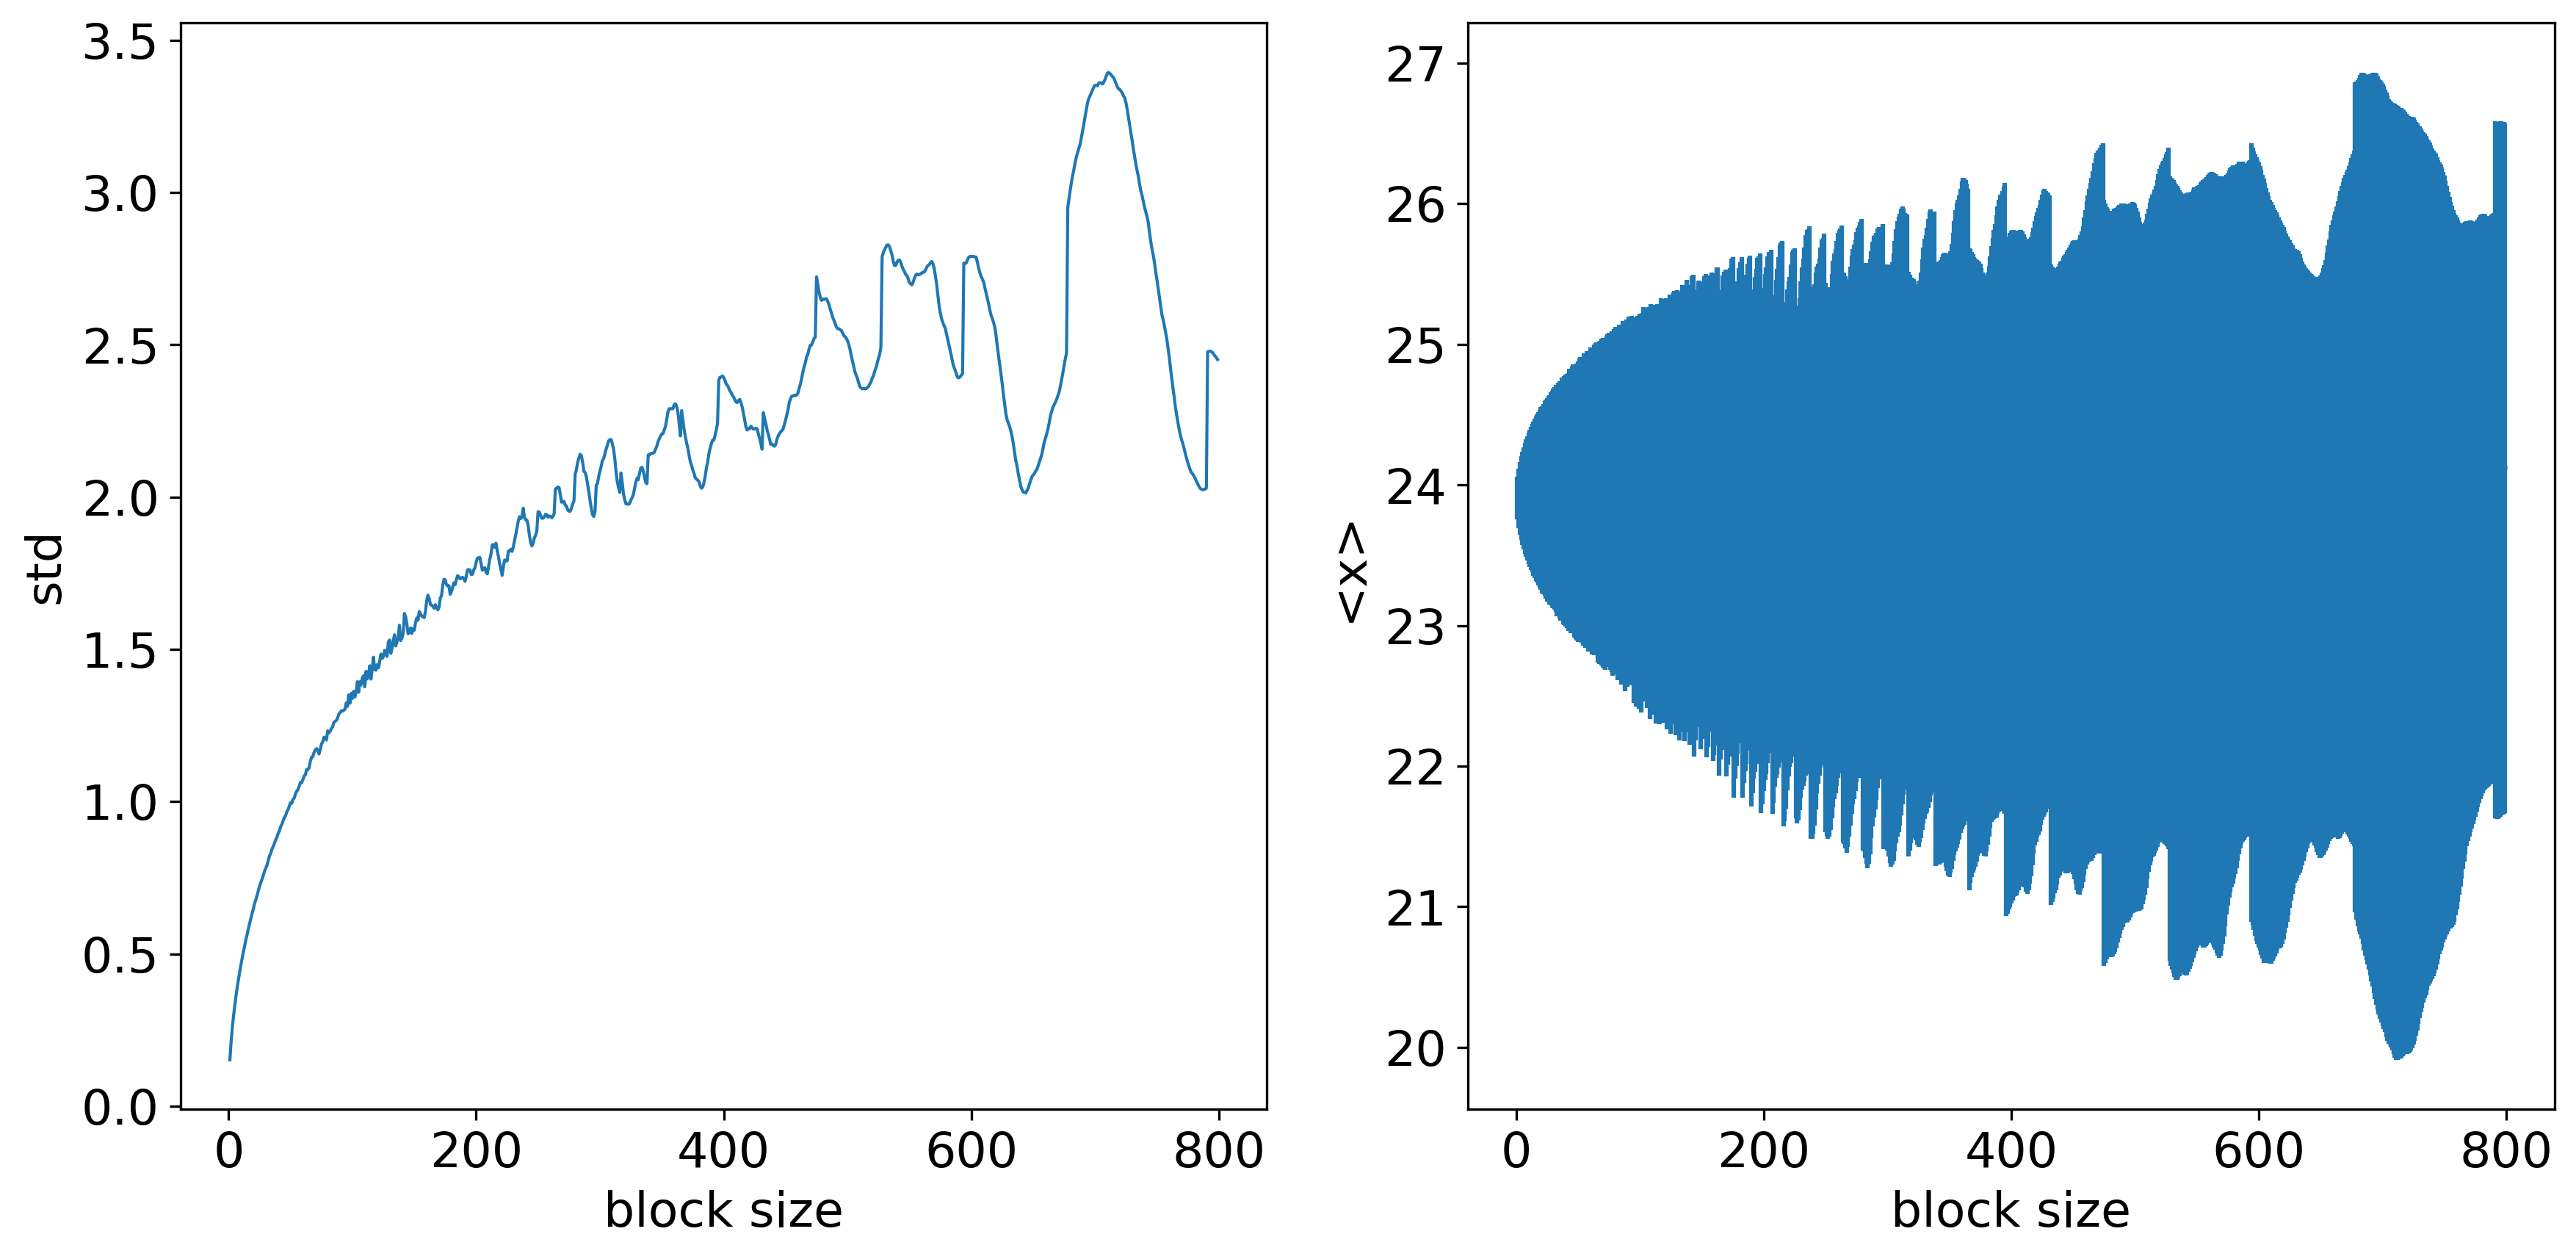

NCpc
16.47391552095186 2.4437449166557843


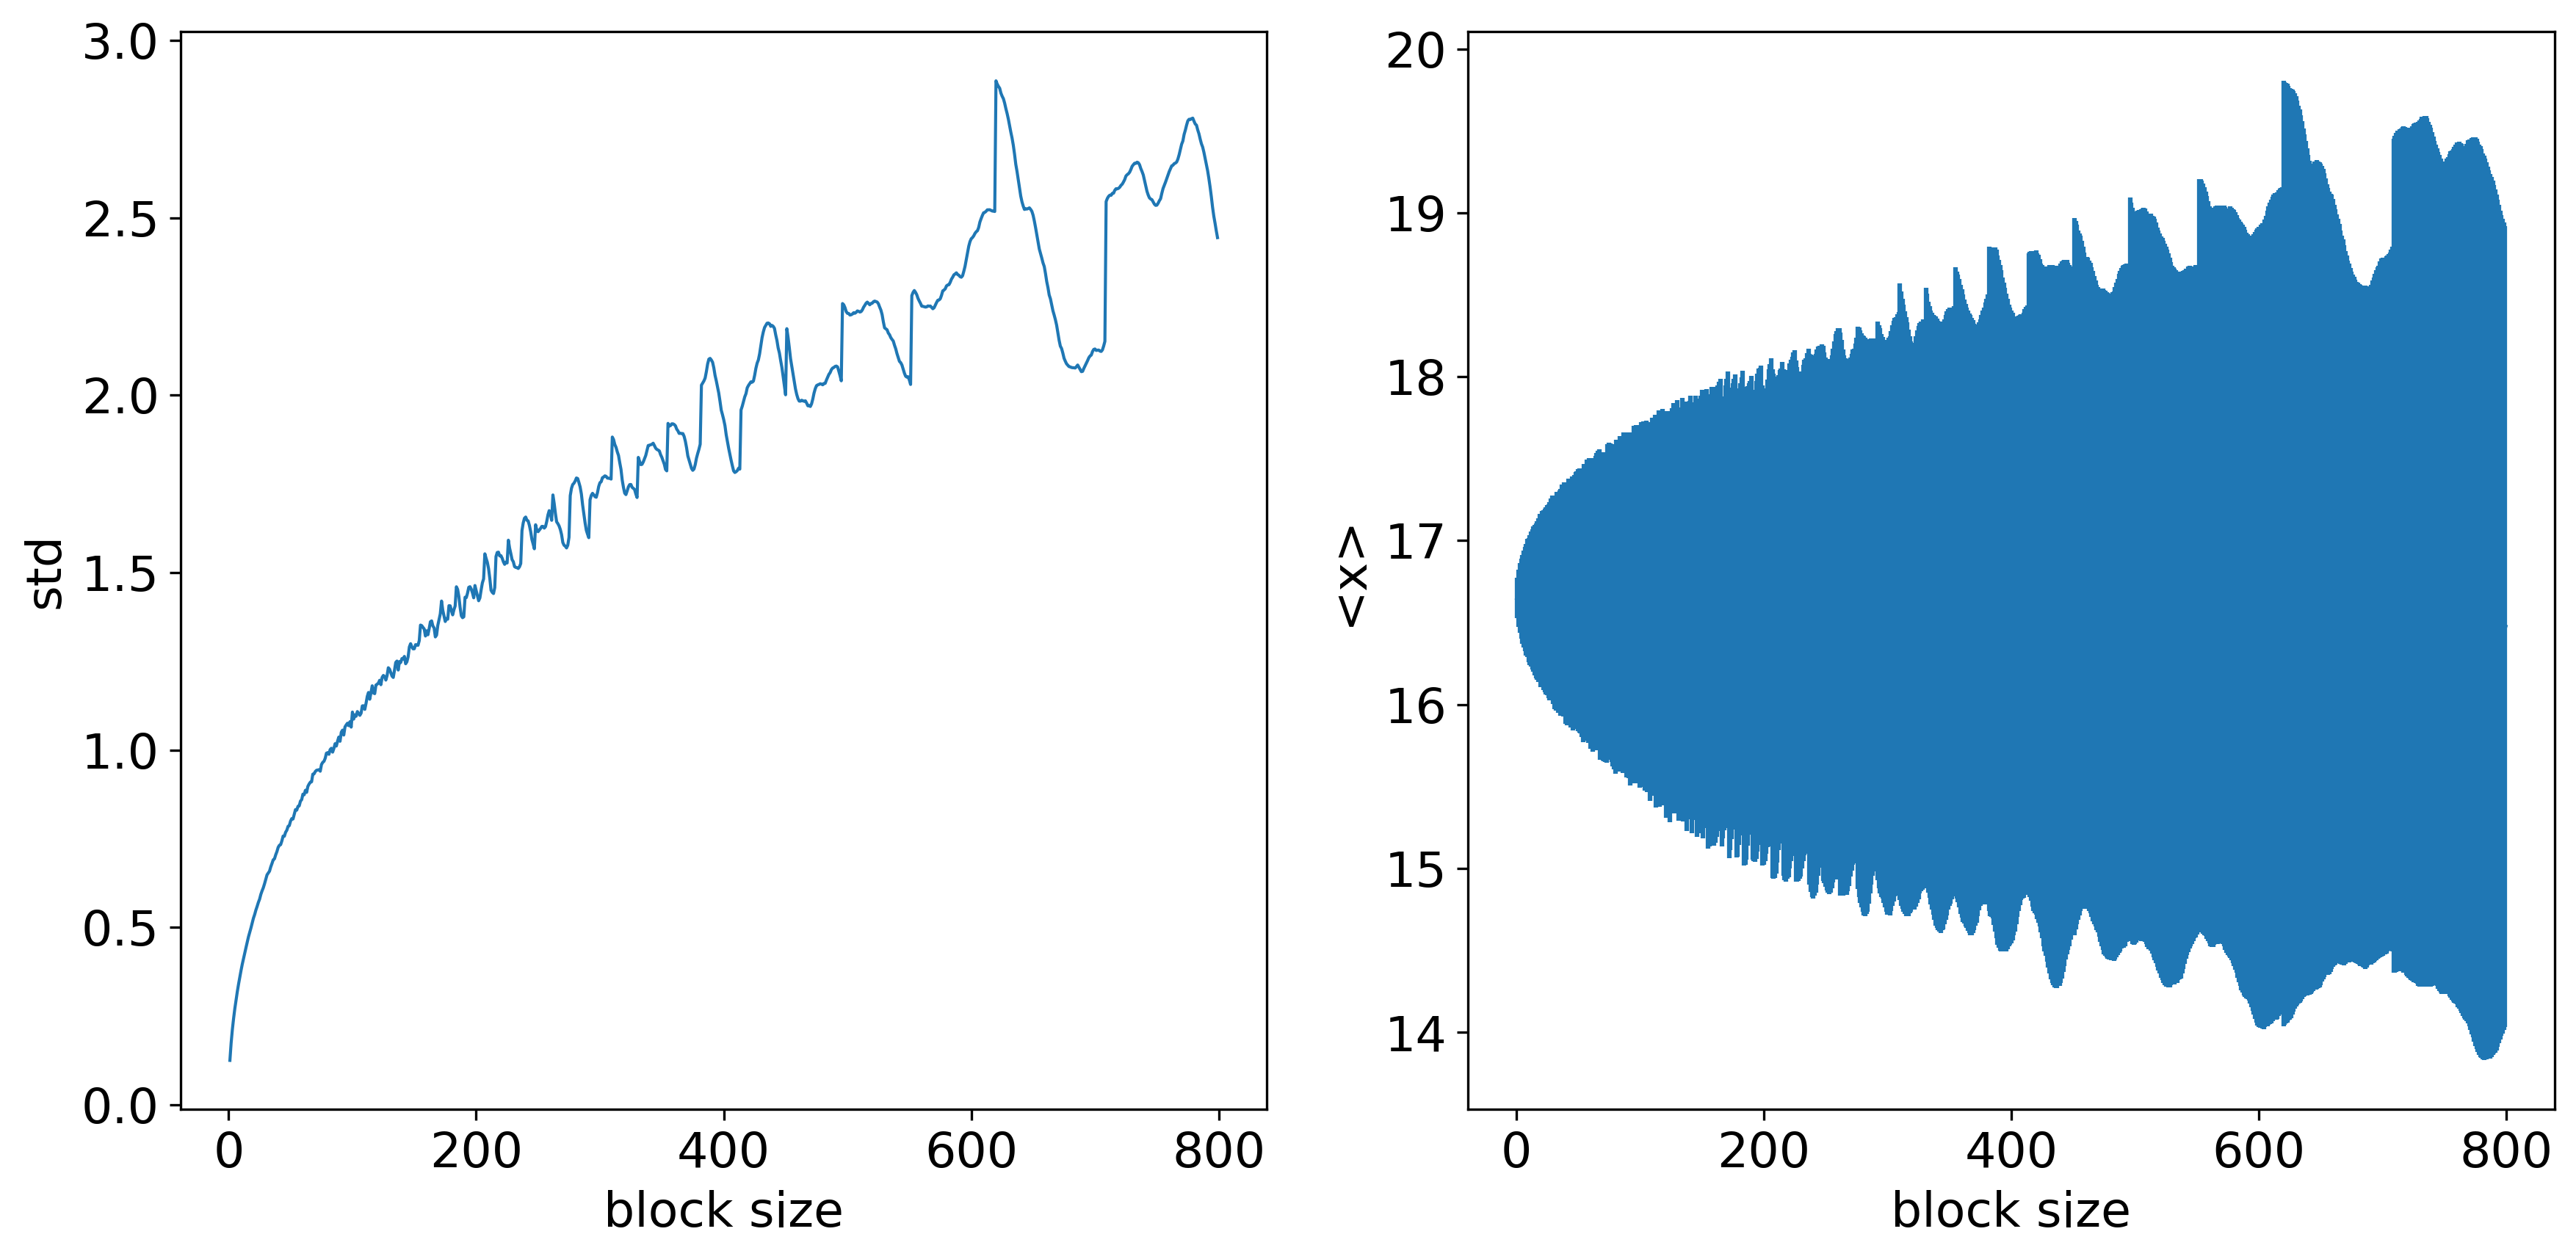

NCpcps
21.23957303426474 2.1618051184590485


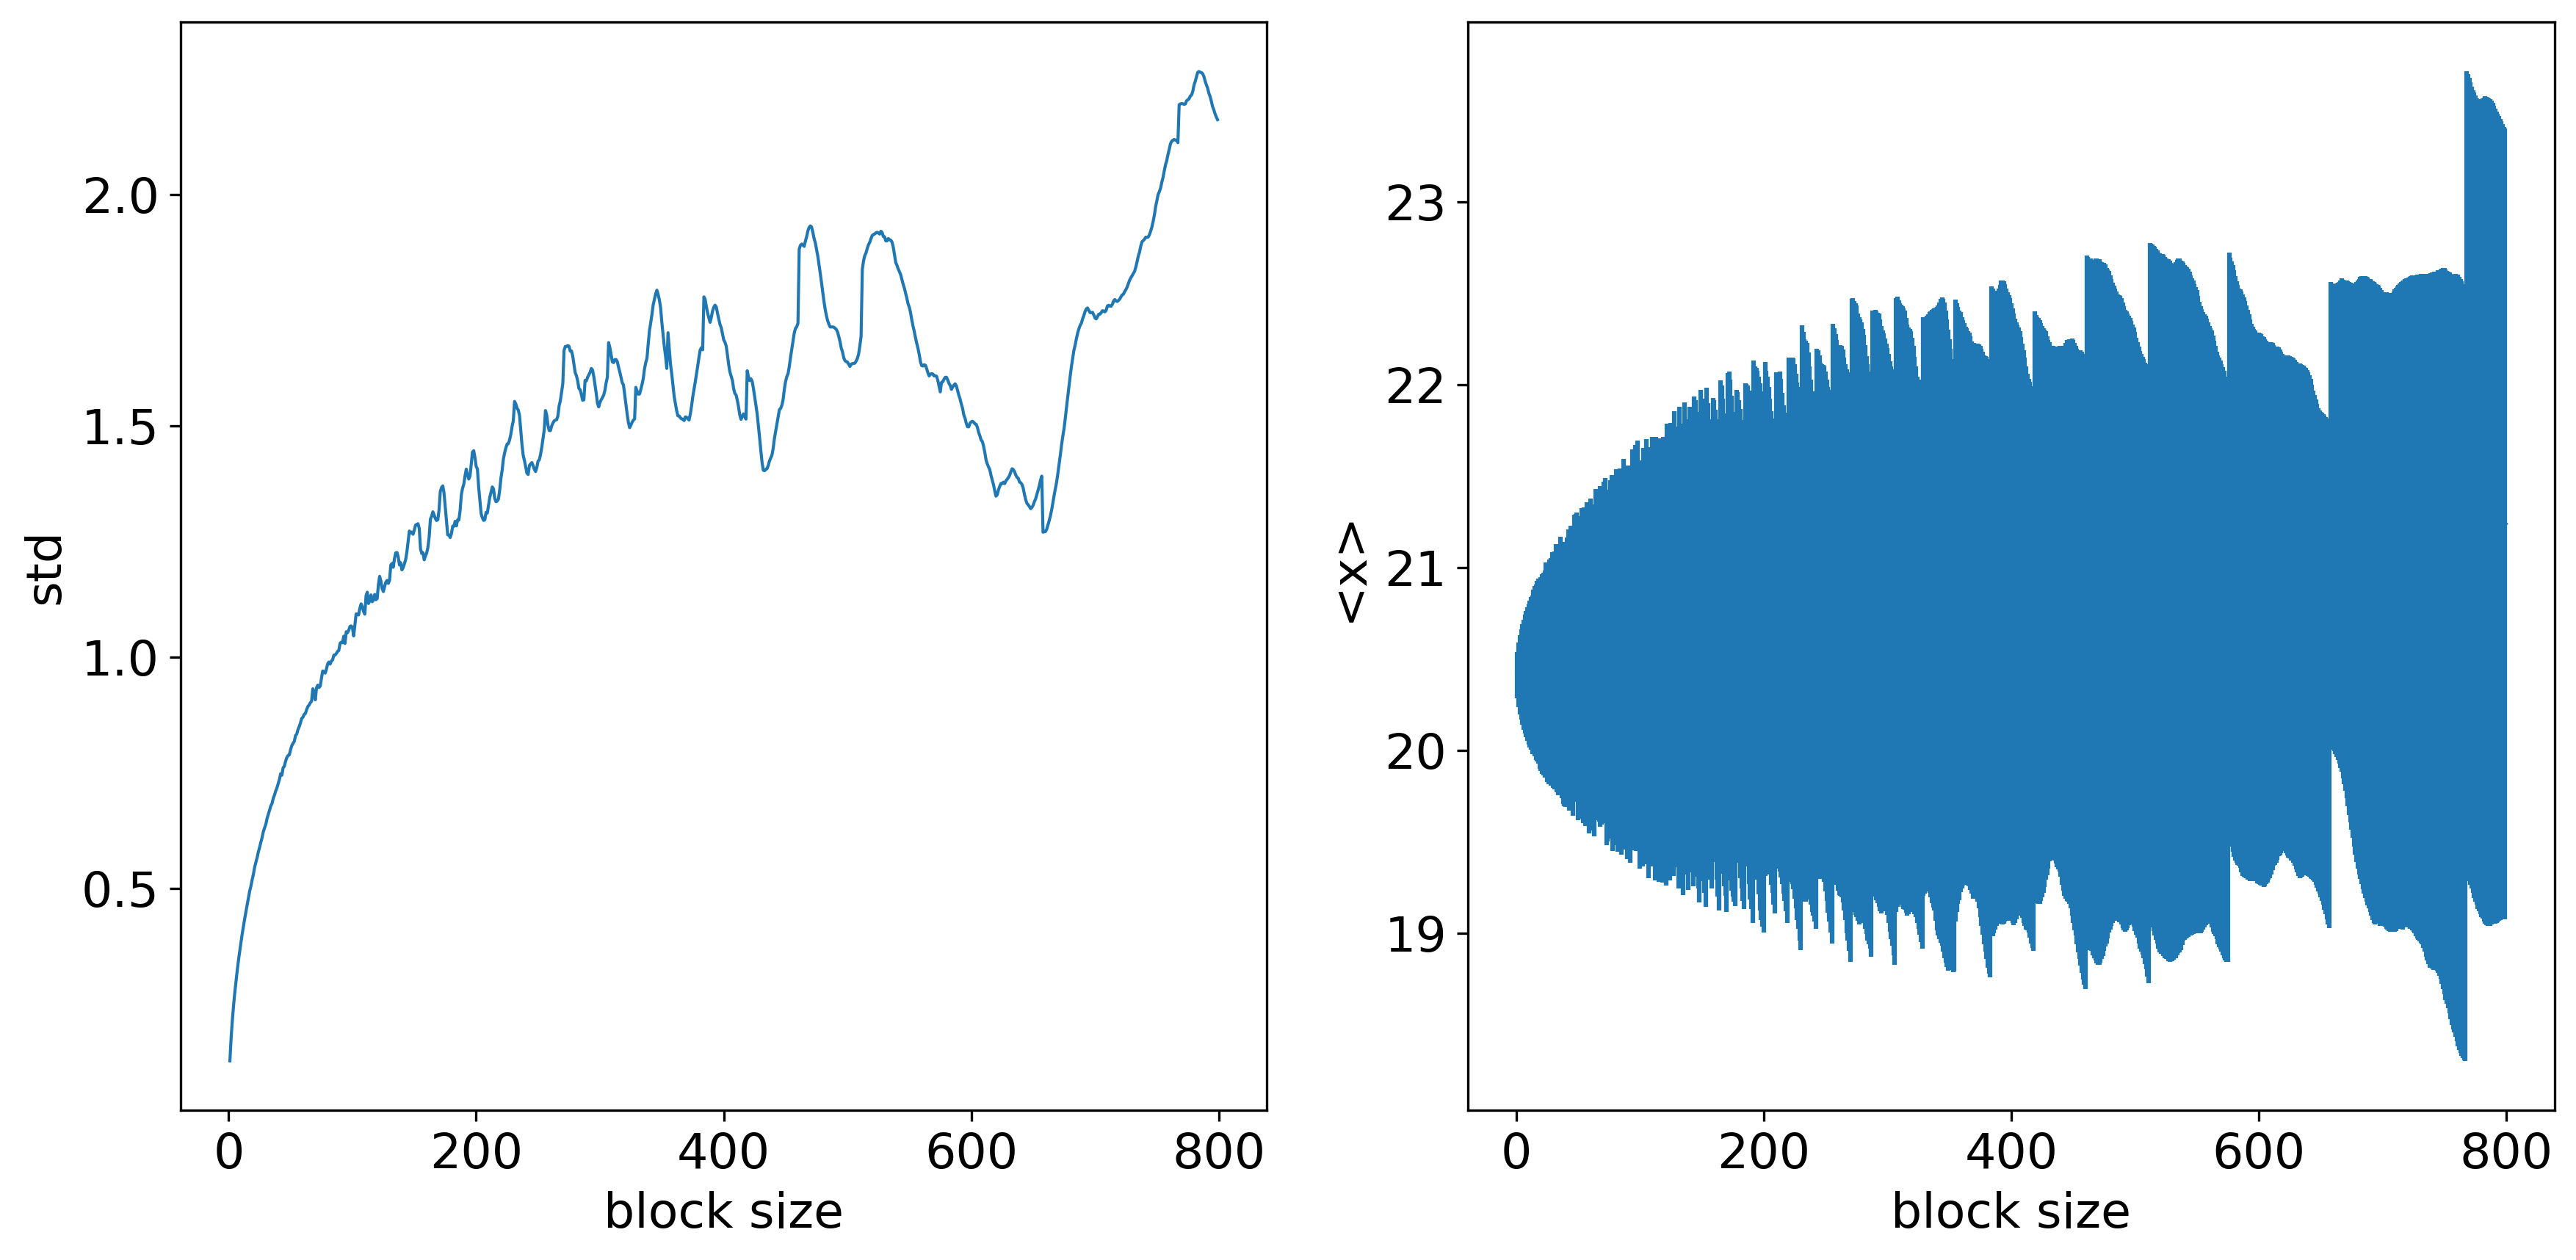

TFF7pcps
23.86764863303919 3.684439482571505


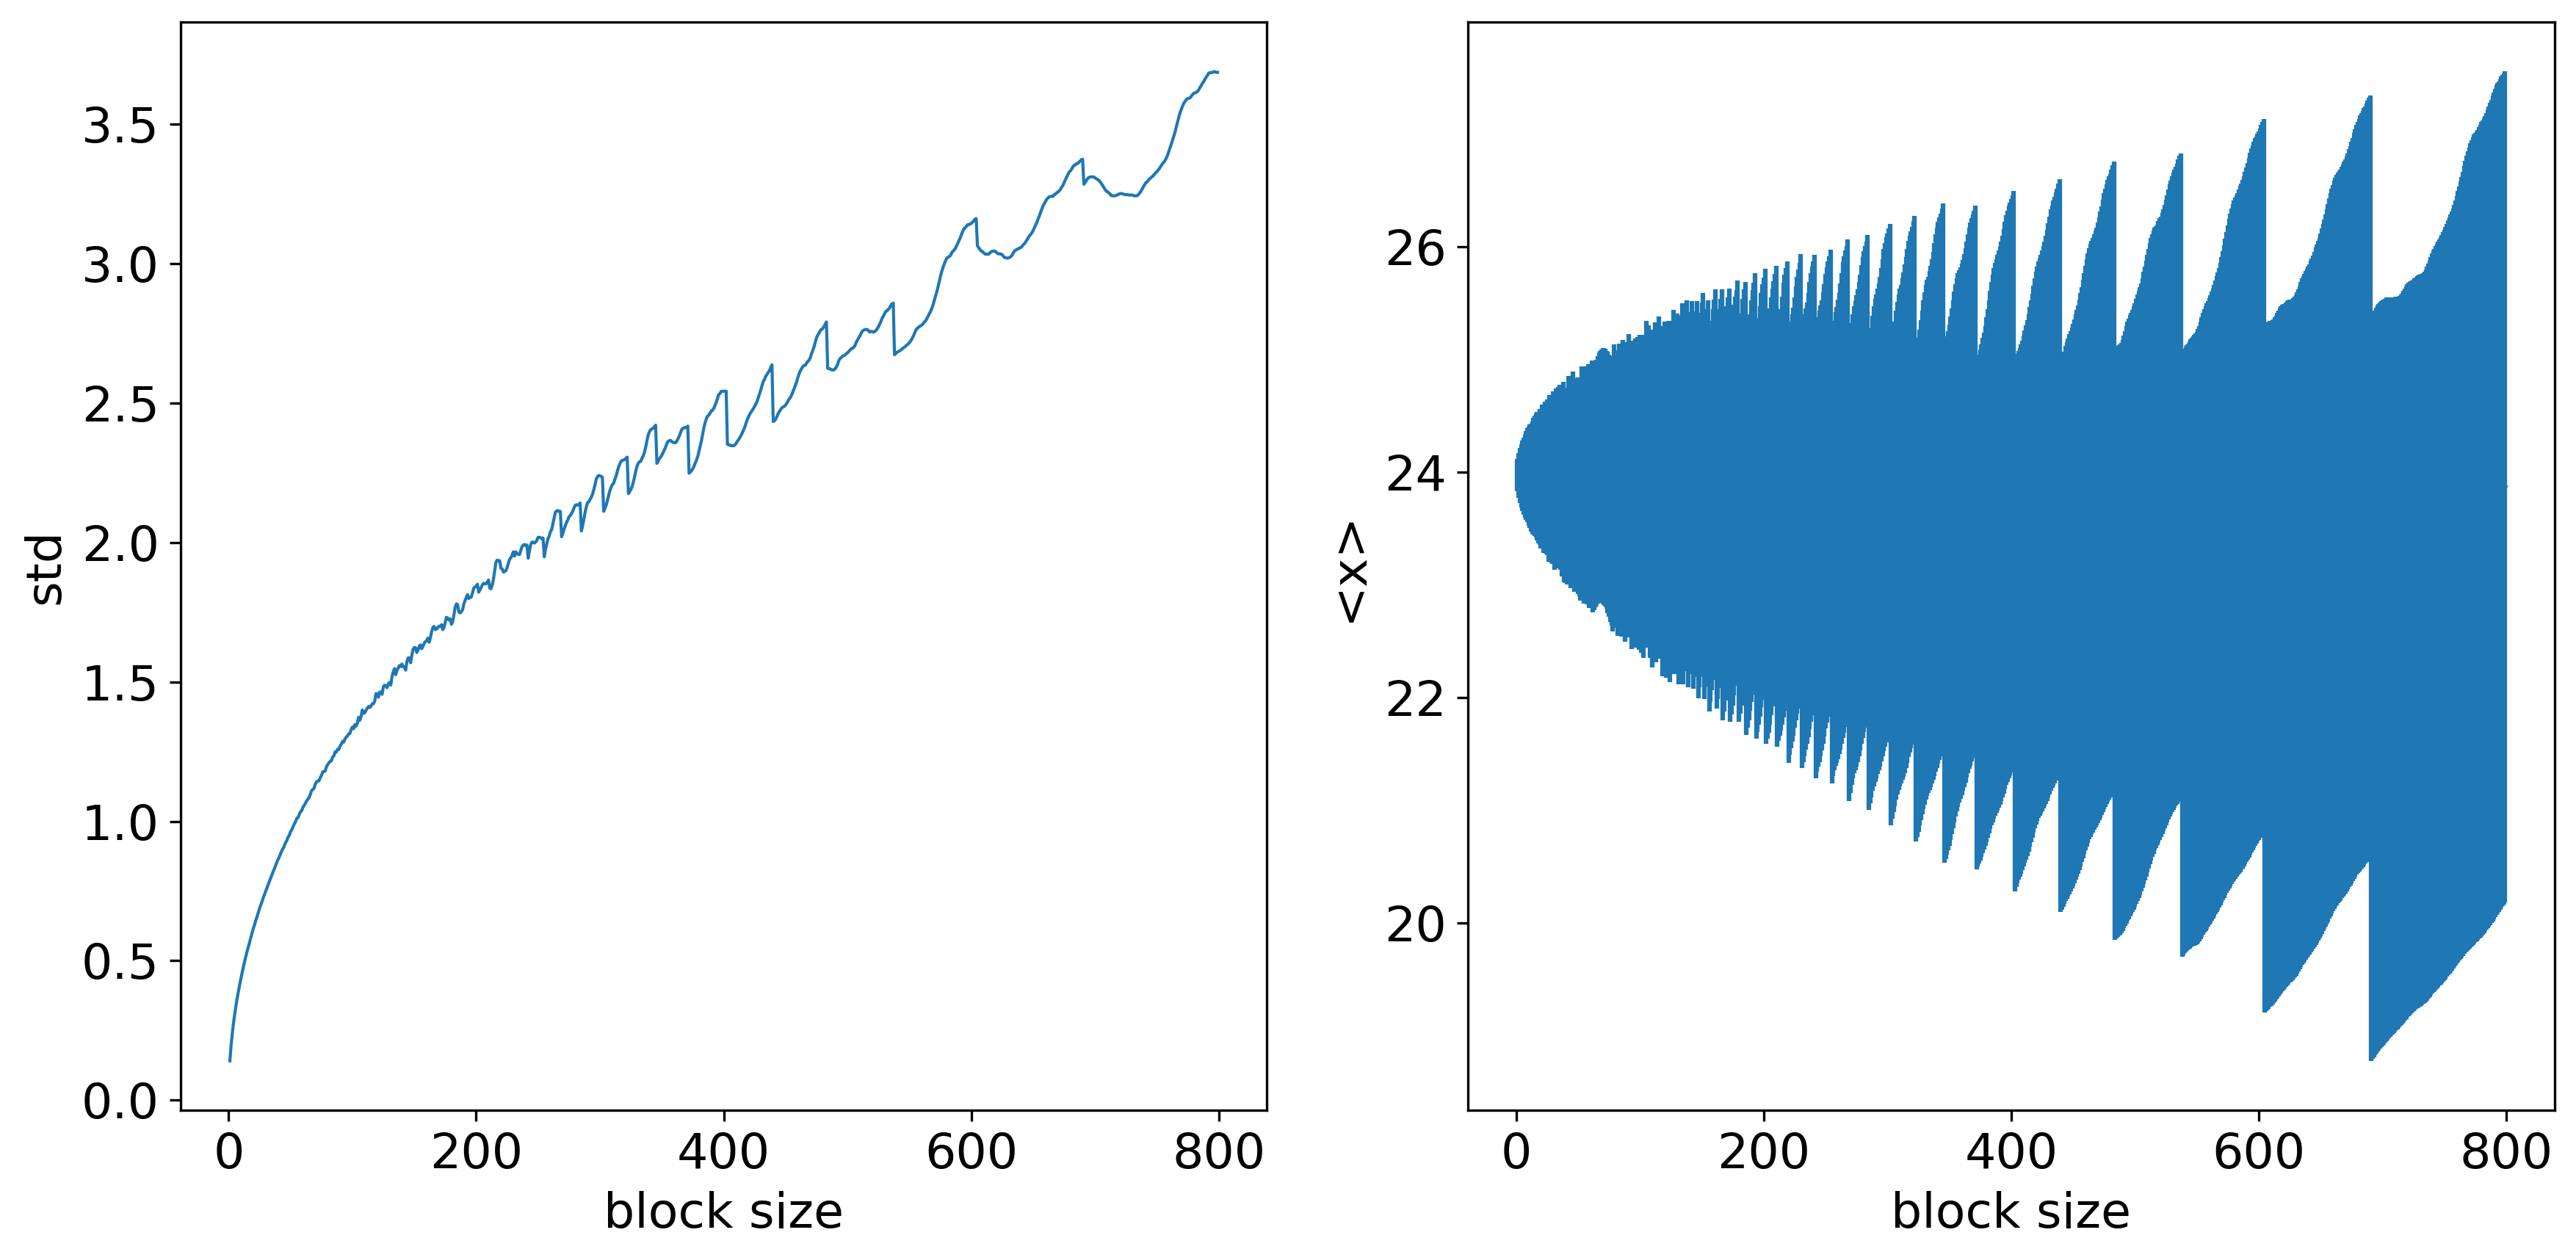

In [39]:
print ('CLpcps_R1')
blockAverage(r1_tilteq[:,1],maxBlockSize=800)
print ('CLpcps_R2')
blockAverage(r2_tilteq[:,1],maxBlockSize=800)
print ('CLpcps R3')
blockAverage(r3_tilteq[:,1],maxBlockSize=800)
print ('CLpc')
blockAverage(clpcp_tilteq[:,1],maxBlockSize=800)
print ('NCpc')
blockAverage(ncpc_tilteq[:,1],maxBlockSize=800)
print ('NCpcps')
blockAverage(ncpcps_tilteq[:,1],maxBlockSize=800)
print ('TFF7pcps')
blockAverage(tff7_tilteq[:,1],maxBlockSize=800)